<a href="https://colab.research.google.com/github/nishantdey12/damping-identification/blob/main/minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#to delete nonsense folders
import shutil

# Get the path to the folder that you want to delete.
folder_path = "/content/my_graphs"

# Delete the folder.
shutil.rmtree(folder_path)

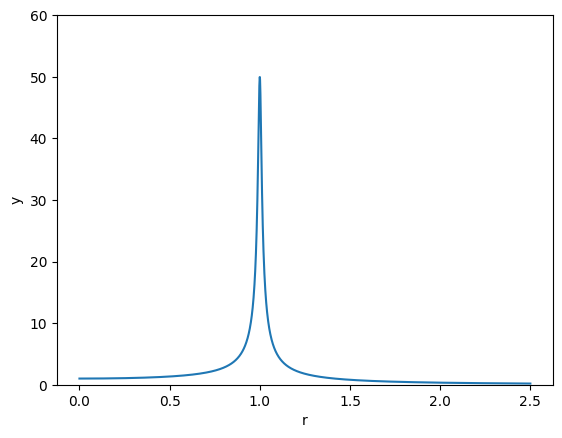

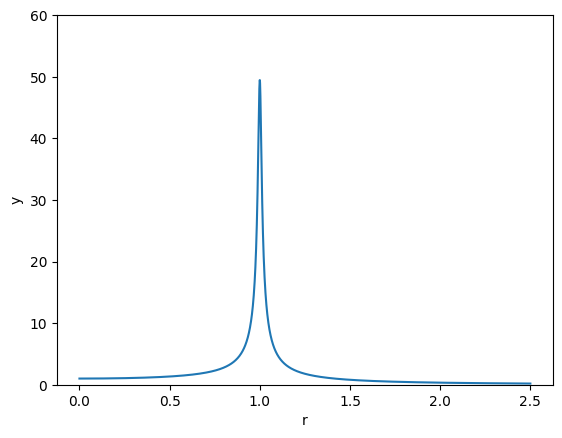

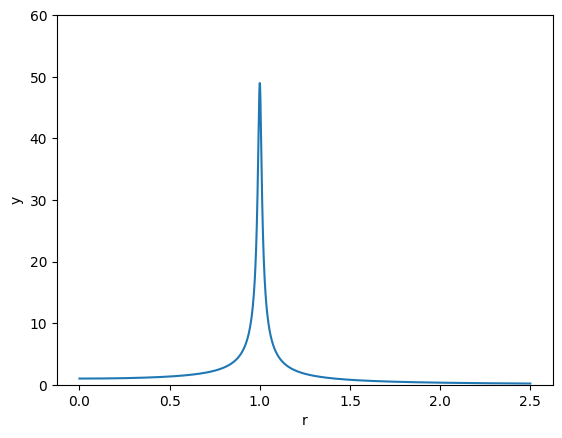

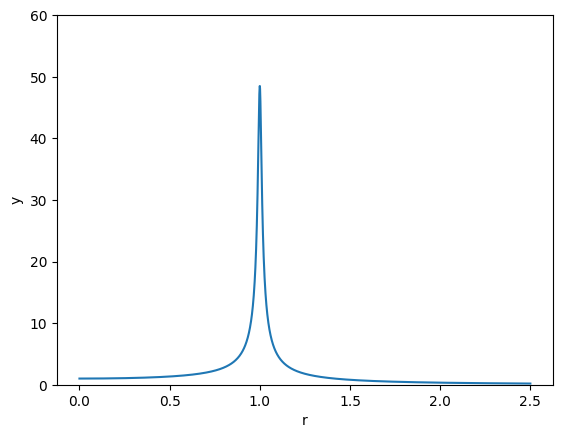

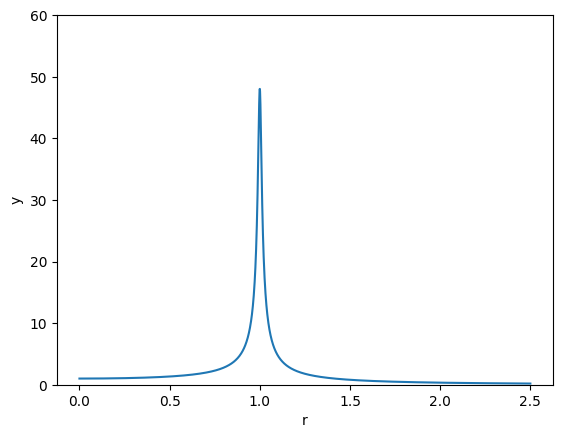

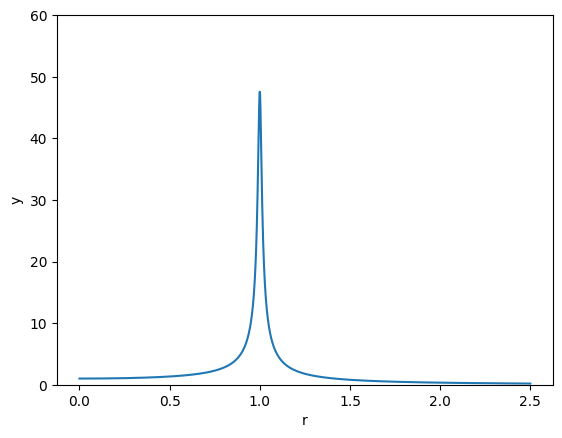

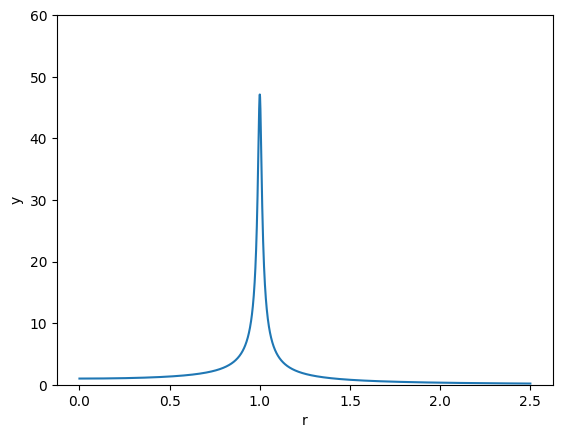

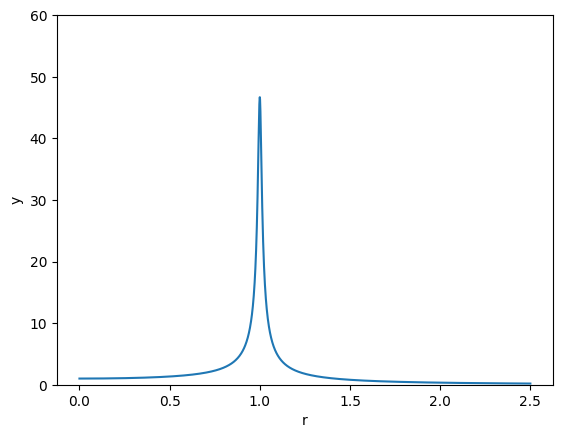

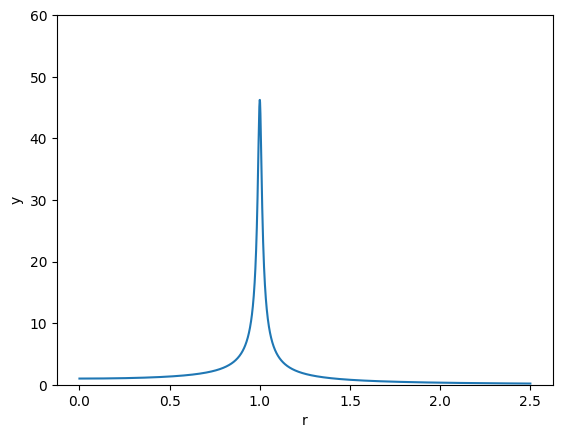

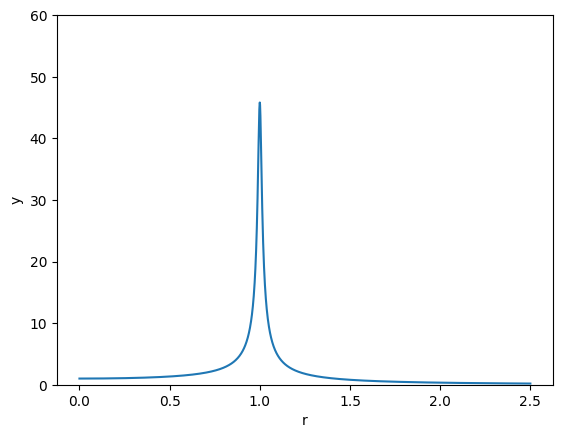

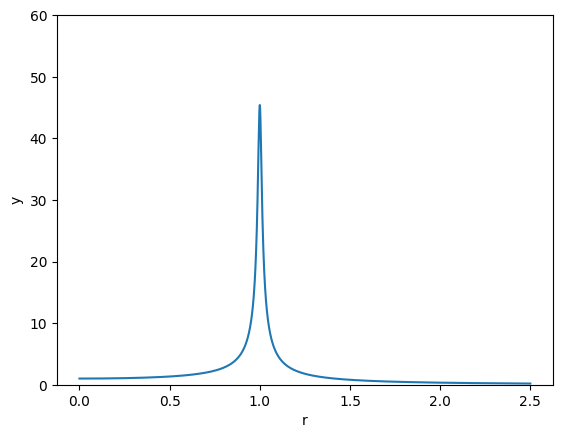

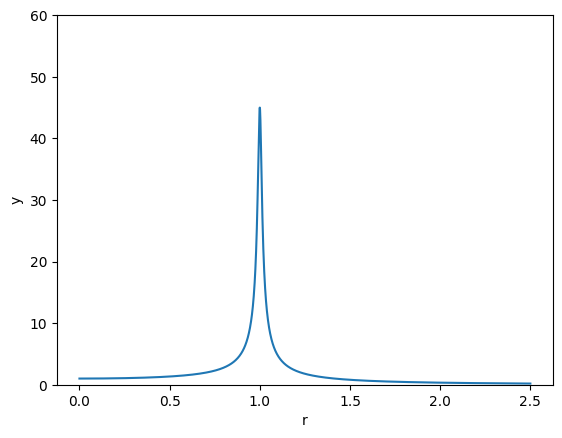

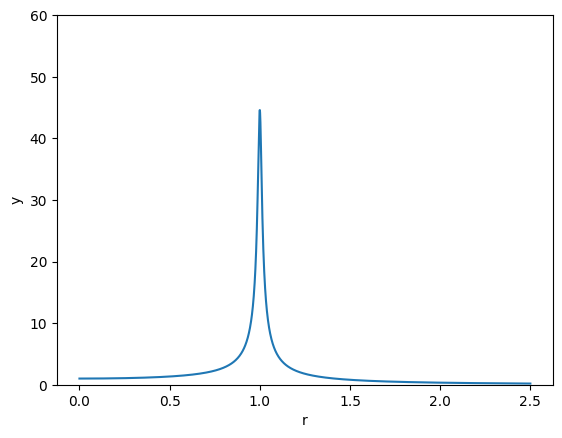

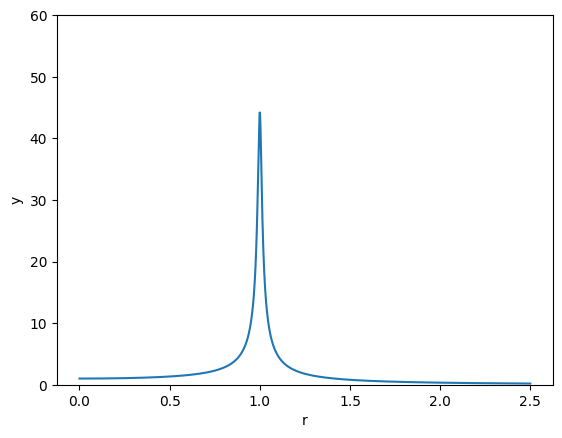

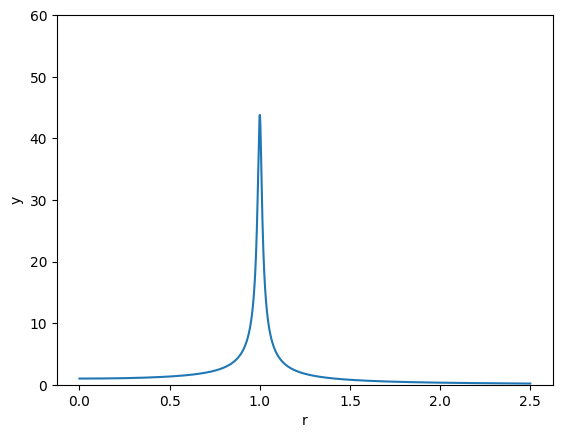

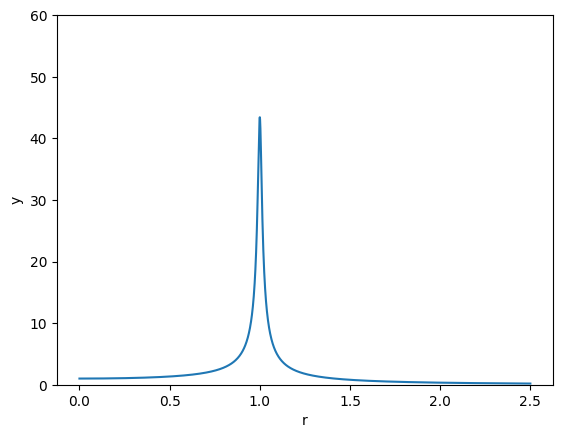

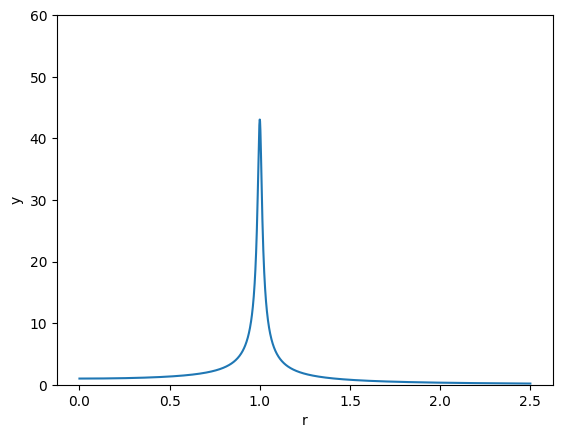

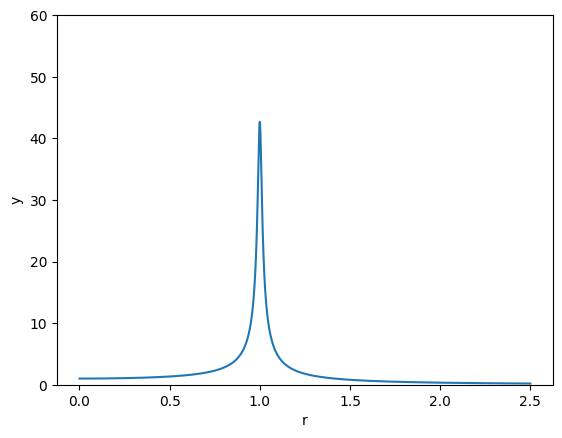

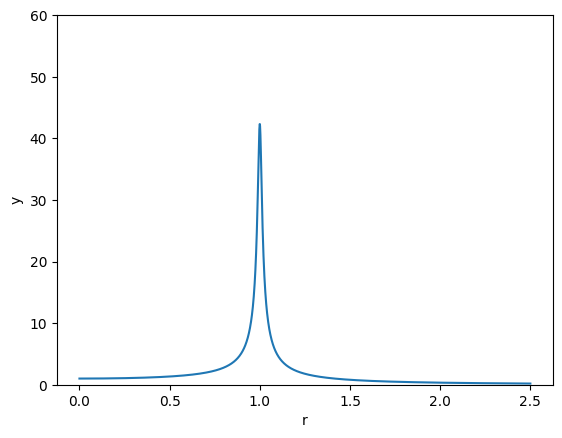

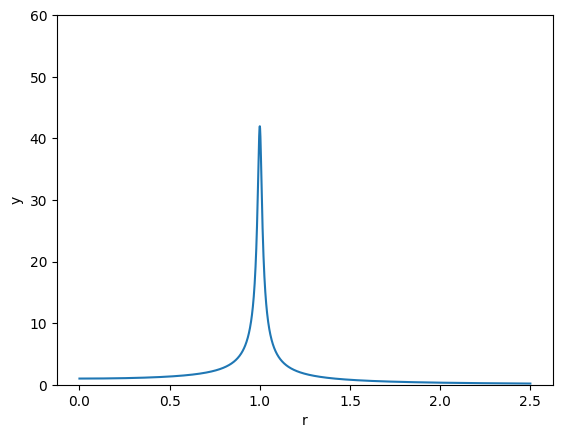

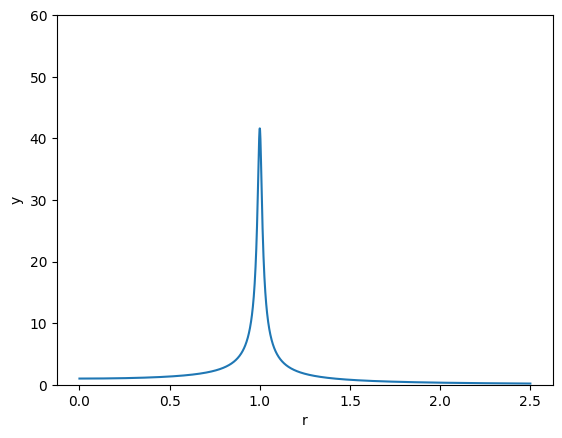

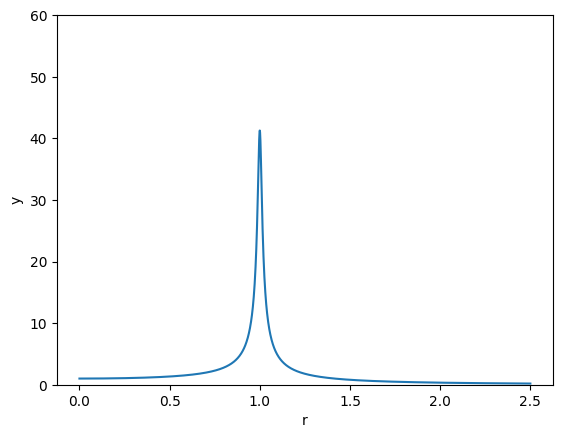

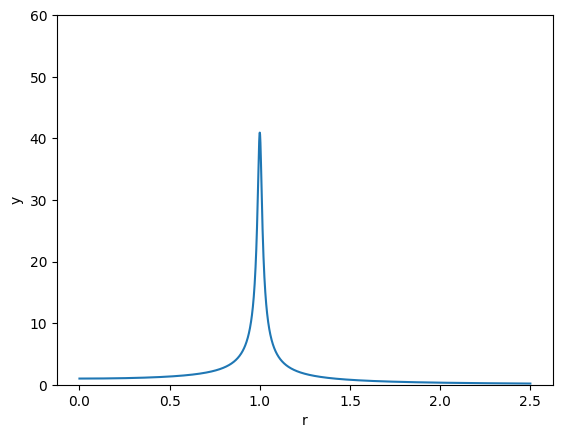

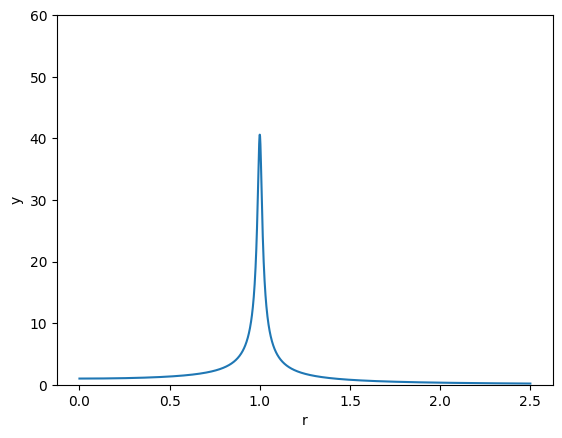

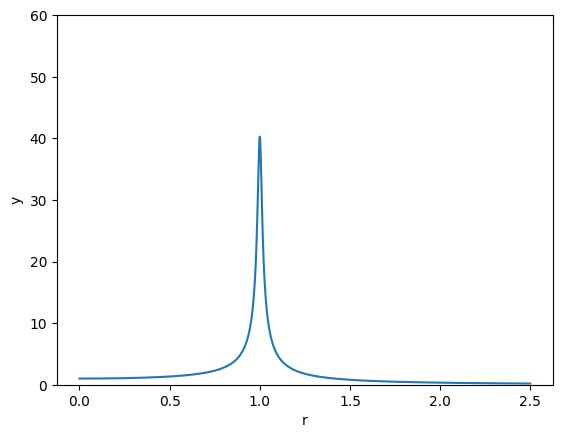

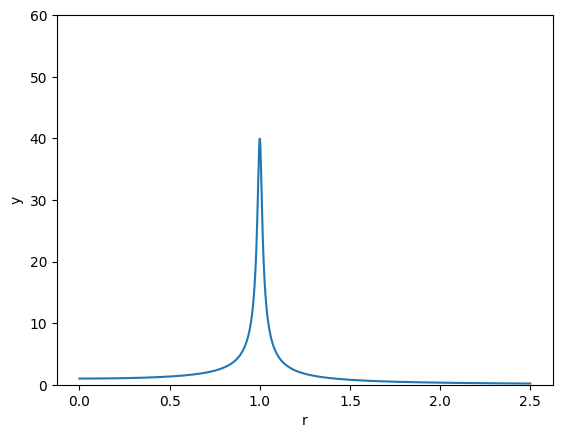

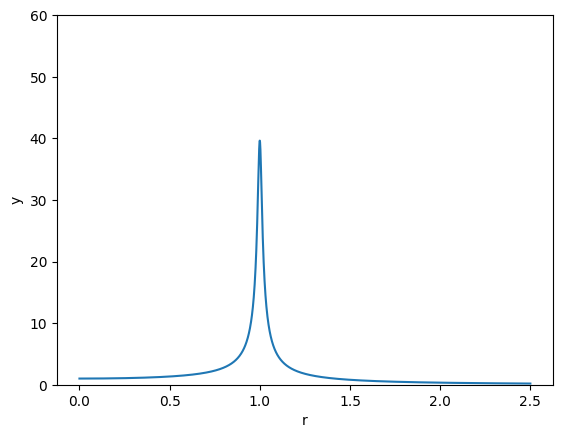

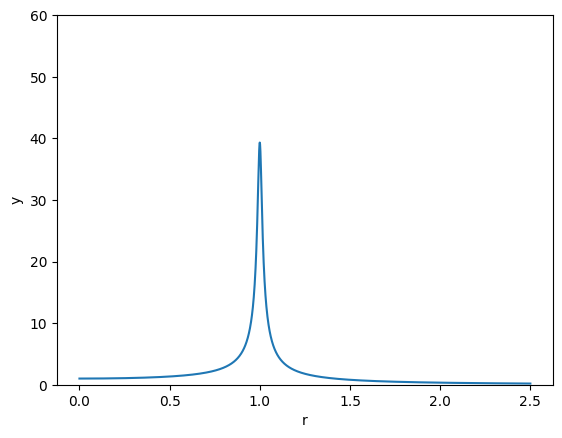

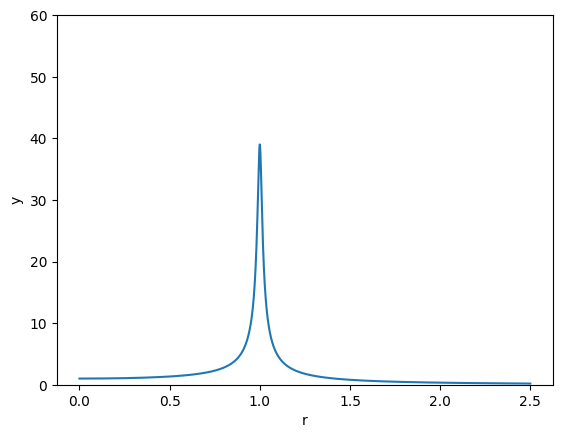

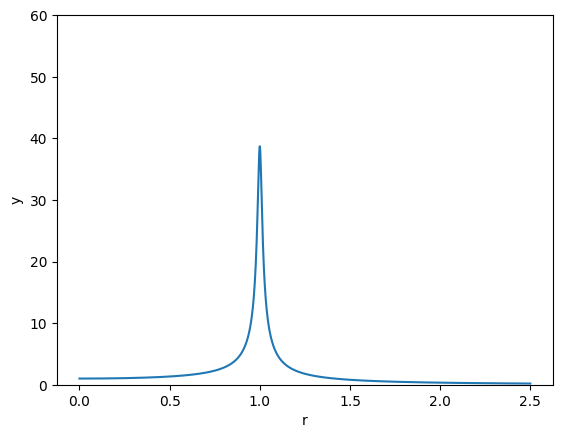

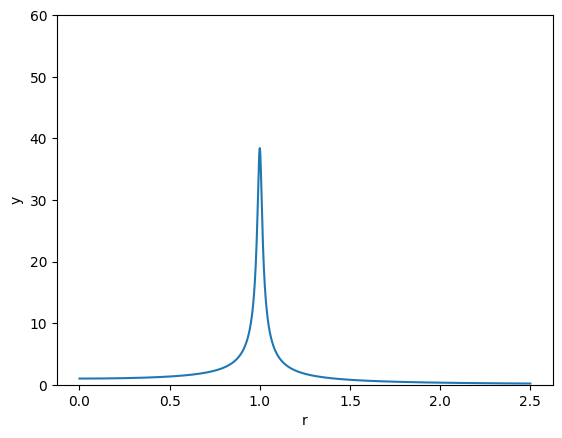

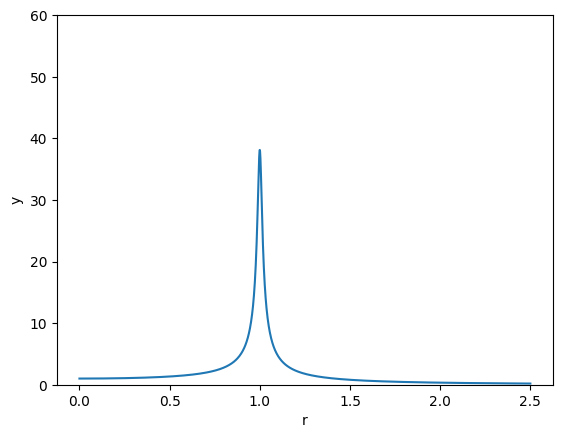

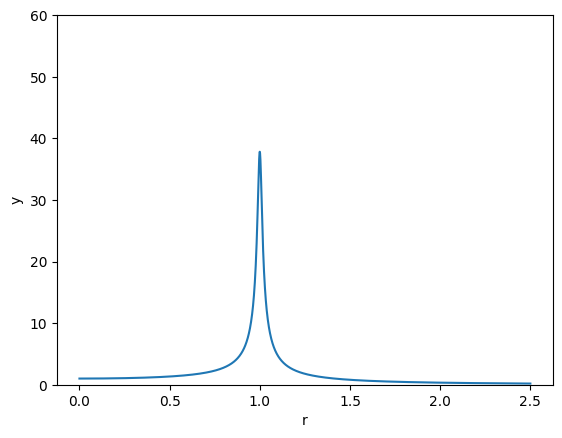

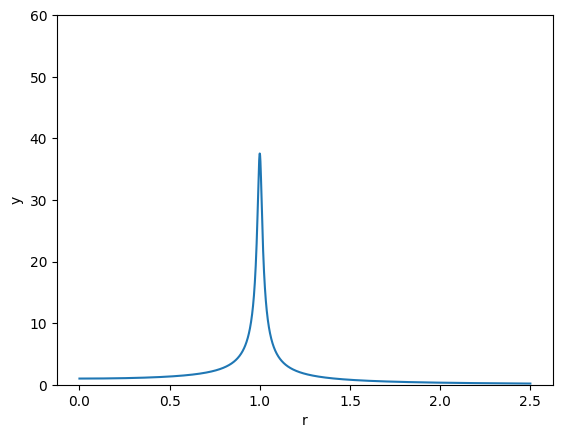

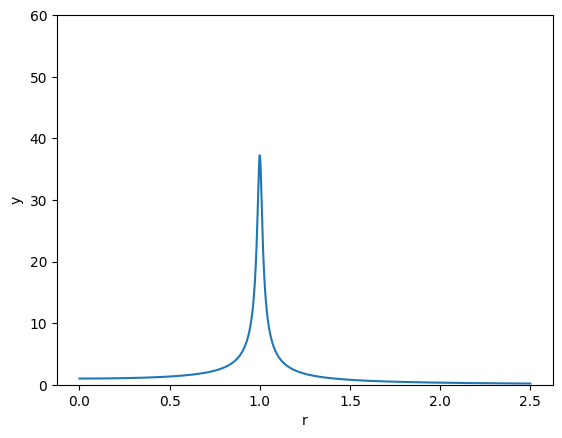

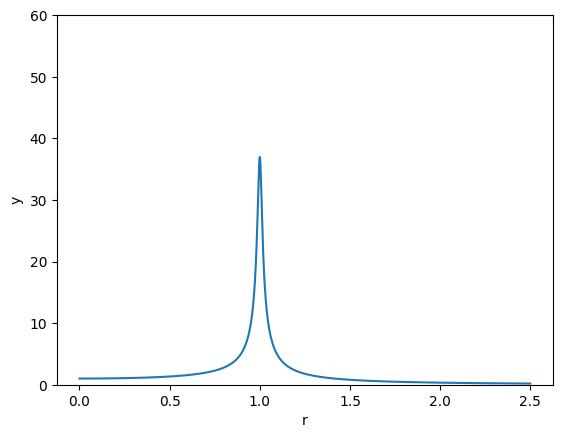

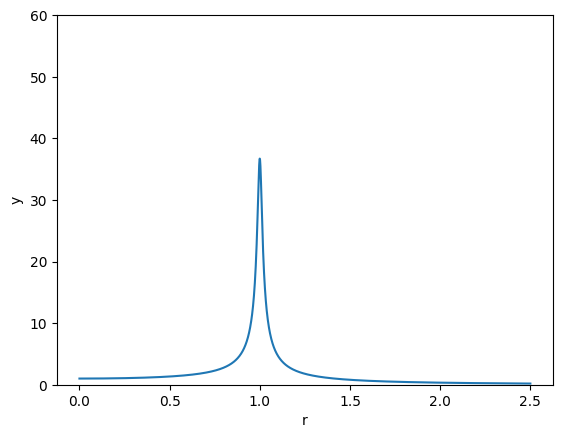

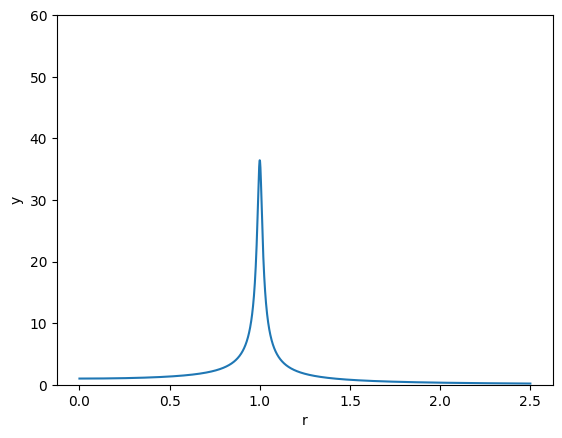

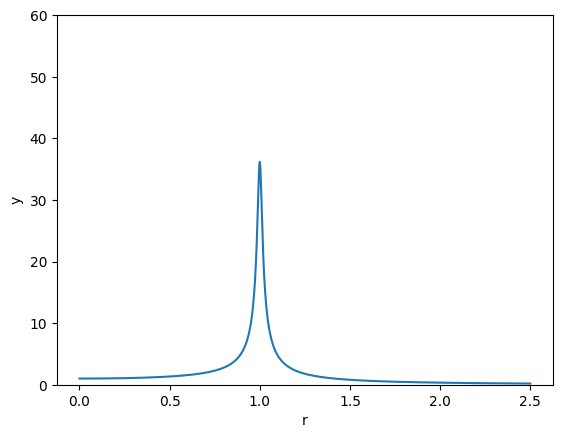

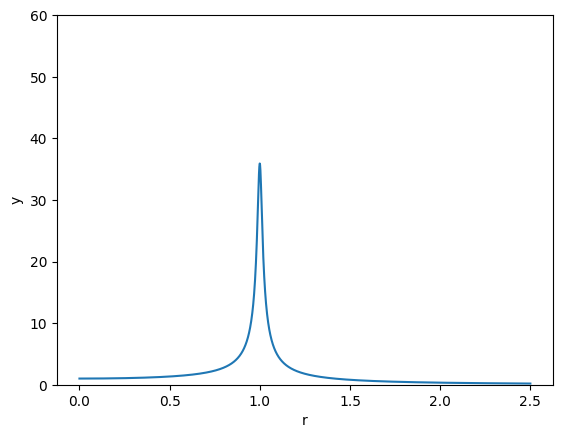

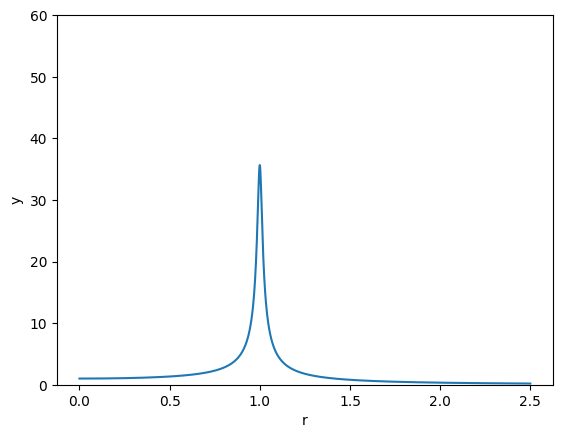

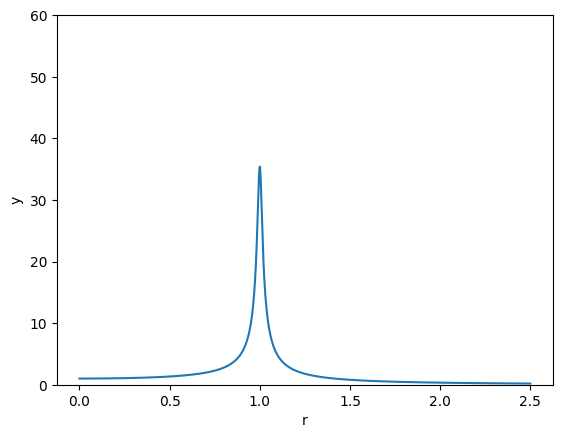

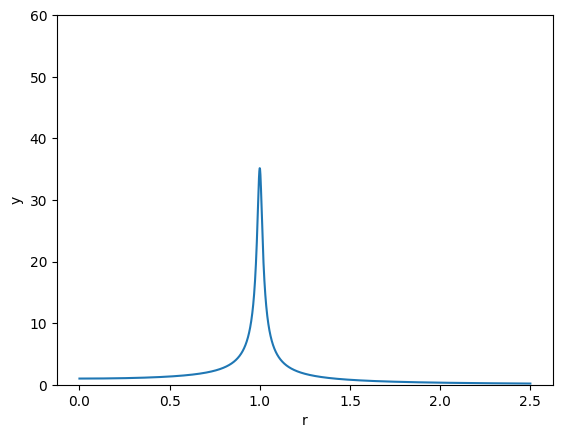

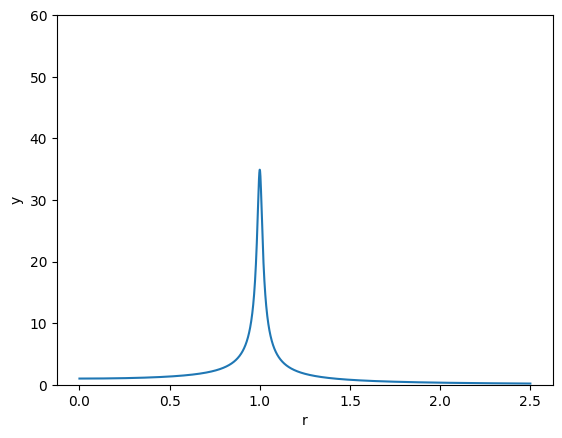

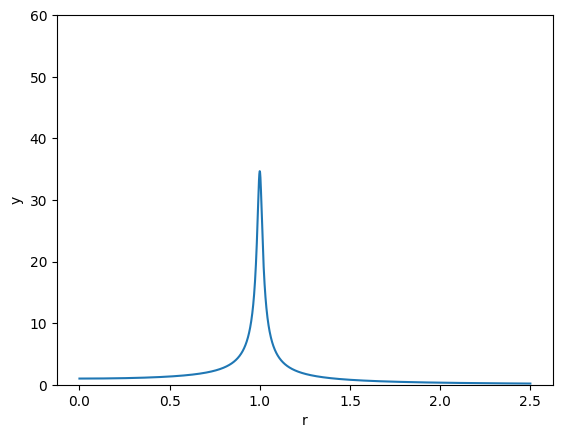

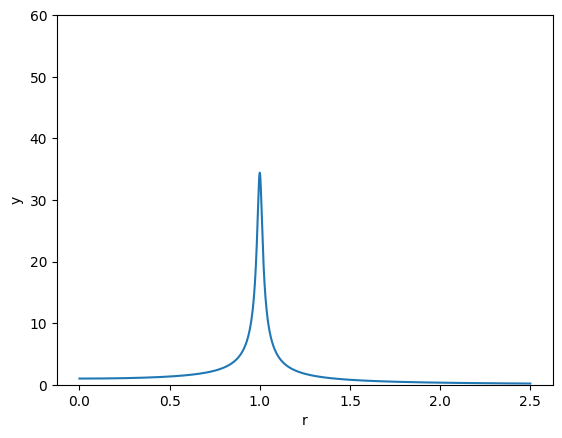

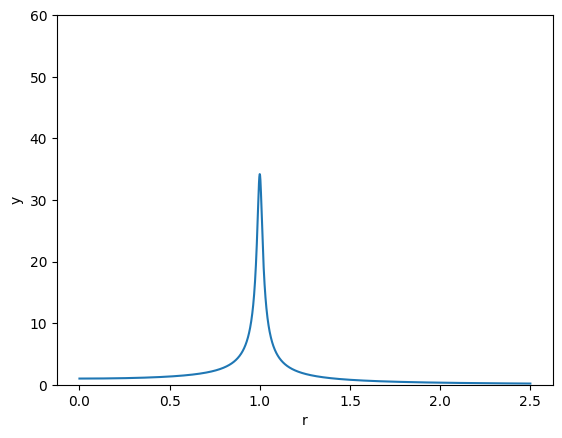

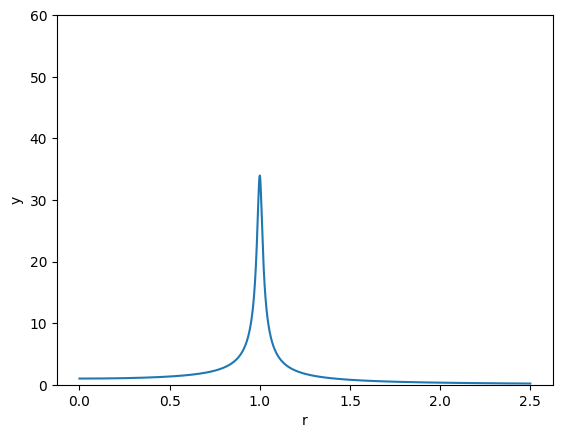

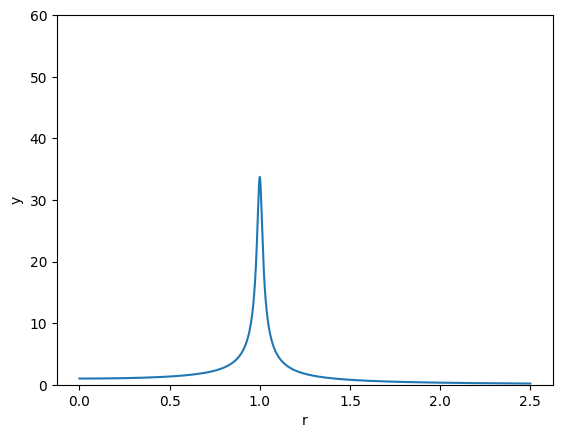

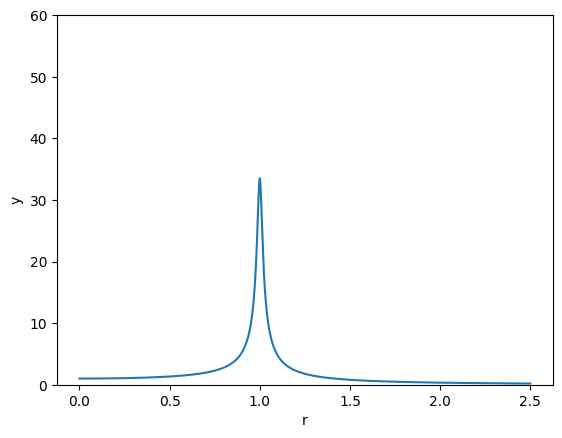

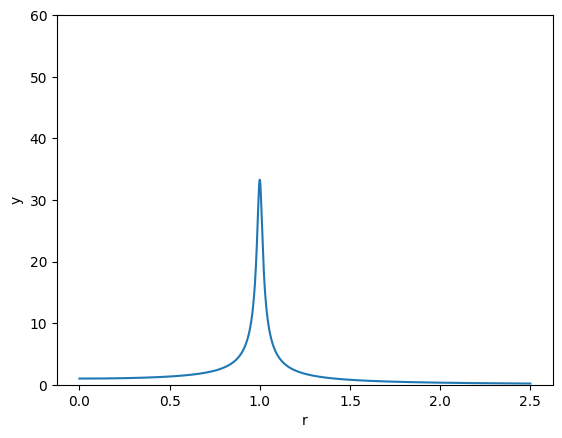

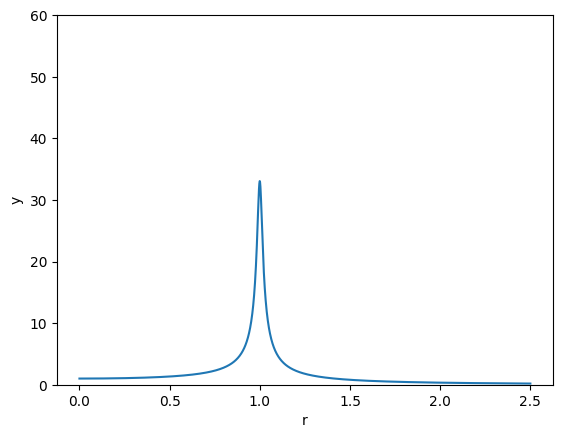

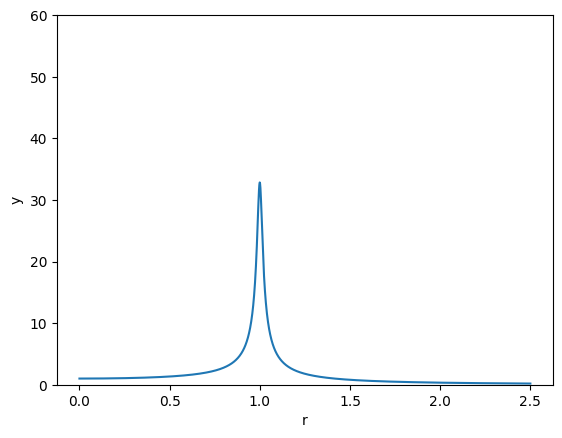

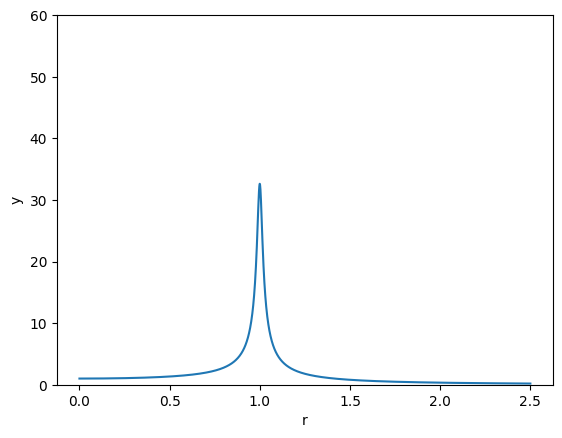

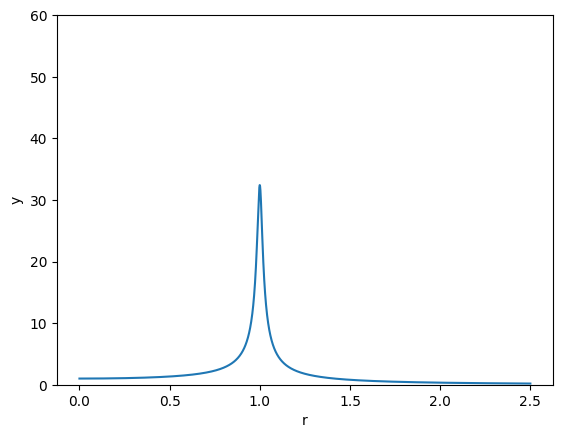

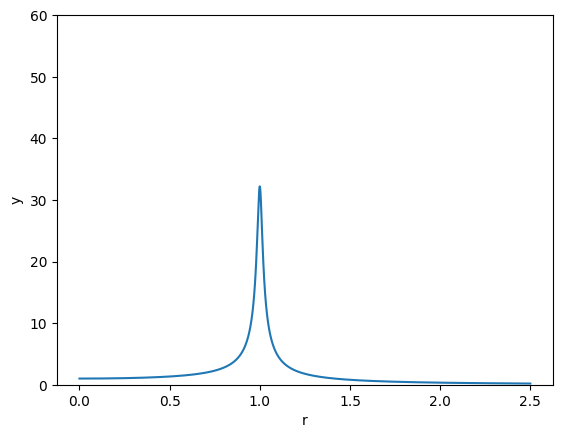

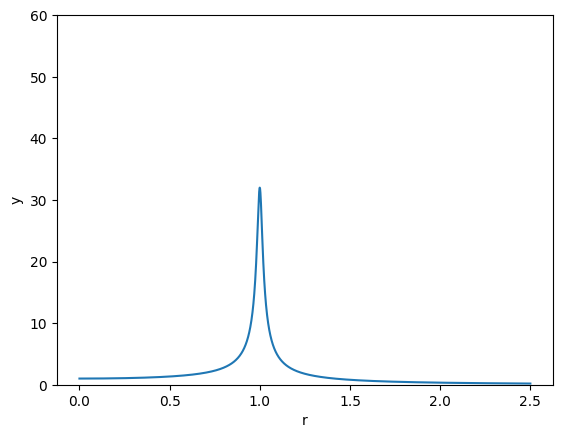

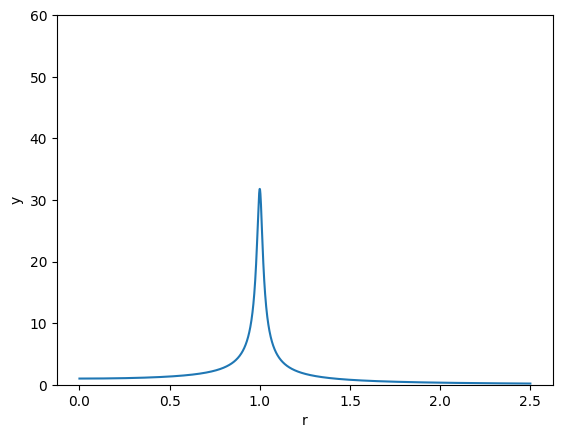

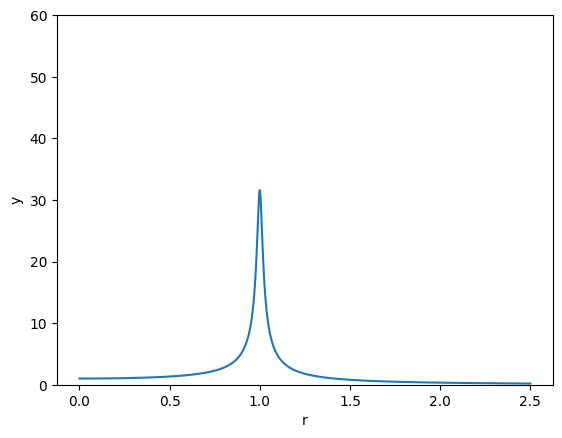

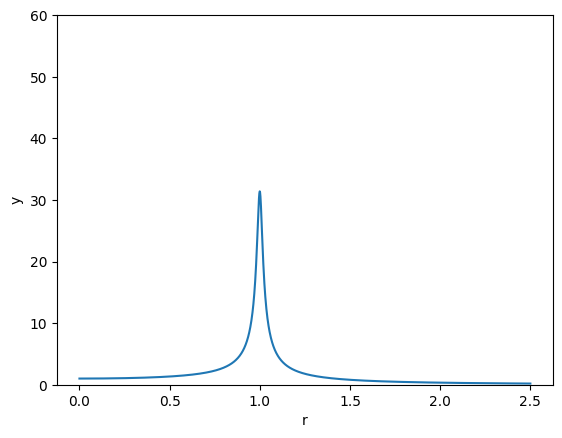

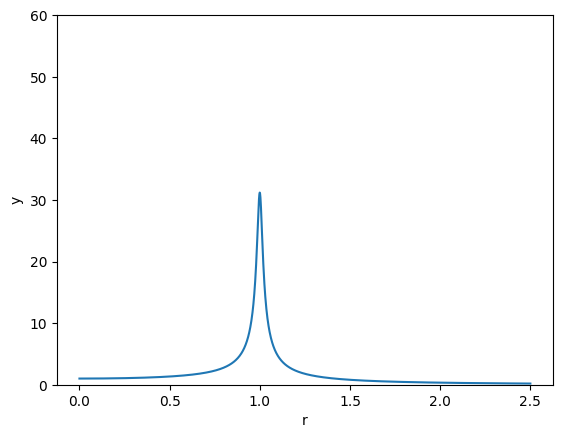

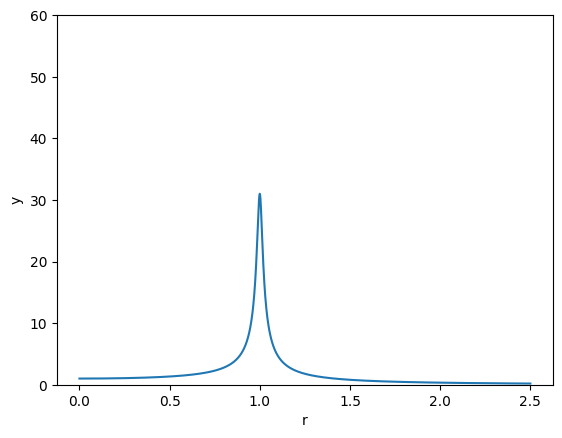

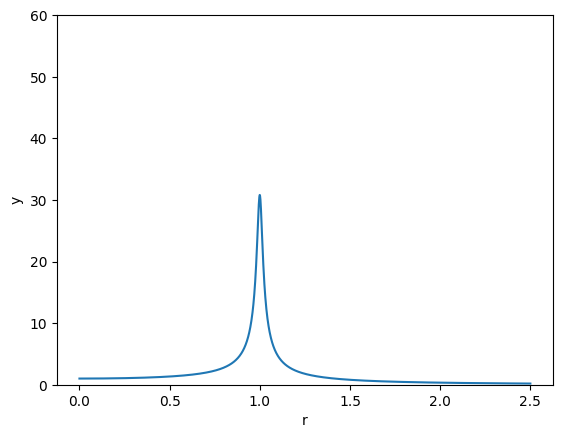

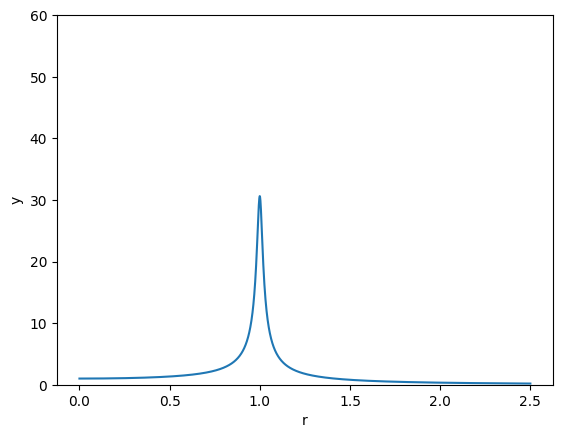

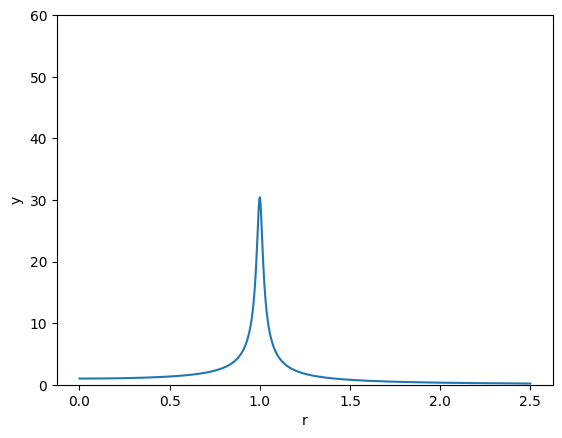

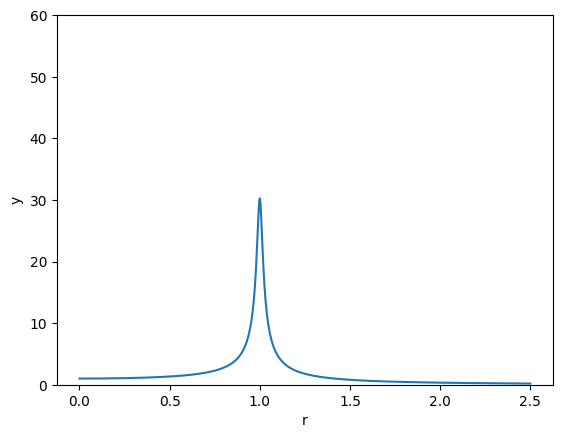

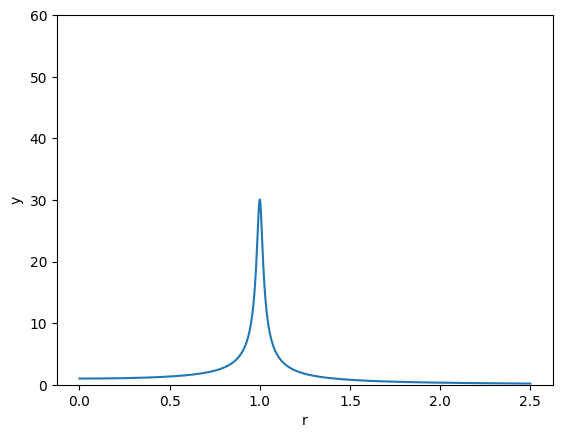

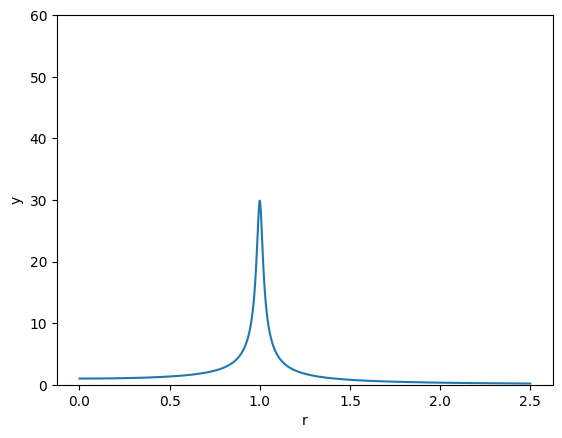

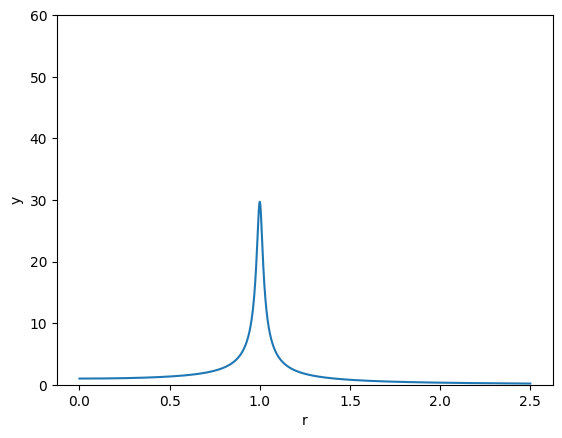

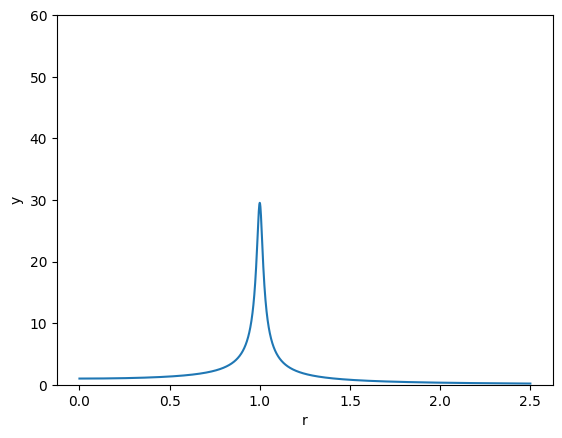

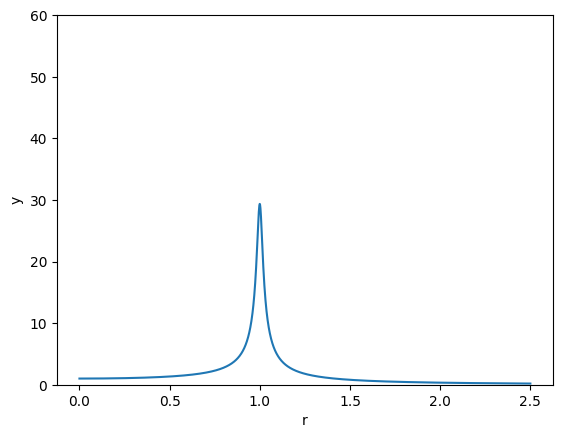

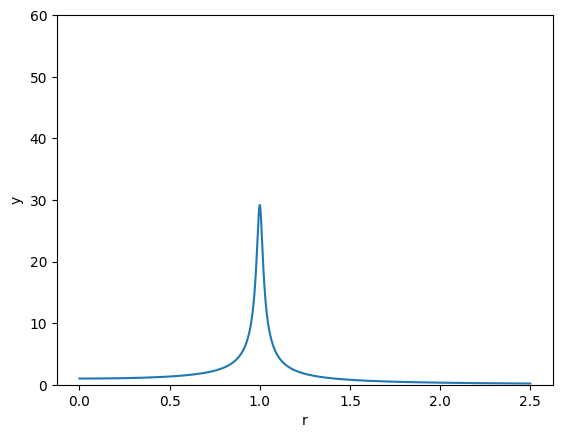

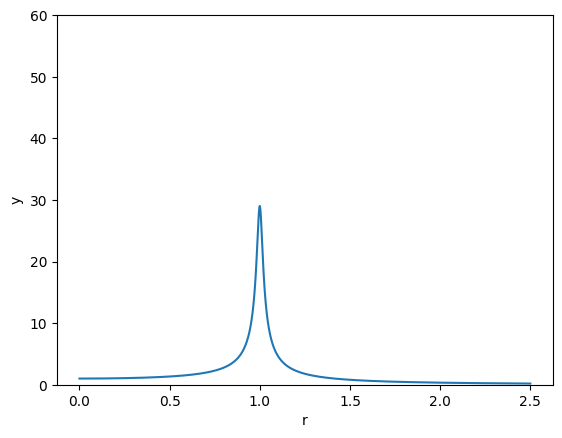

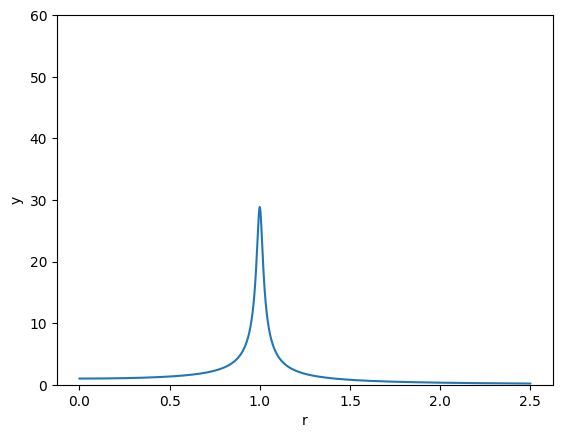

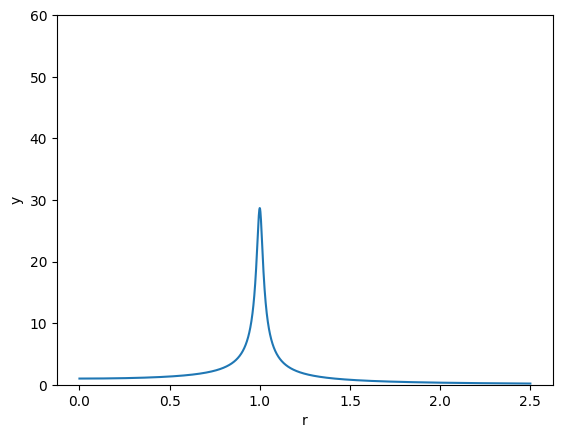

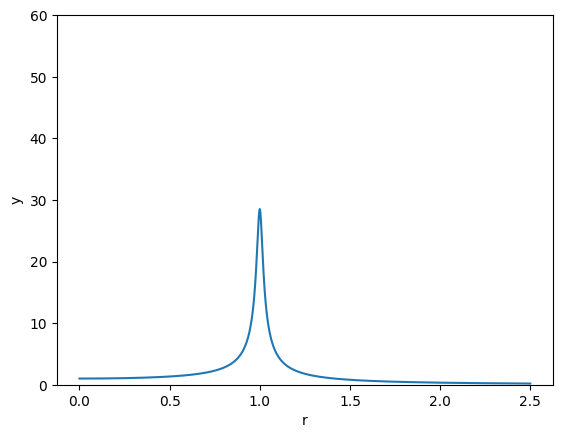

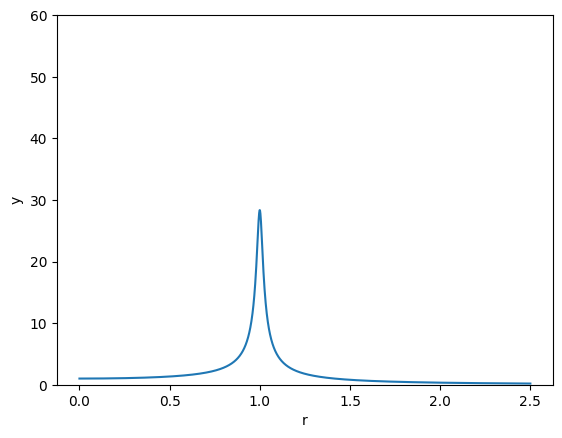

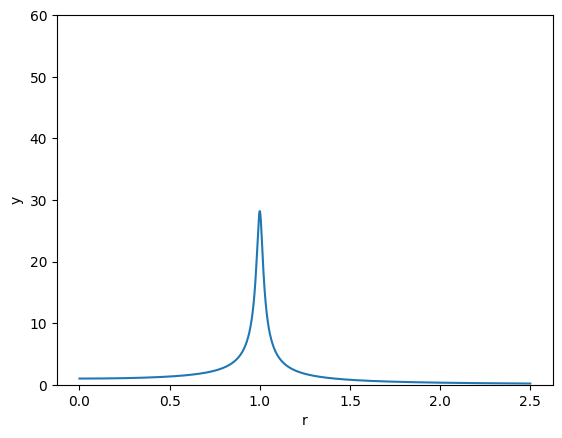

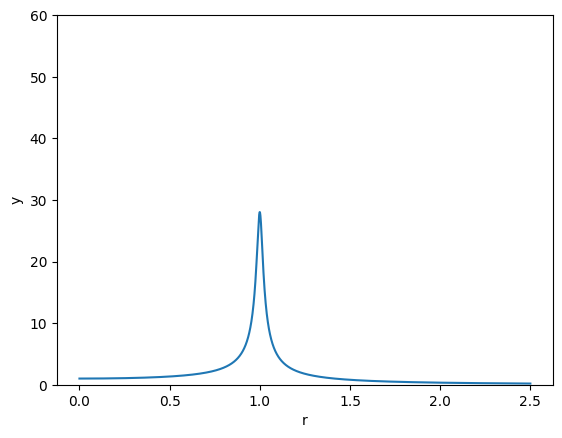

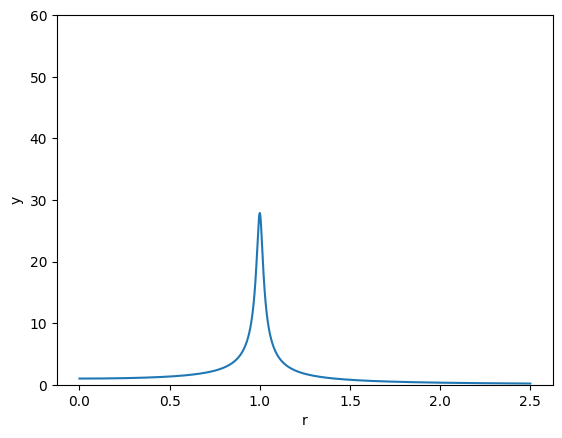

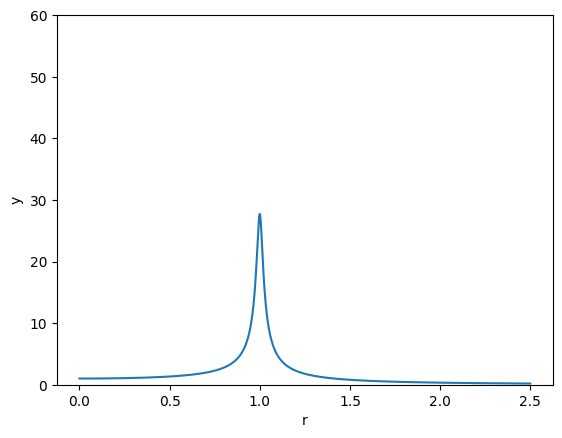

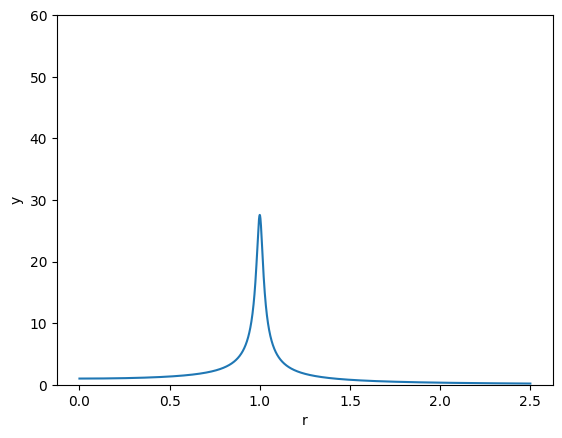

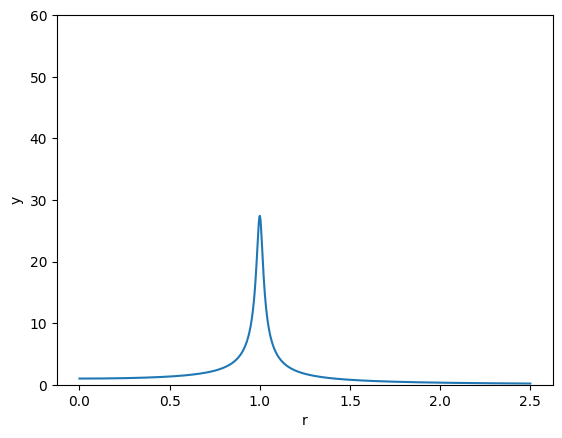

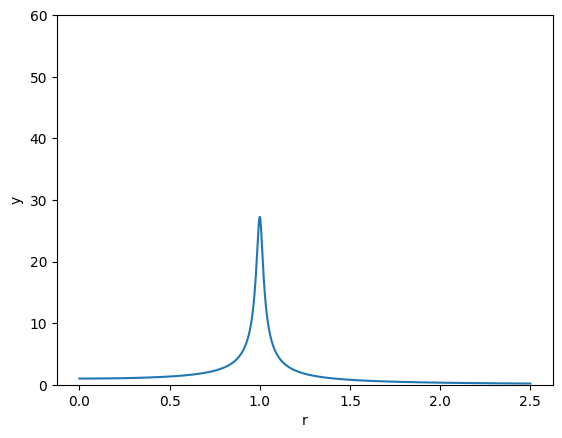

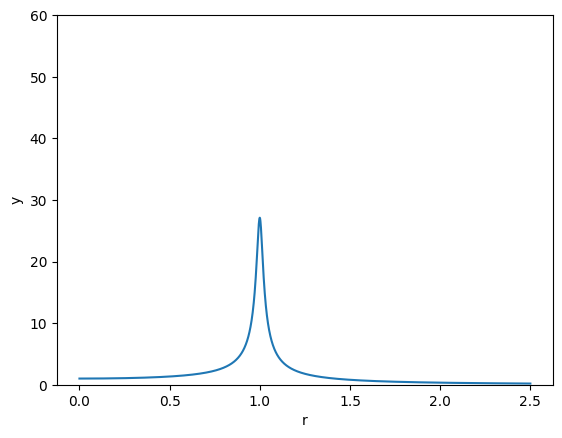

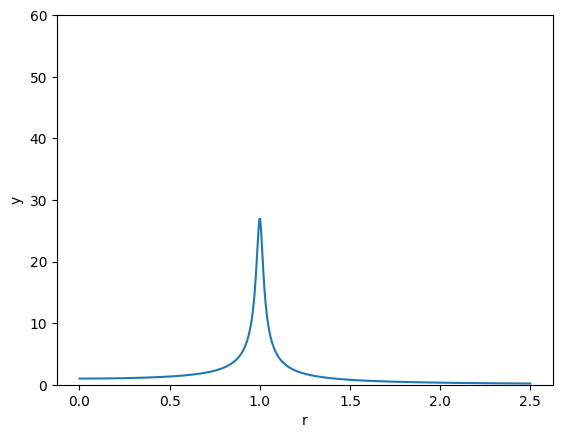

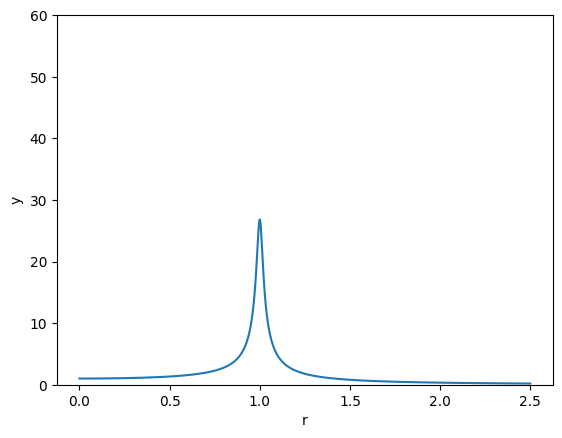

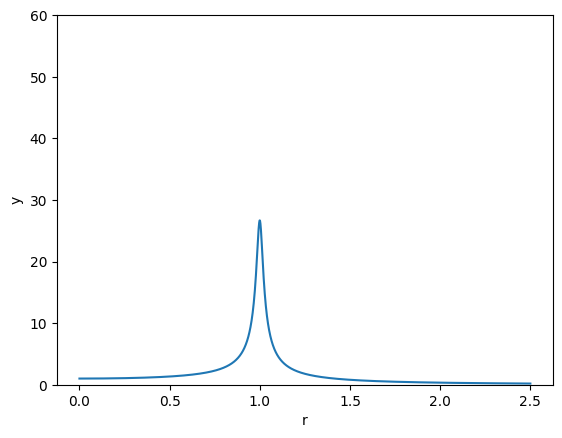

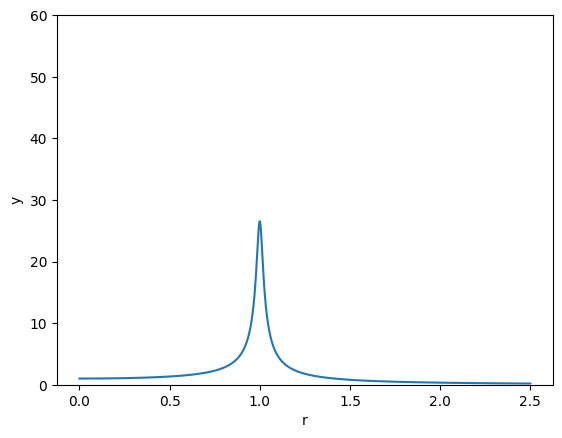

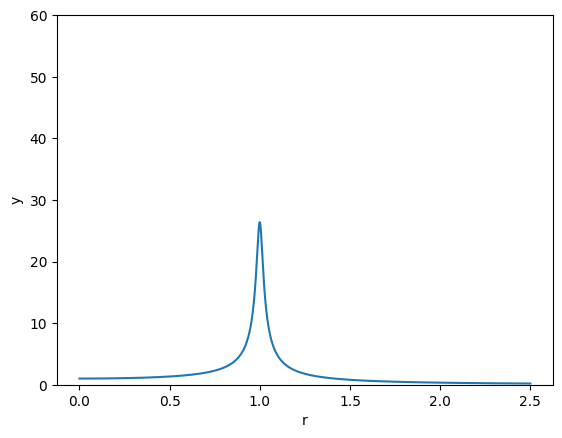

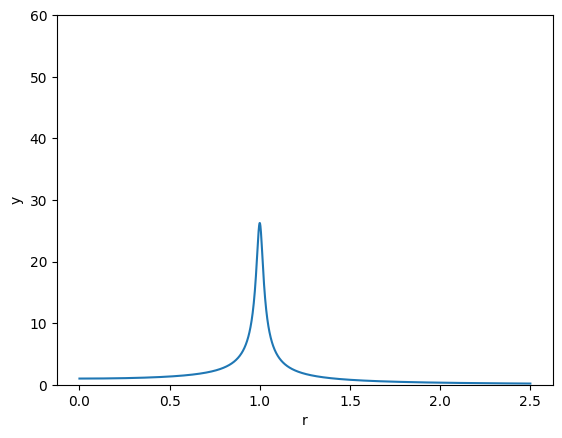

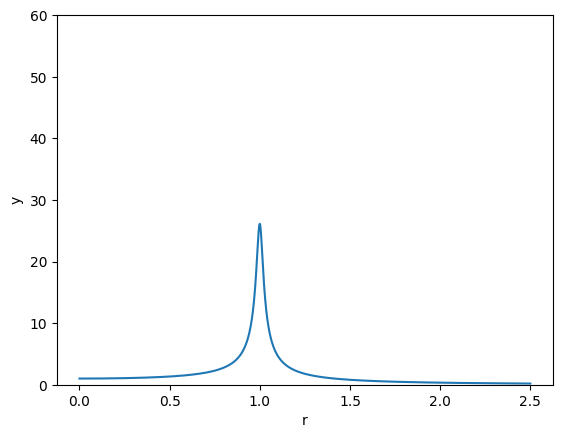

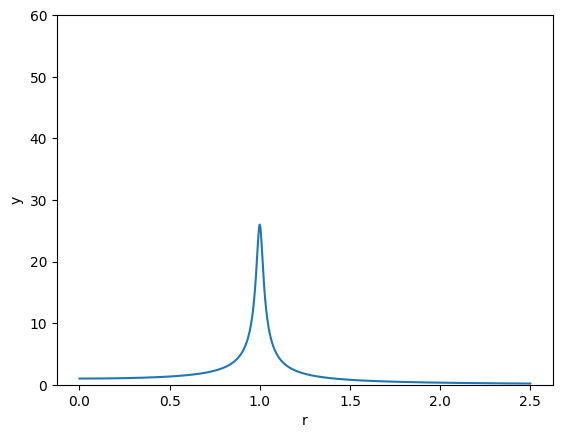

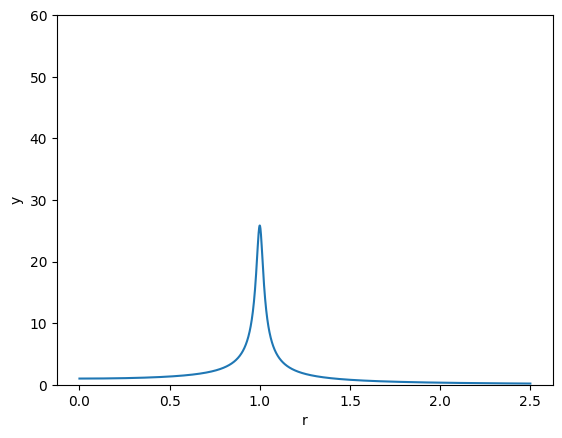

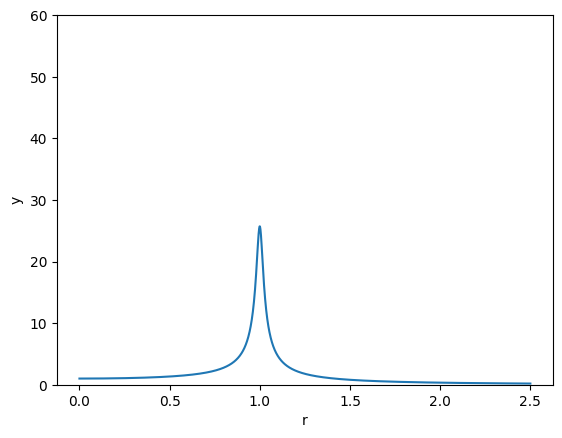

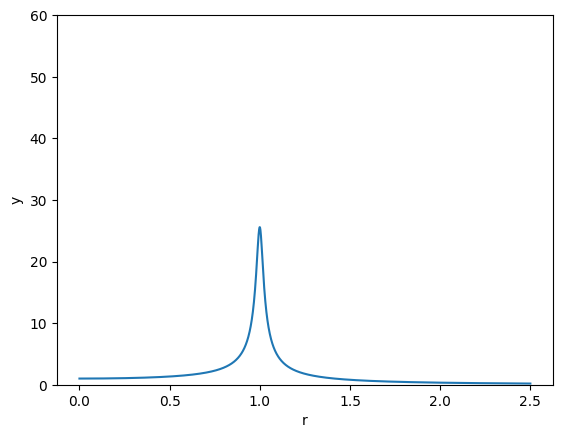

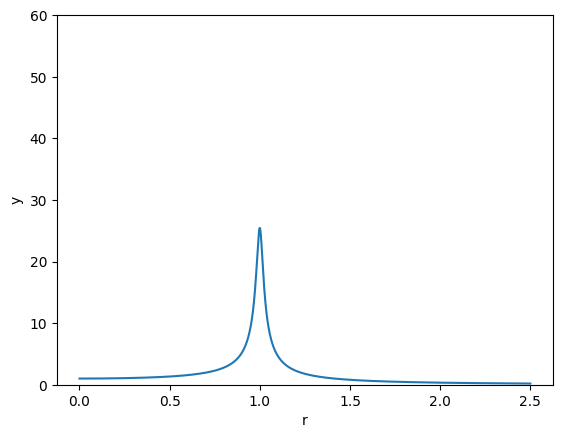

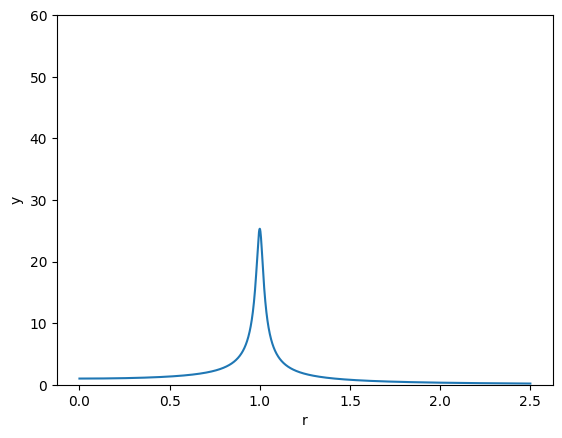

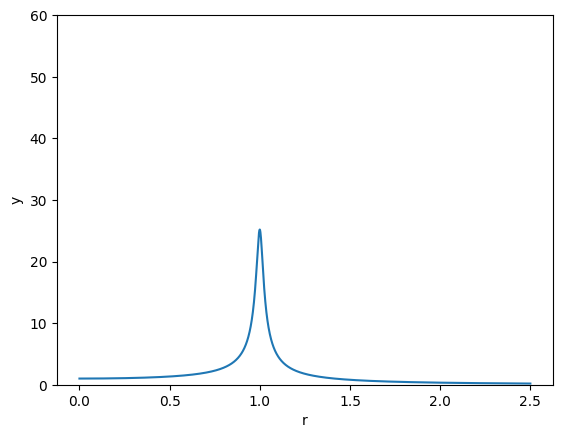

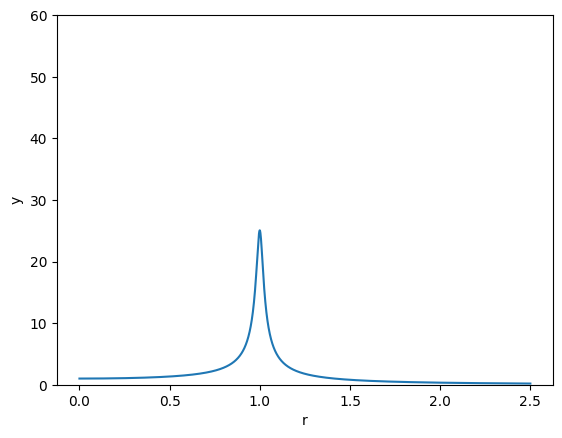

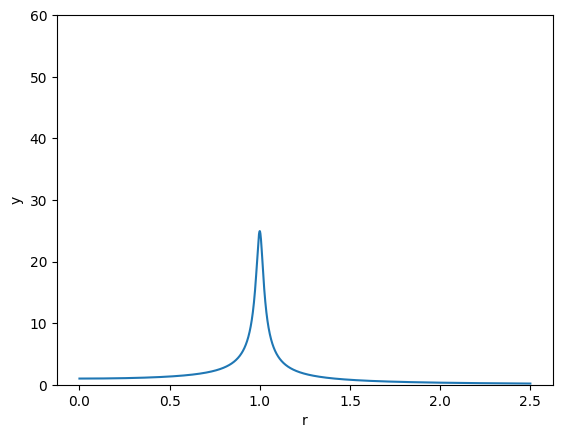

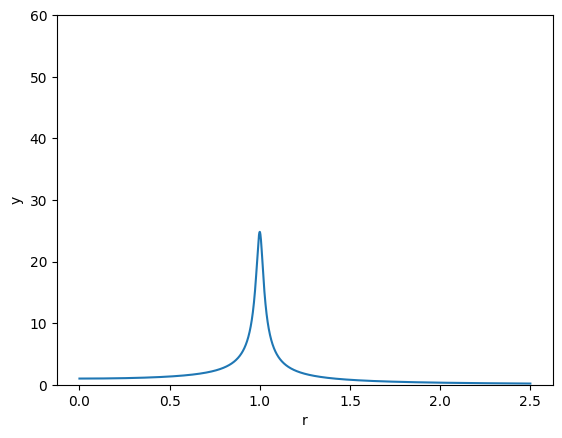

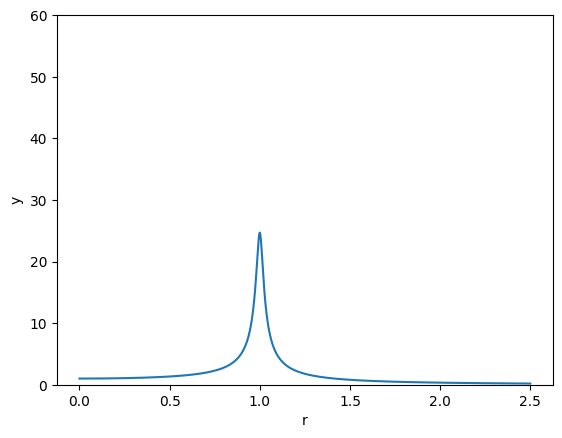

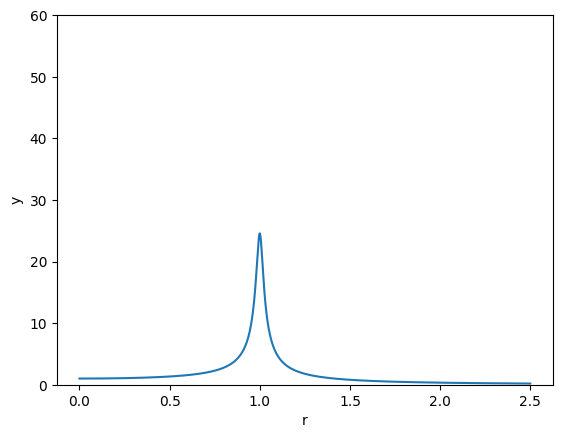

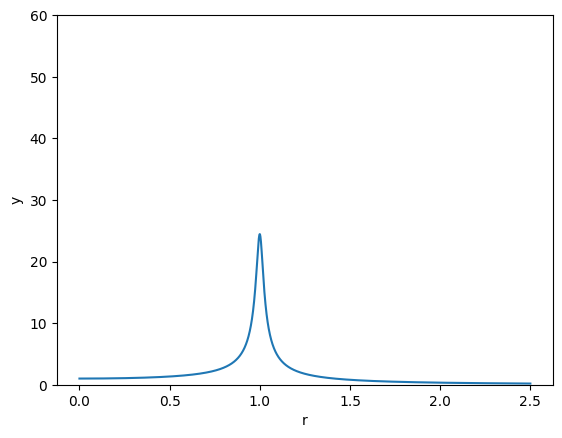

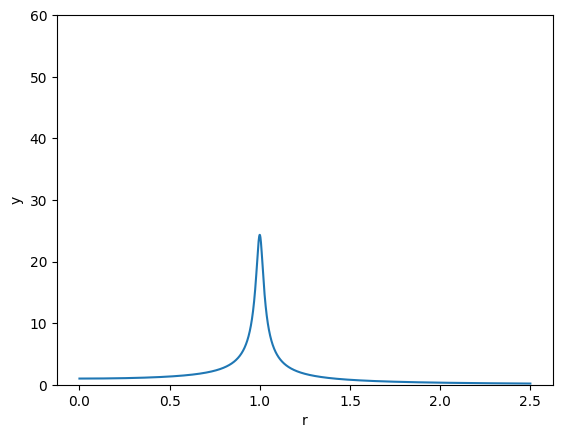

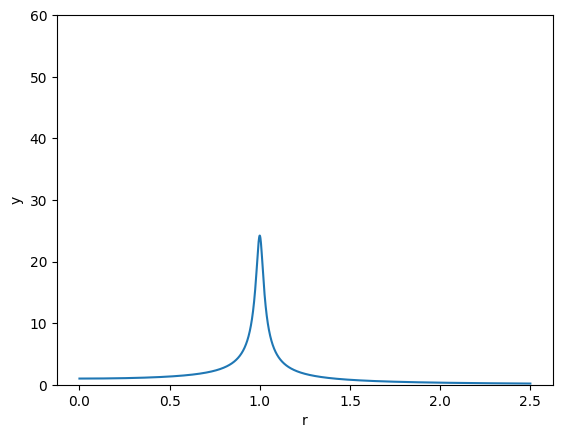

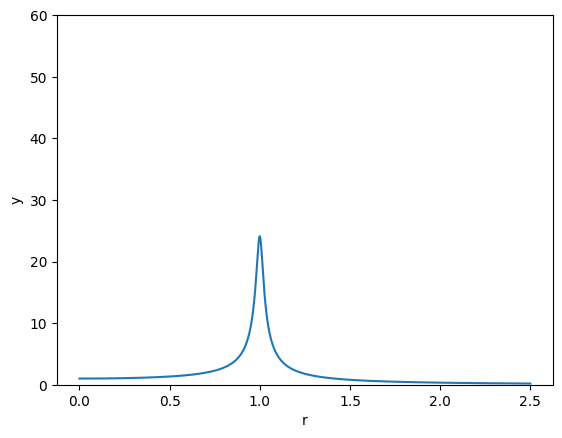

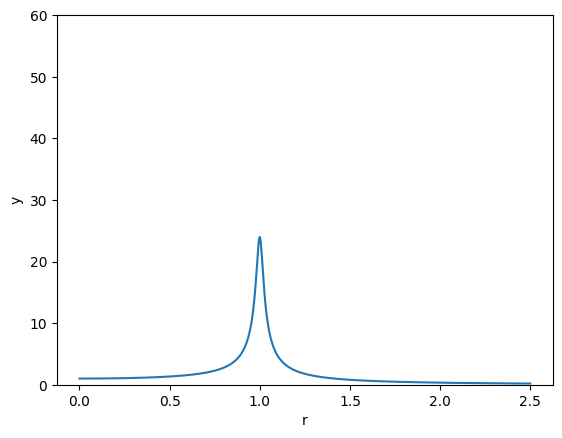

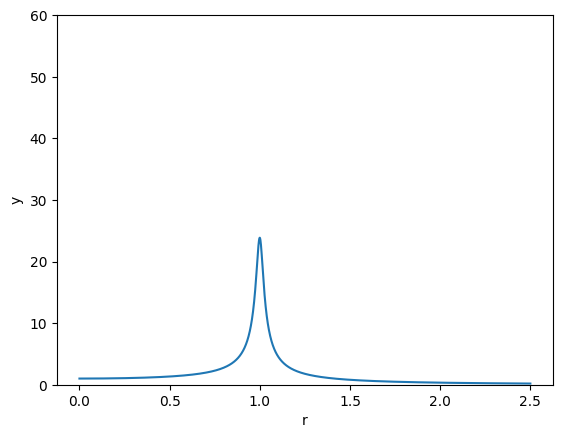

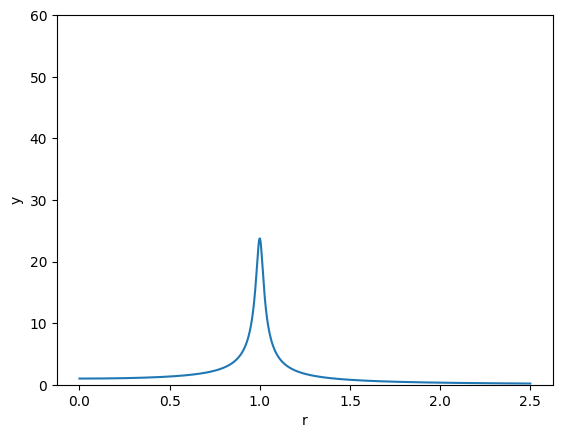

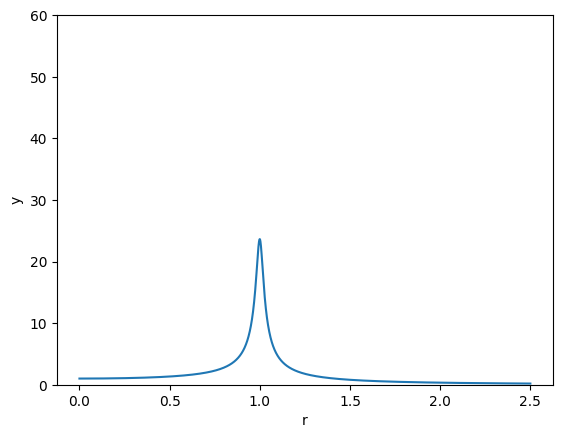

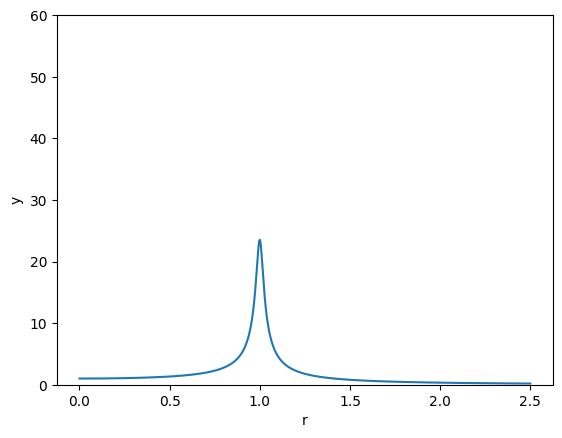

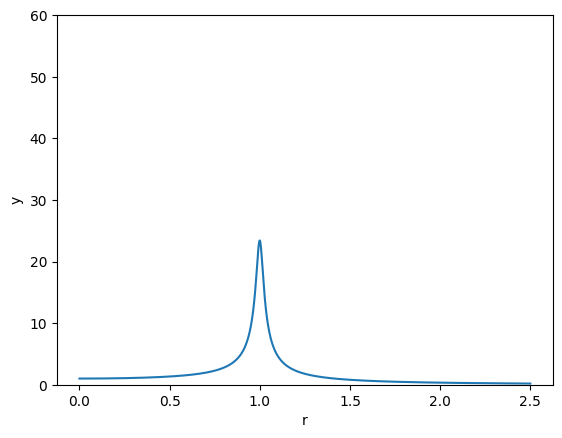

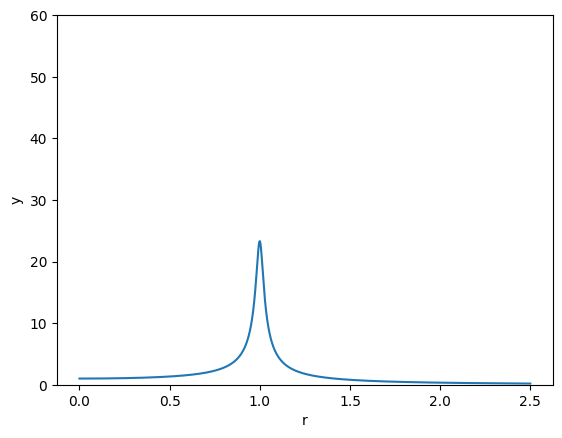

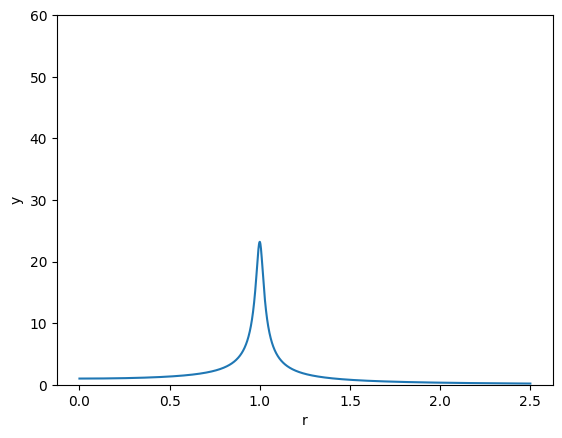

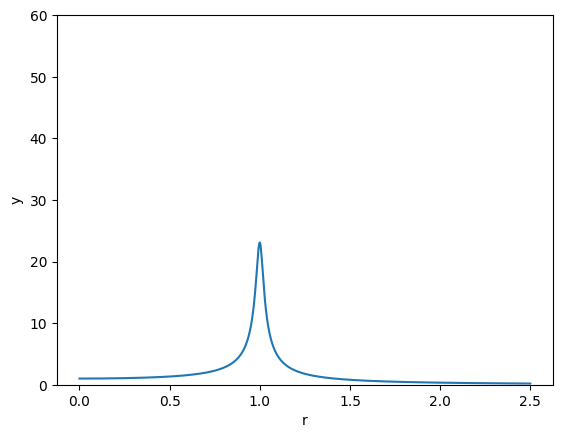

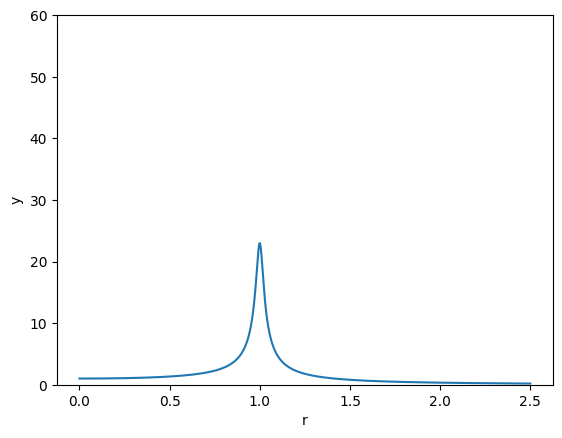

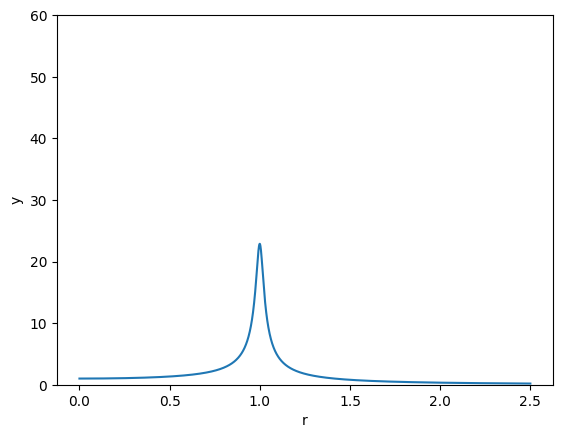

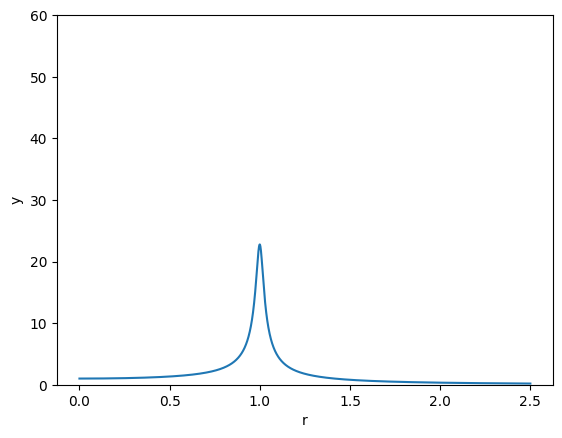

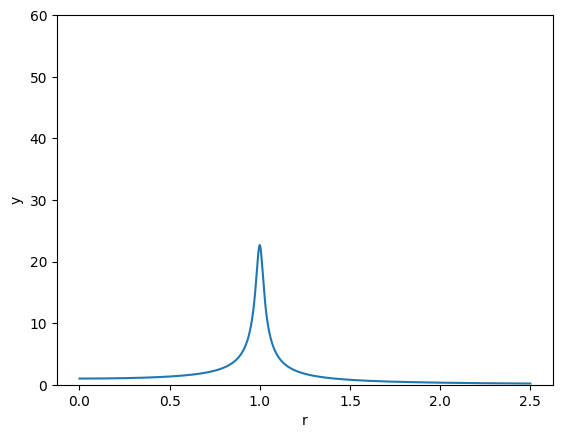

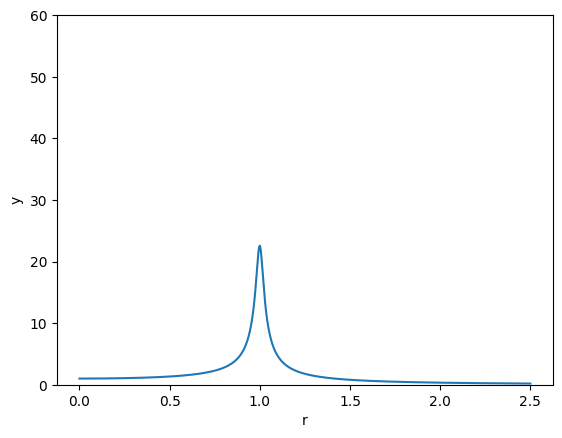

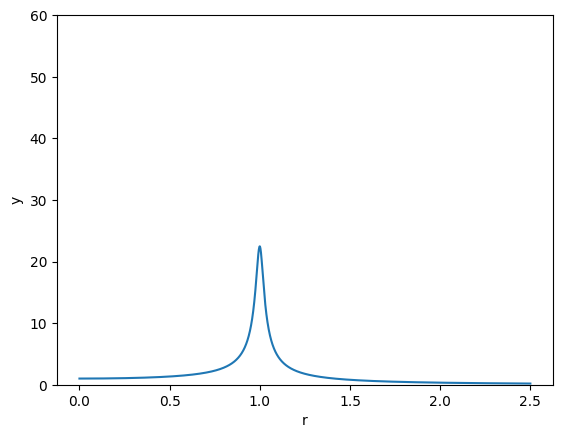

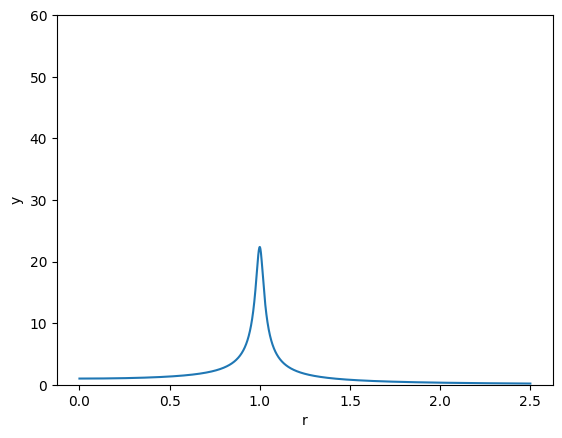

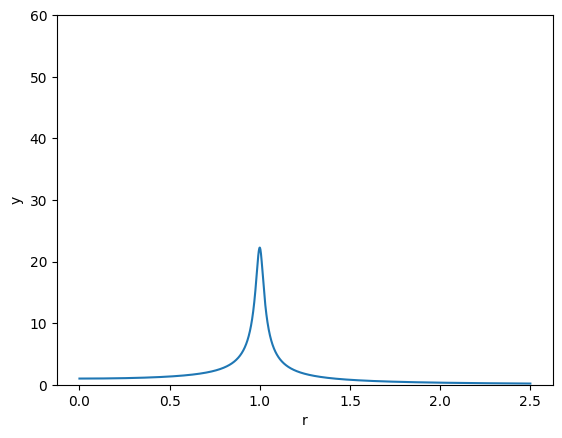

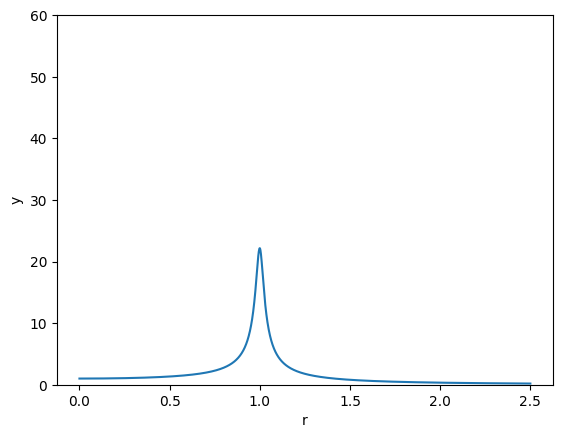

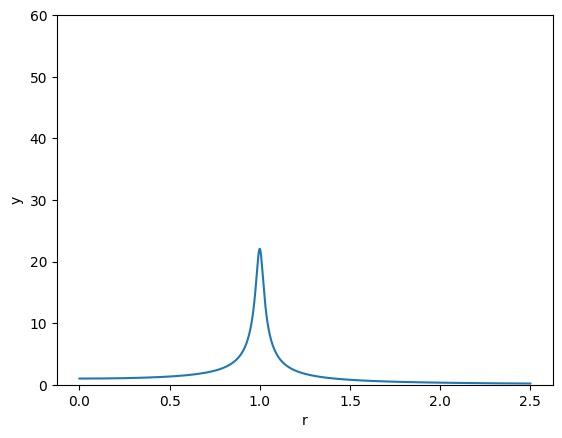

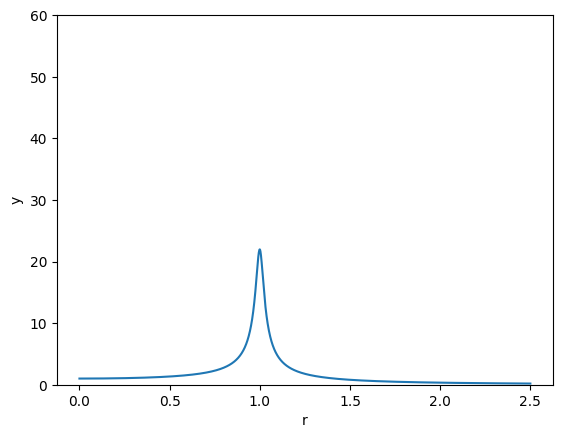

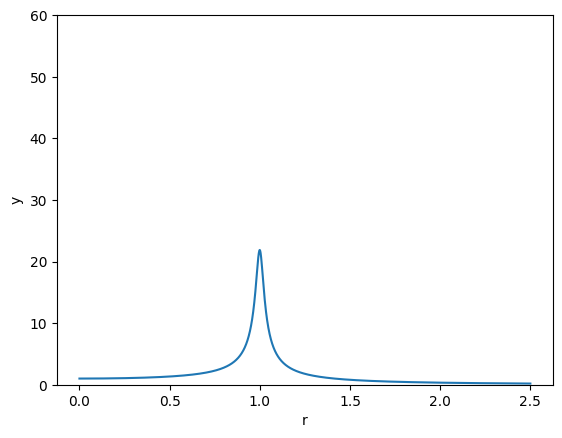

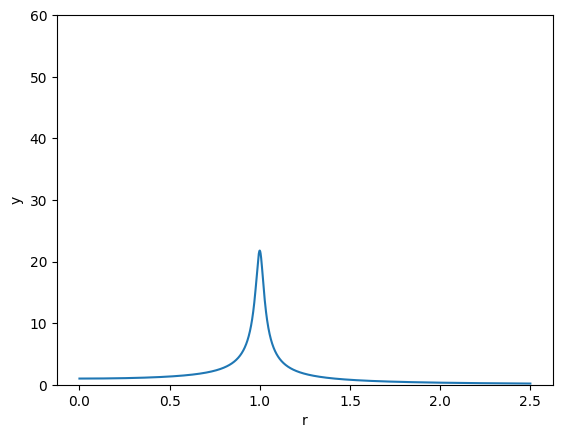

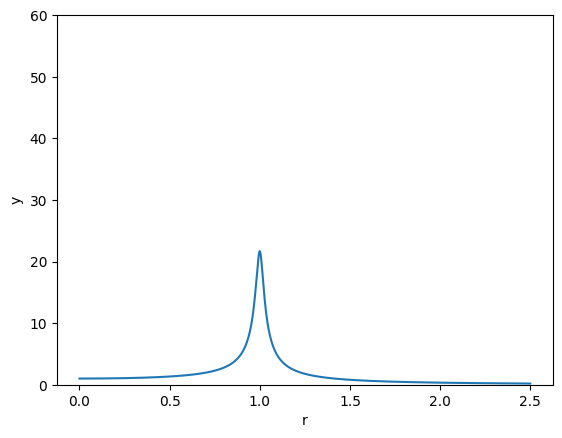

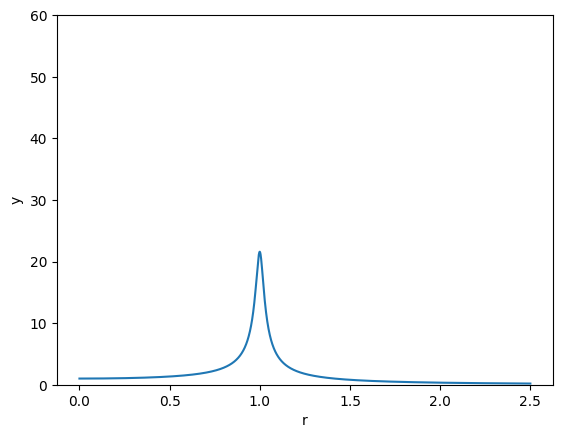

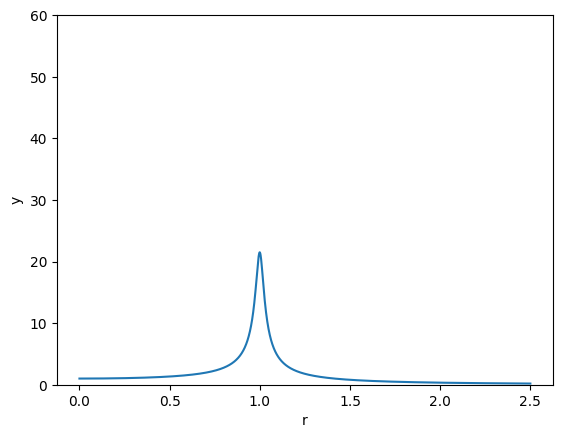

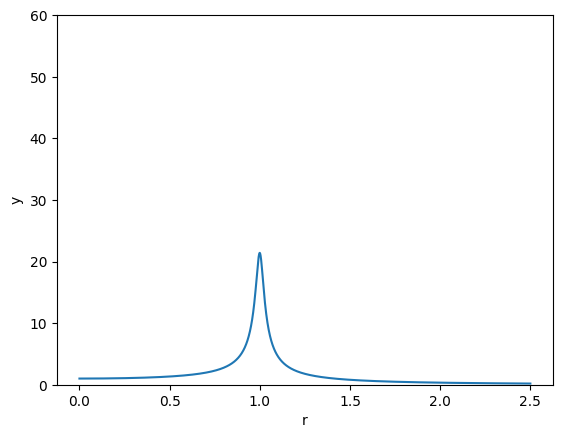

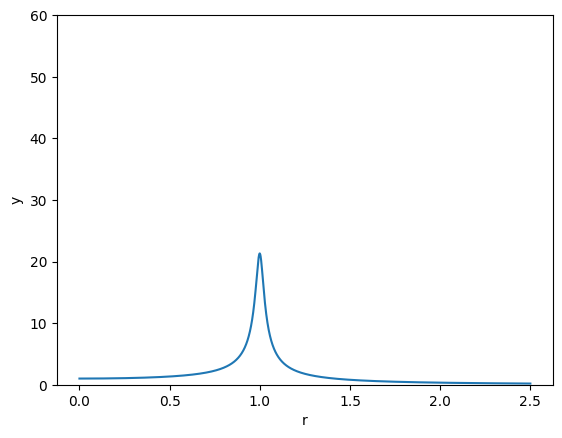

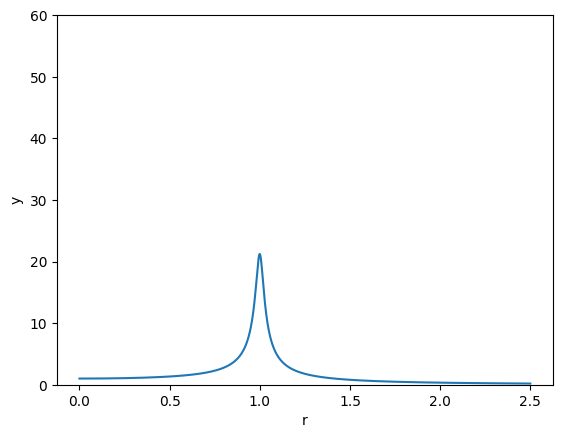

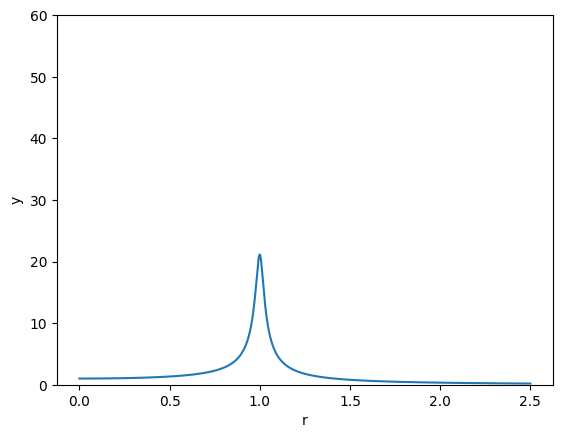

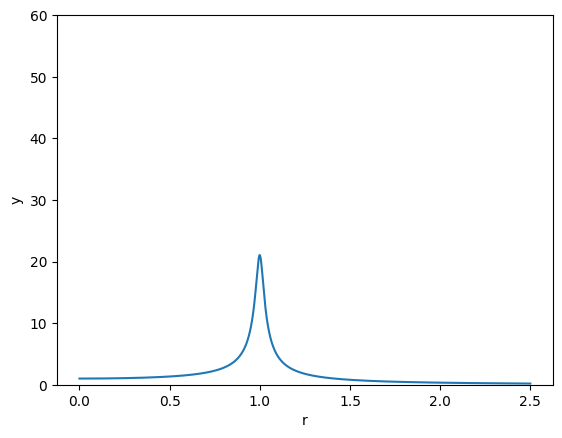

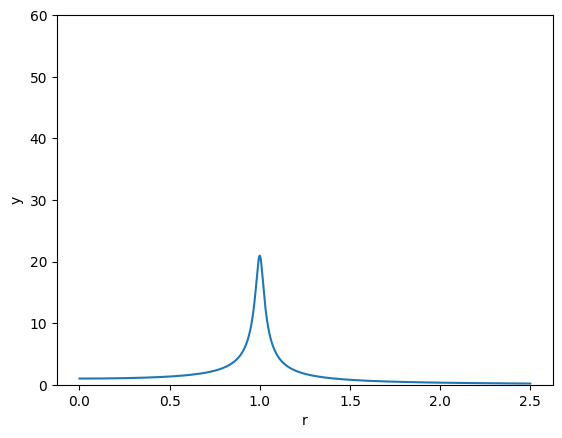

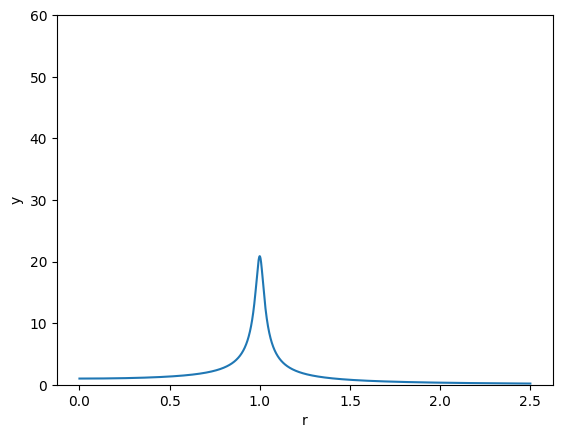

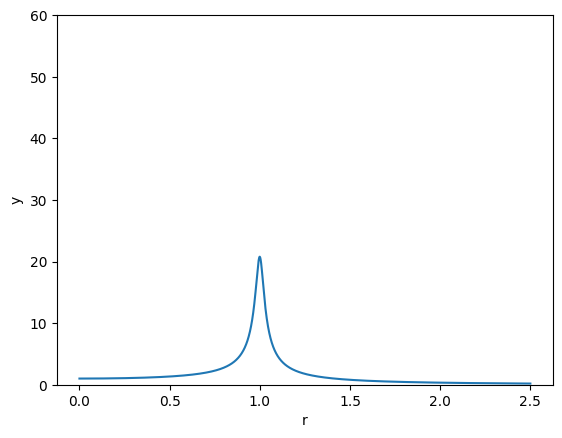

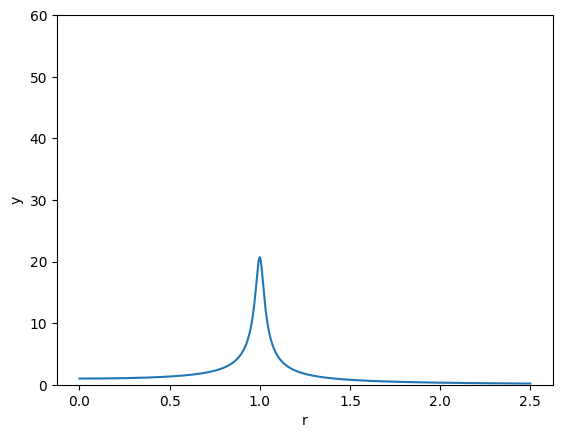

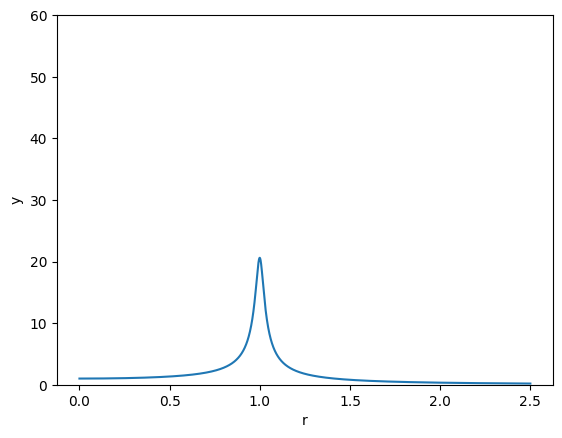

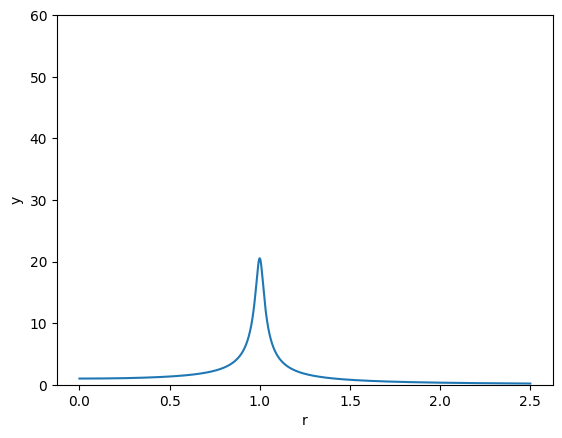

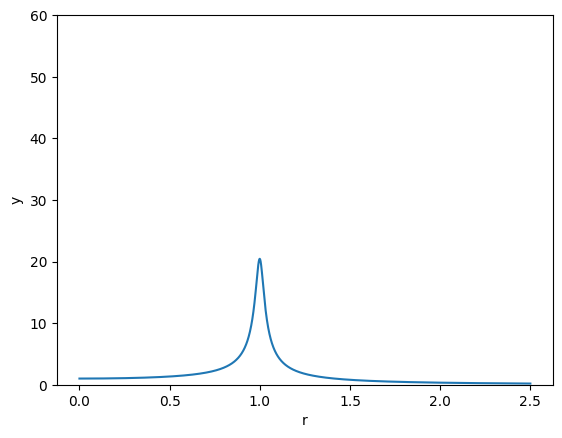

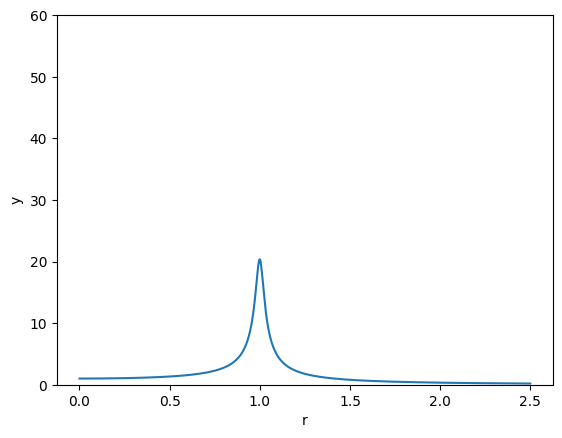

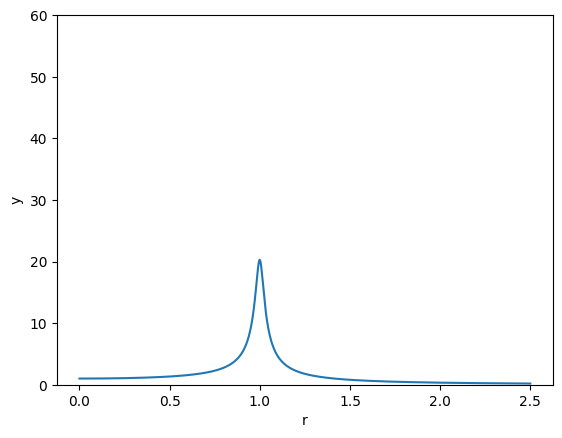

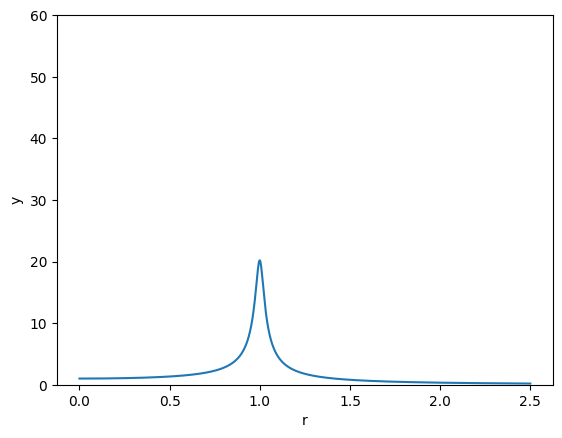

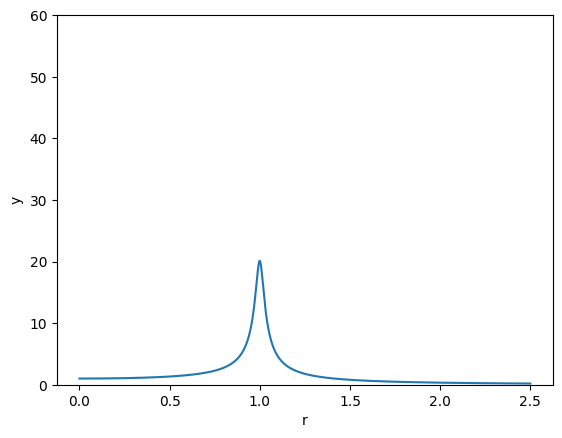

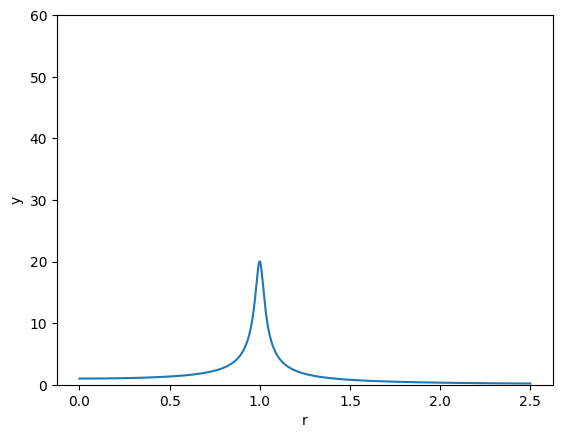

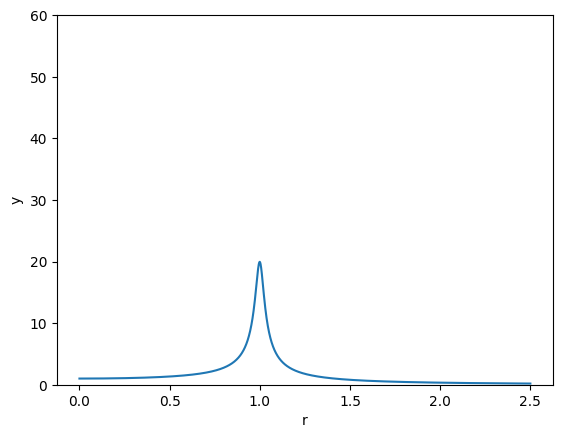

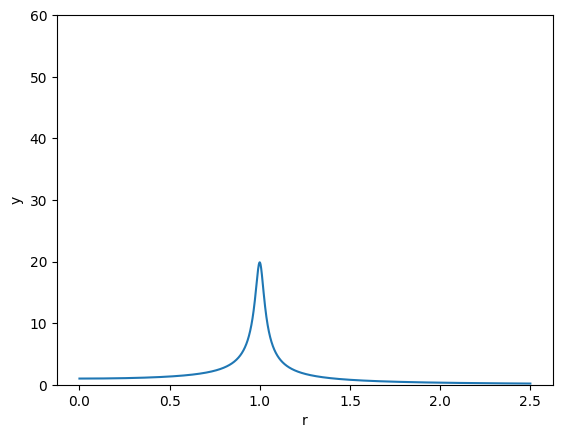

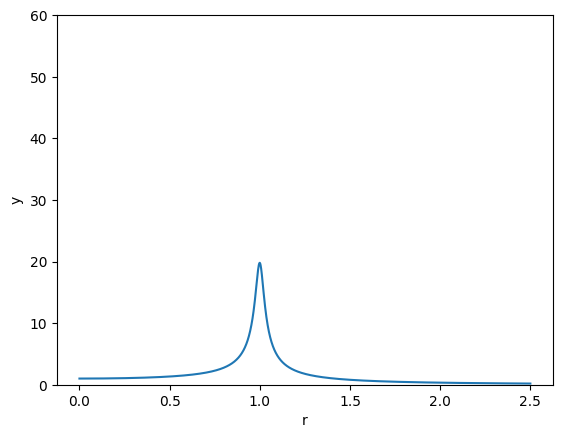

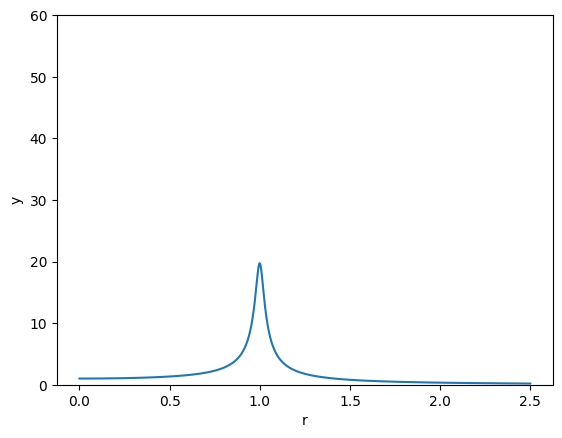

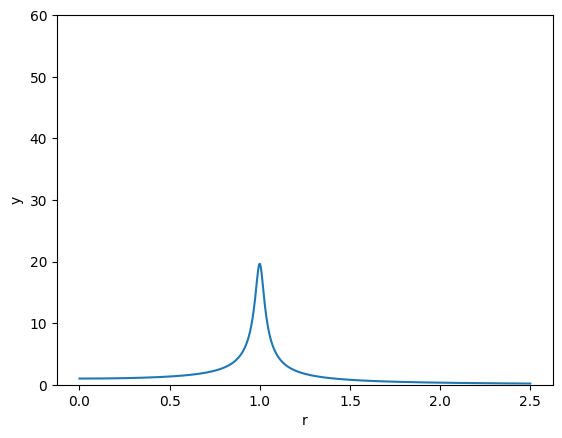

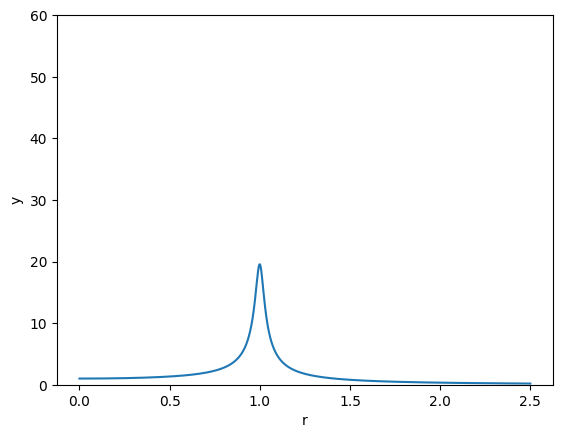

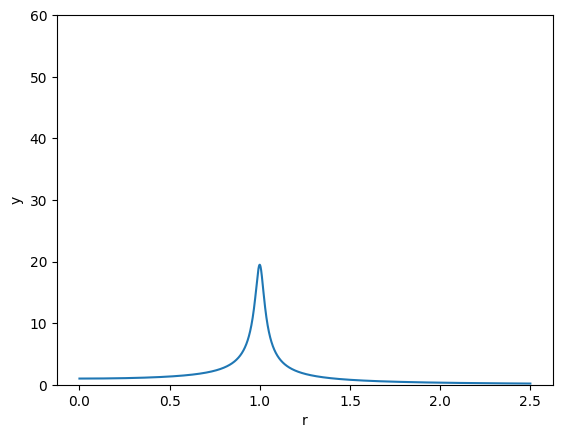

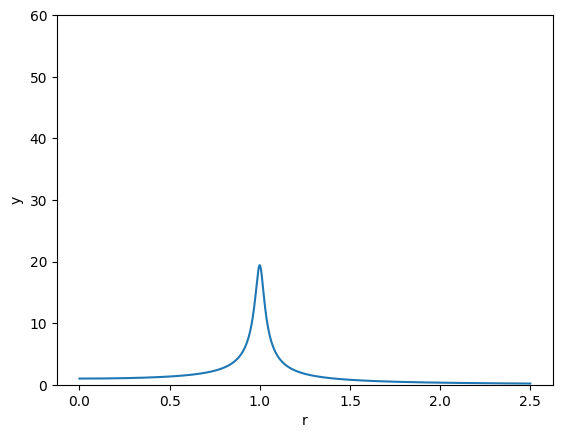

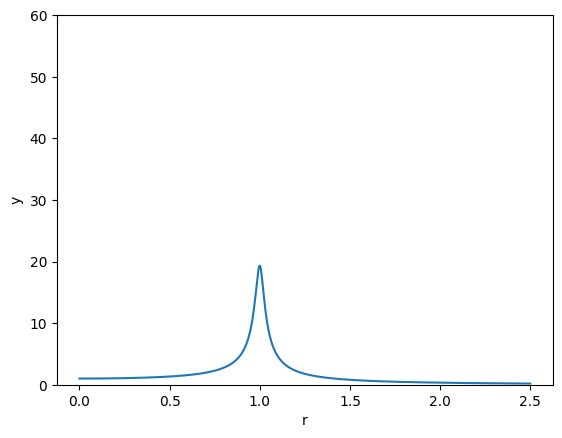

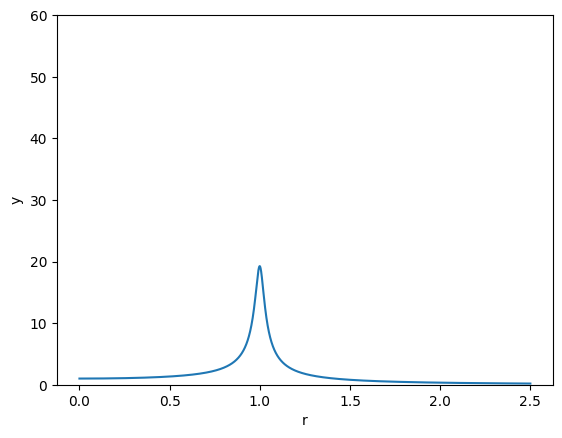

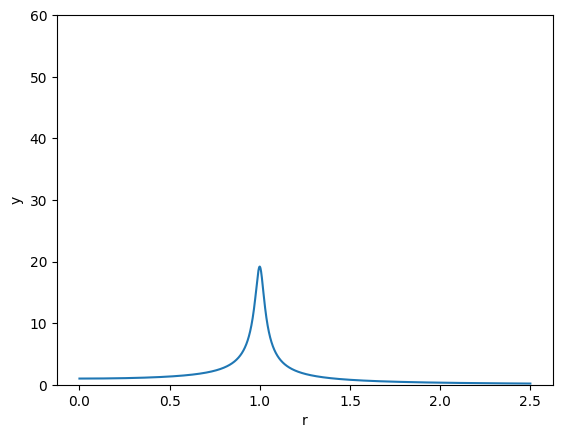

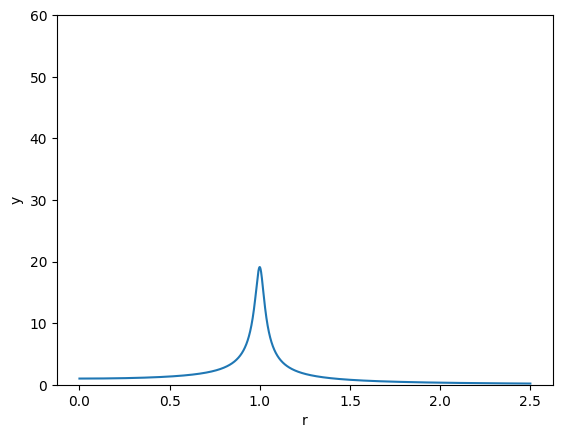

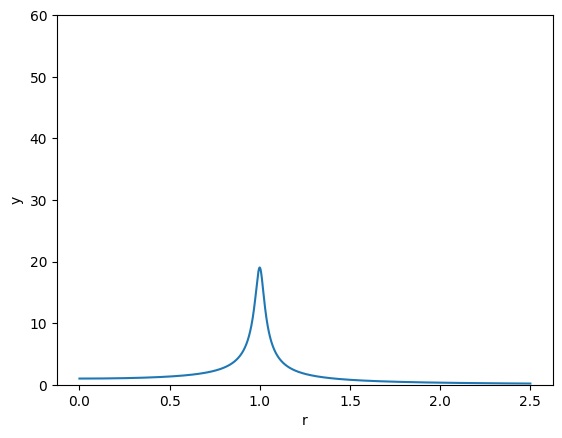

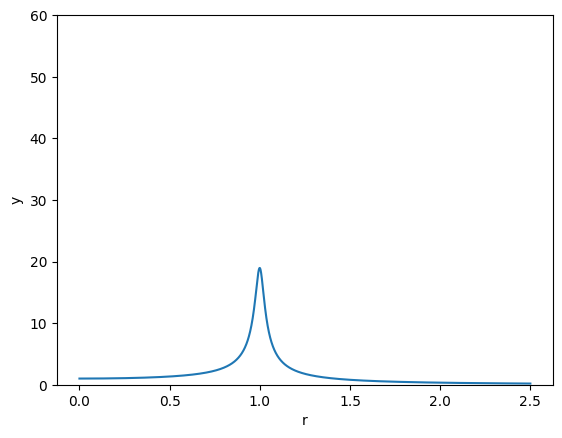

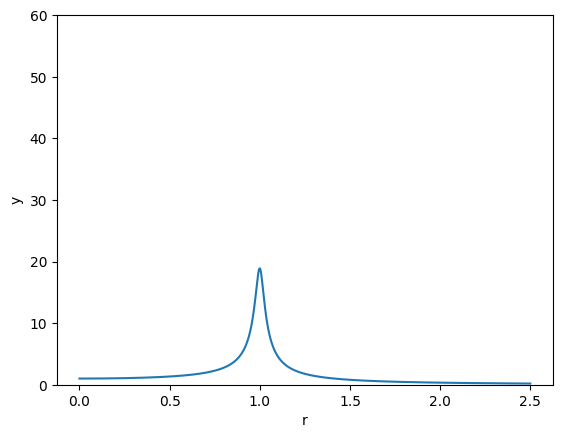

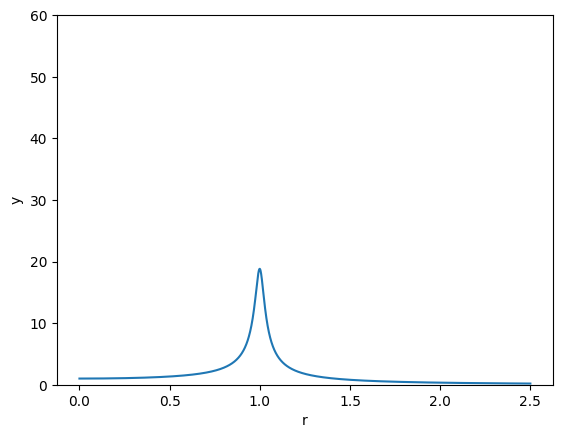

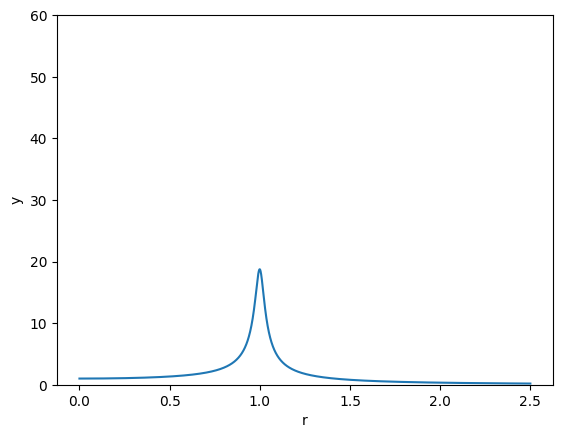

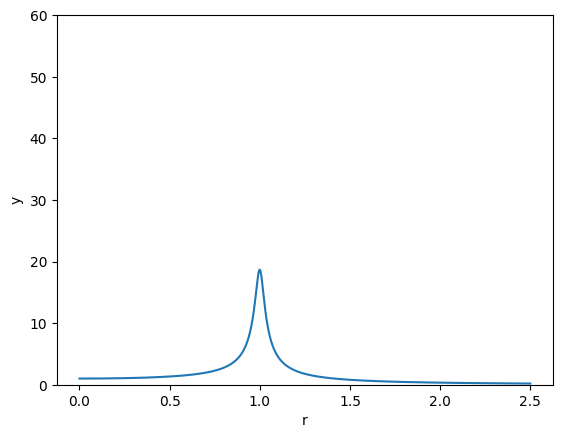

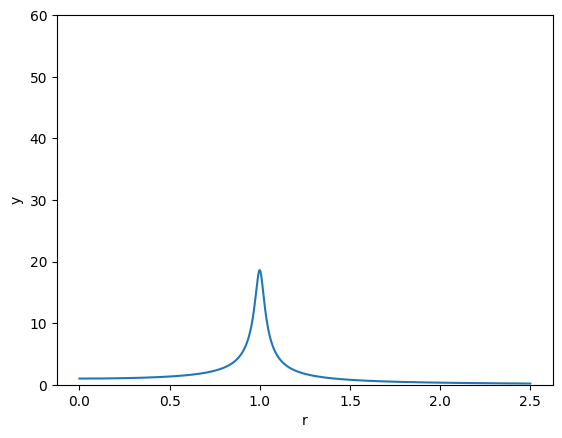

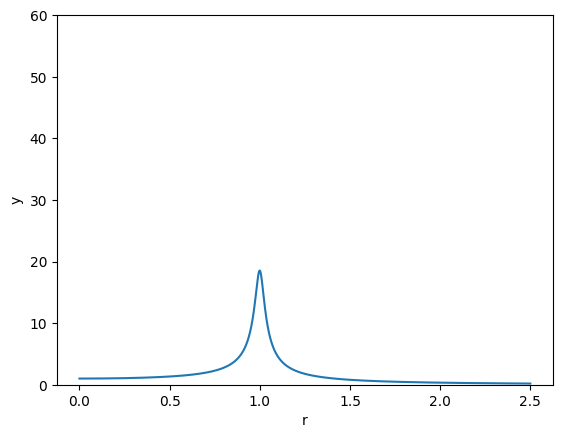

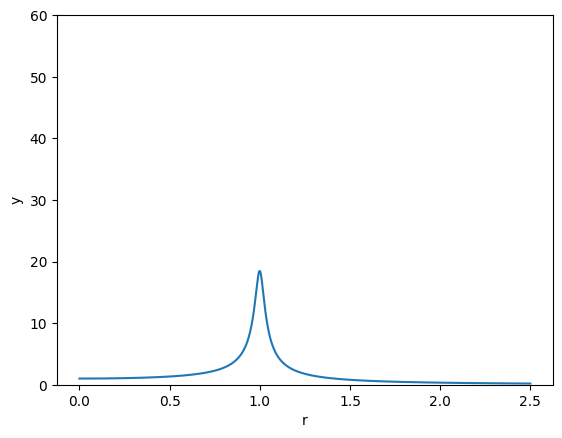

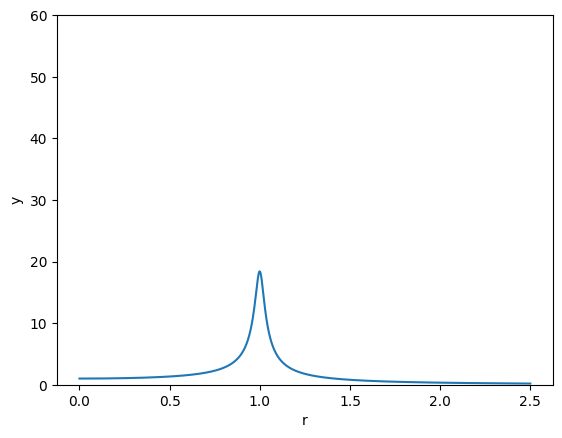

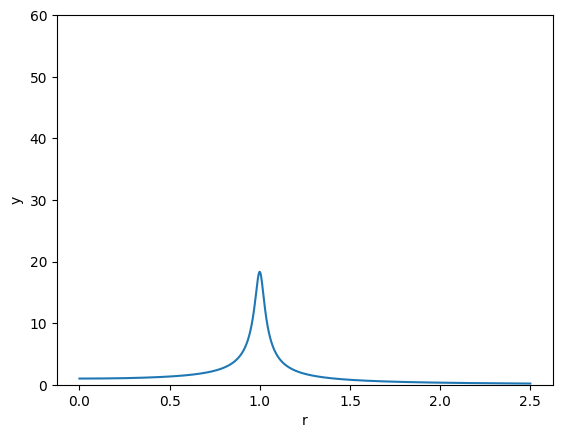

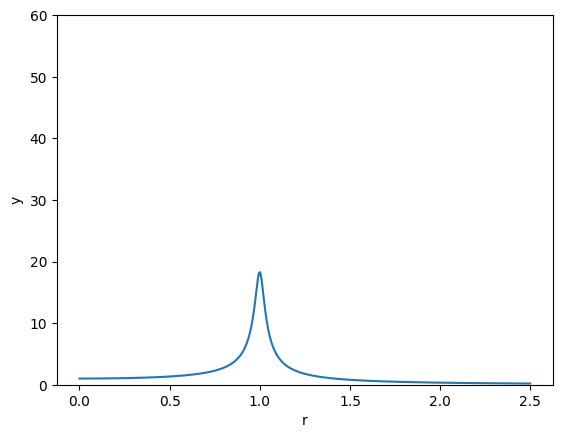

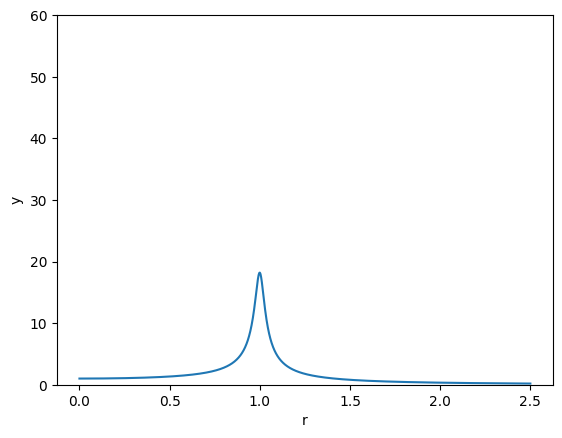

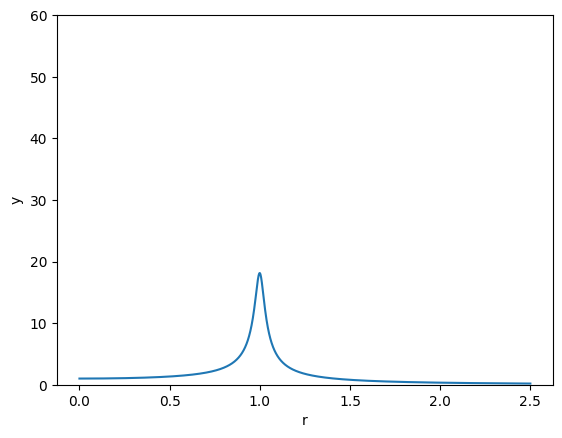

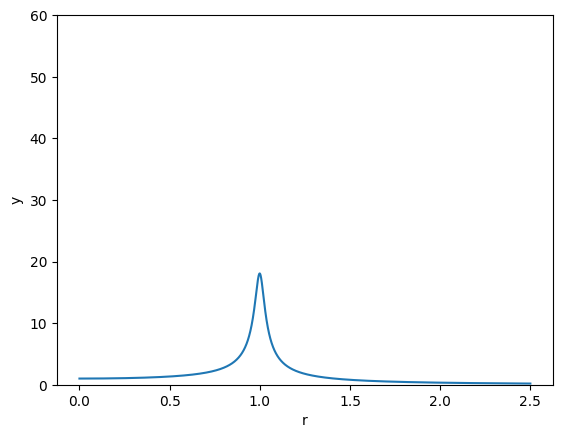

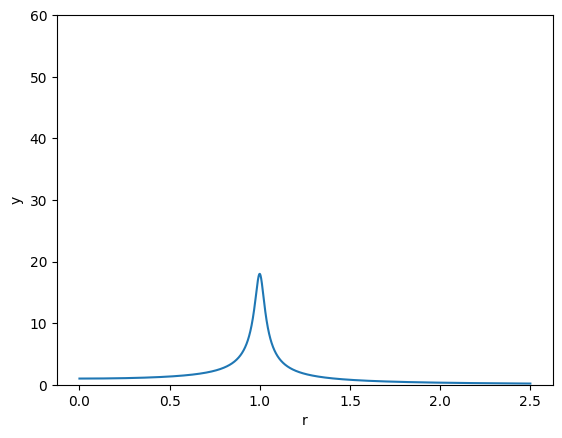

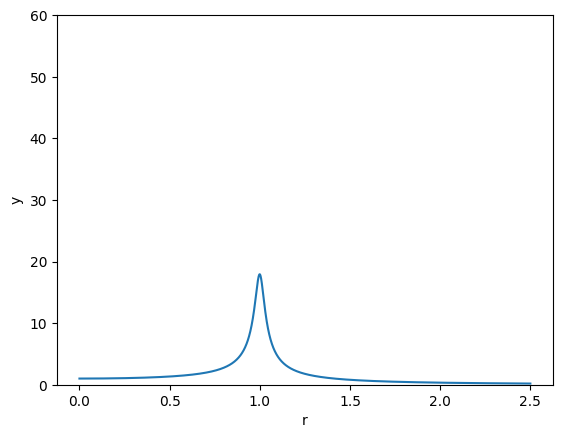

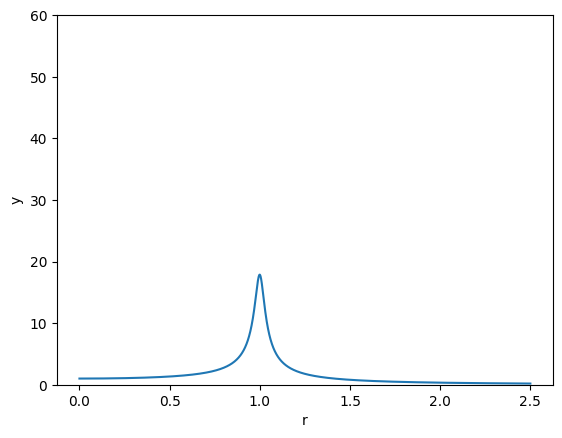

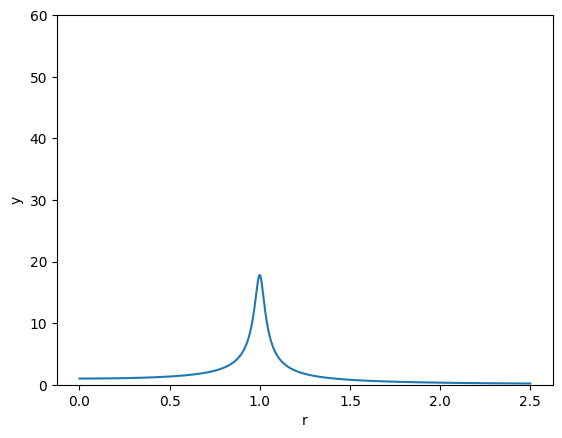

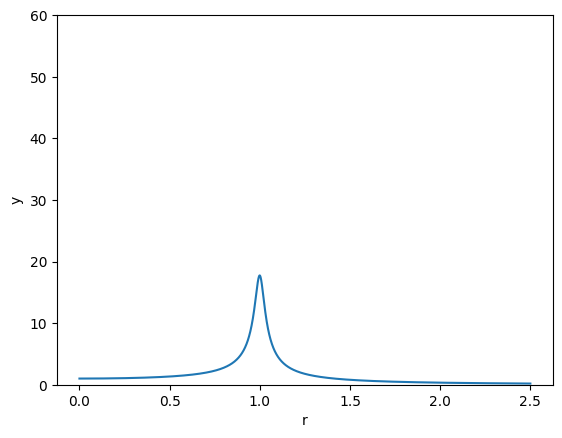

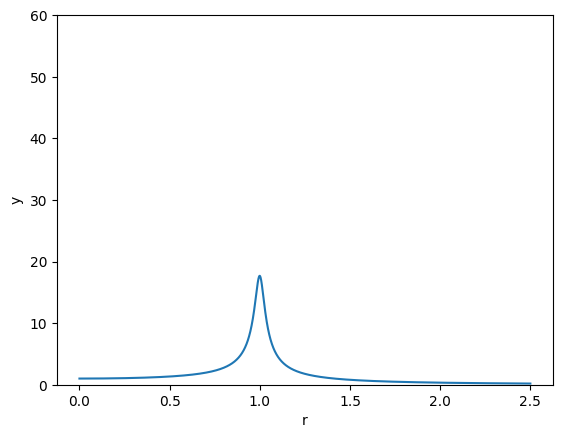

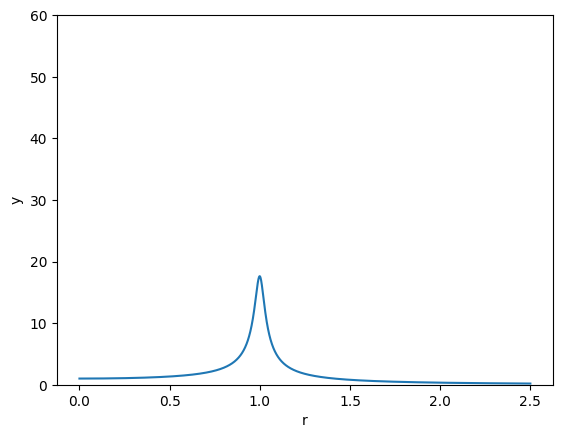

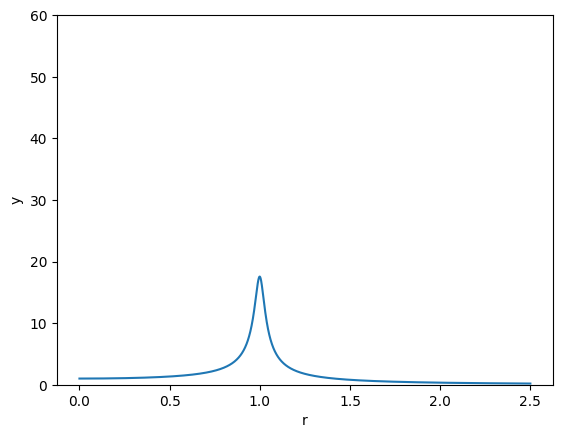

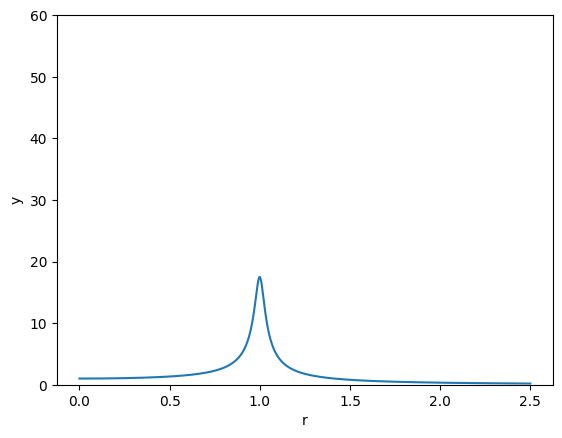

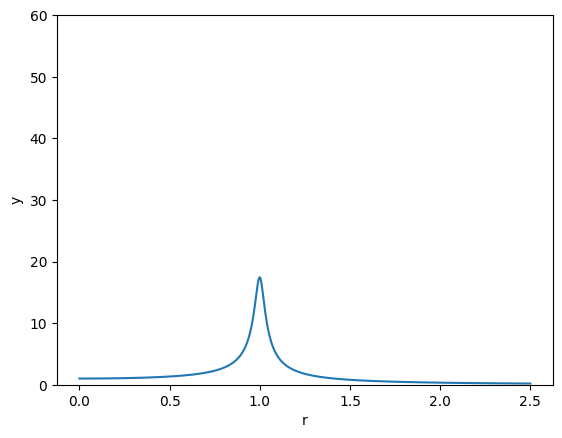

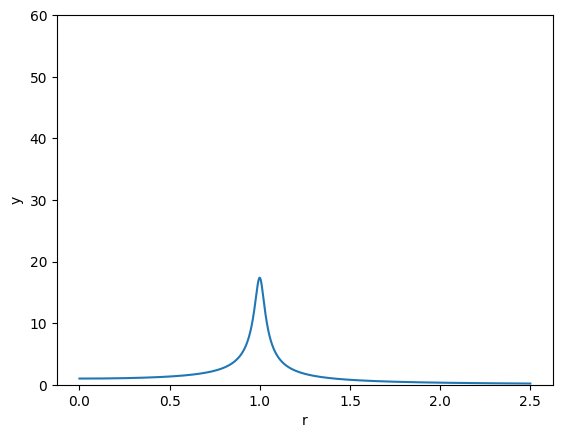

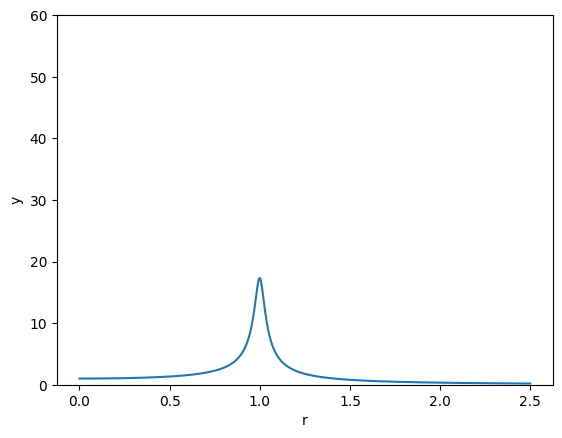

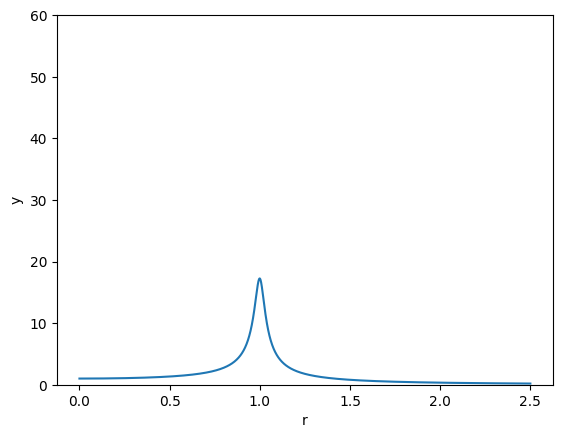

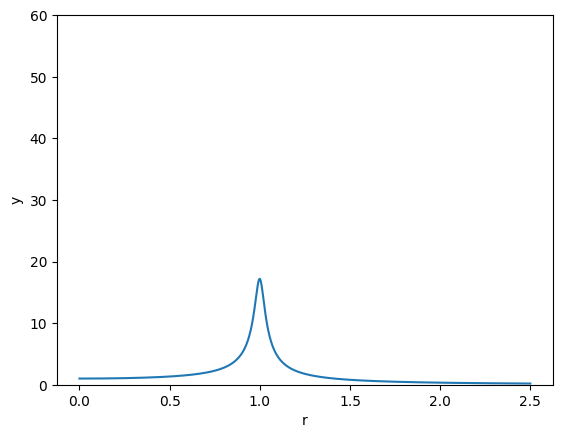

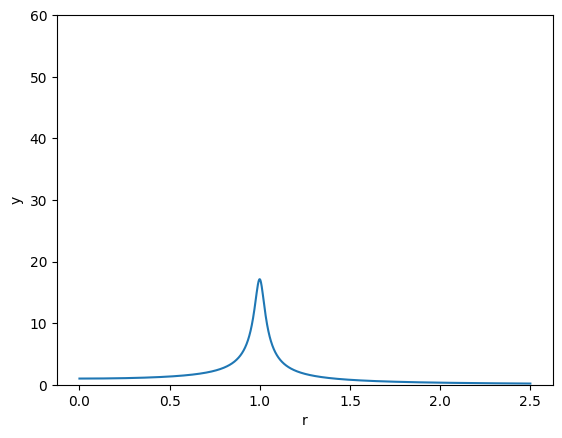

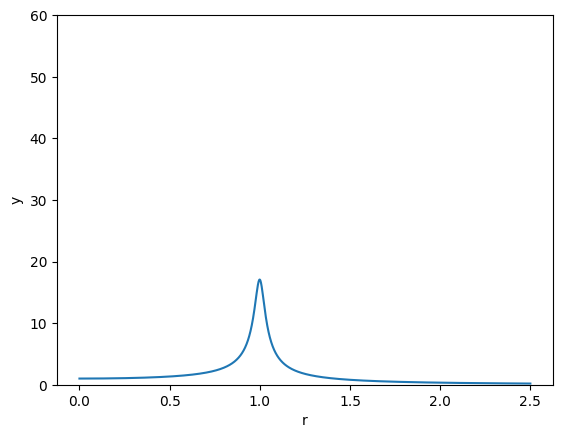

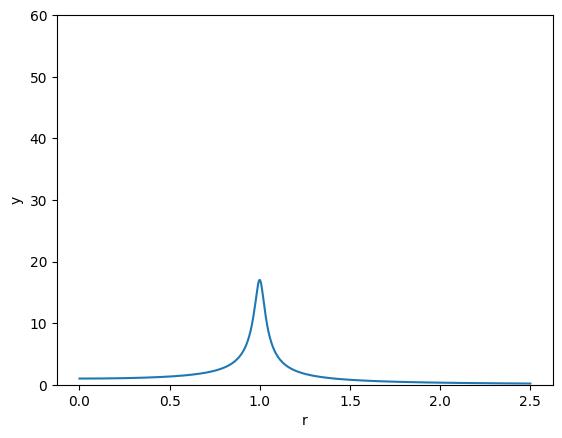

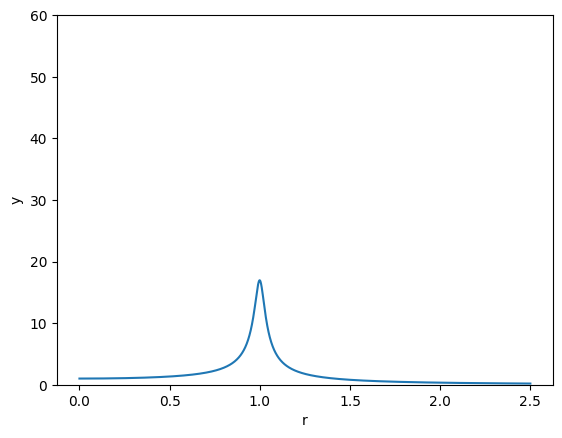

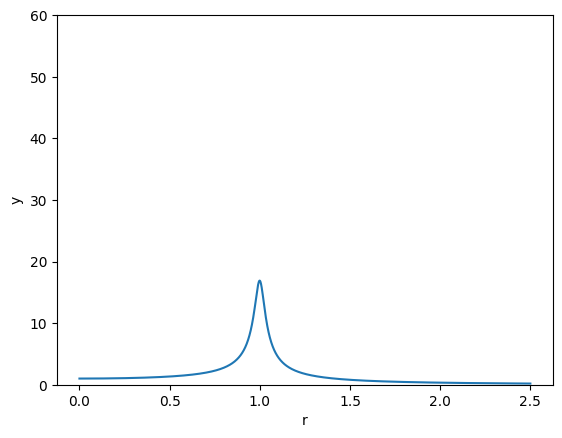

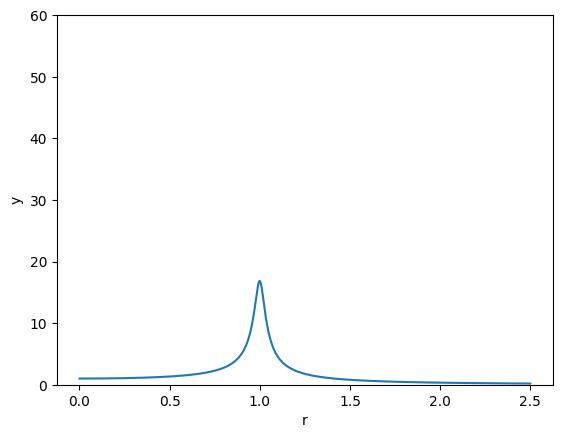

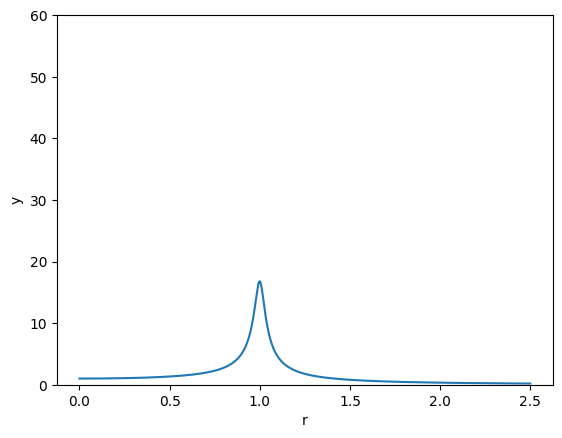

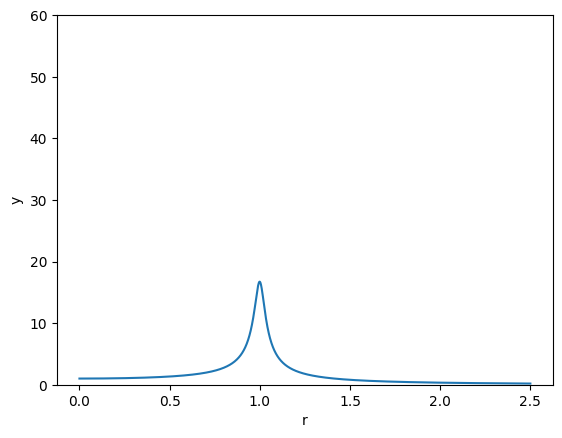

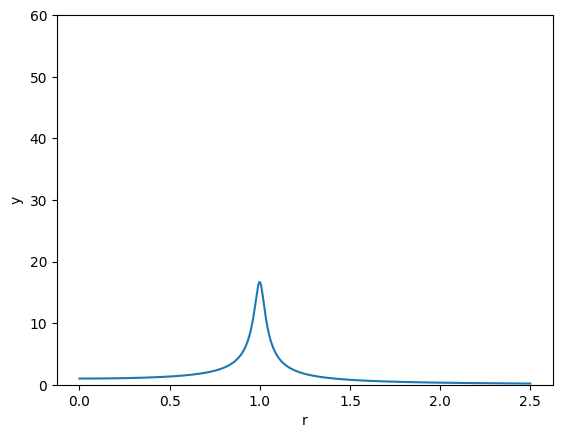

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Create a directory to store the graphs
graph_dir = "my_graphs"
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

# y=x/xst
# r=w/wn
r = np.linspace(0, 2.5, 2500)
zeta = np.linspace(0.01, 0.03, 200)

labels = ["zeta = {:.4f}".format(z) for z in zeta]

# Generate a unique file name for each graph
i = 0
for zeta_value in zeta:
    file_name = os.path.join(graph_dir, f"zeta={zeta_value:.4f}.png")

    # Save the graph to the directory using the generated file name
    plt.plot(r, 1/(np.sqrt(np.square(1-np.square(r))+np.square(2*zeta_value*r))), label=labels[i])
    # plt.title(f"Zeta = {zeta_value:.4f}")
    plt.xlabel("r")
    plt.ylabel("y")
    # plt.legend()
    plt.ylim([0,60])
    plt.savefig(file_name)
    plt.show()

    # plt.close()
    # Increment the counter
    i += 1

# Close the plot window
plt.close()

# plt.legend()

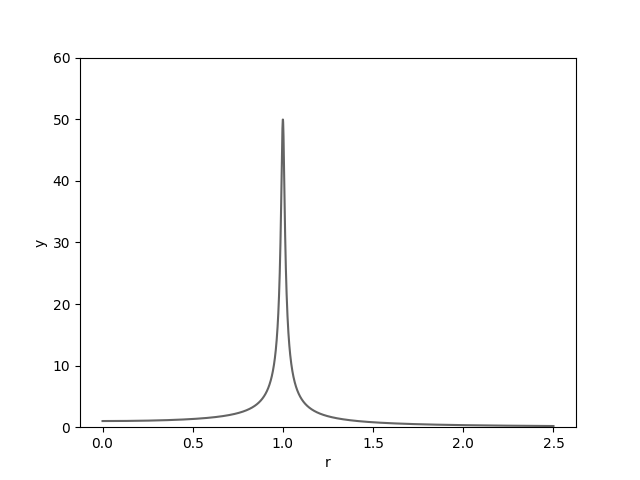

In [ ]:

import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/my_graphs/zeta=0.0100.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)


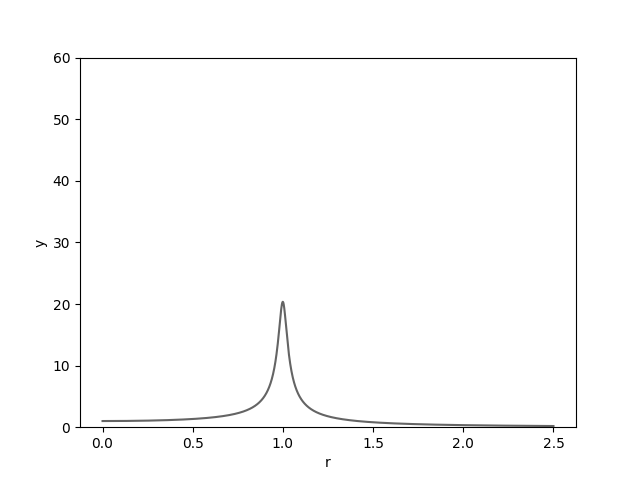

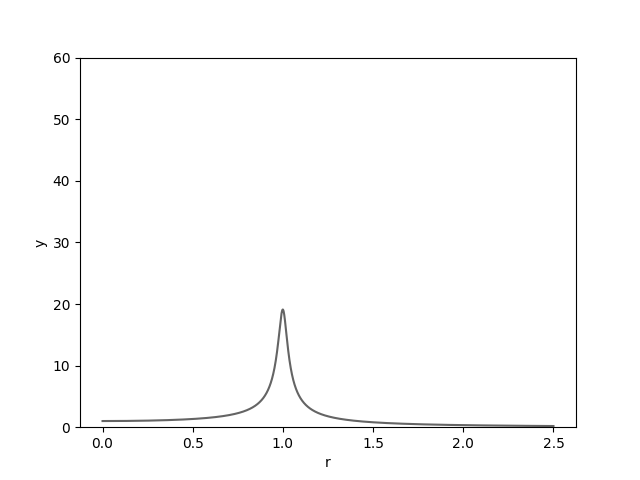

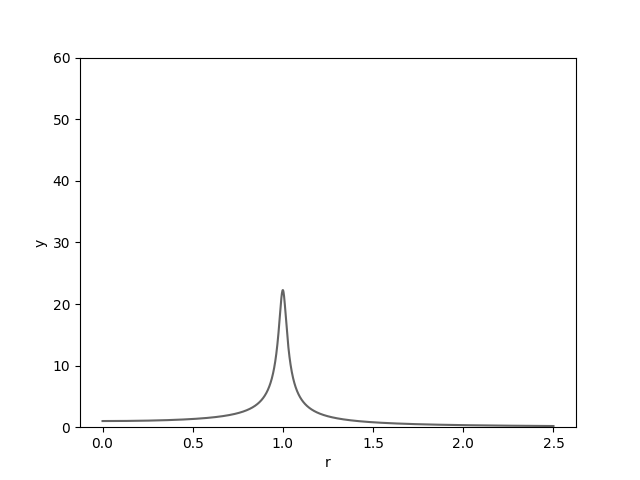

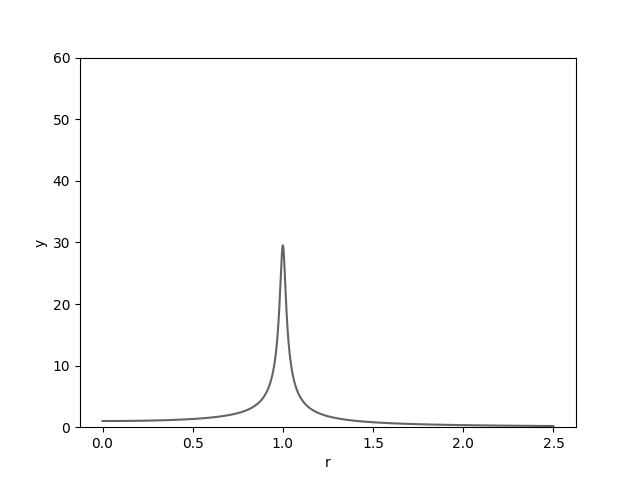

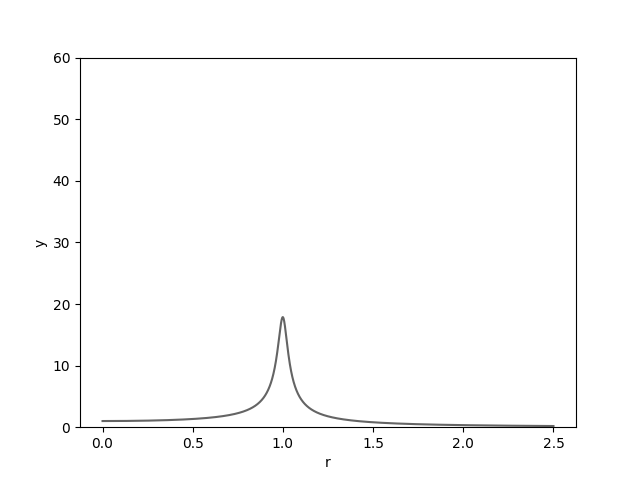

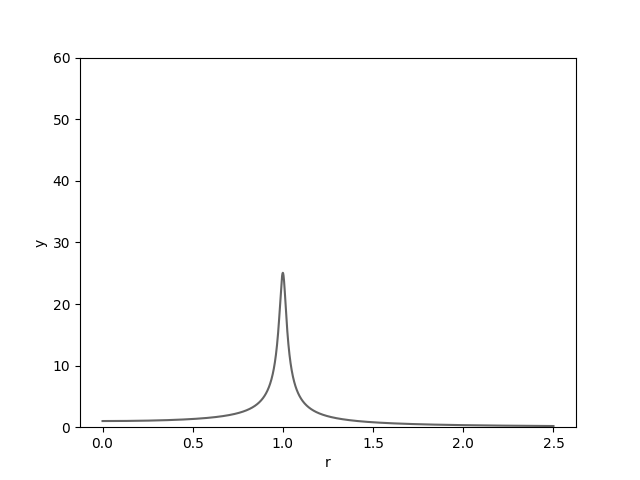

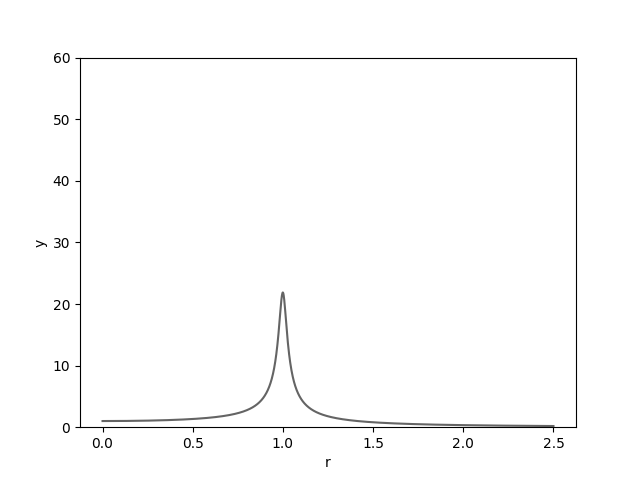

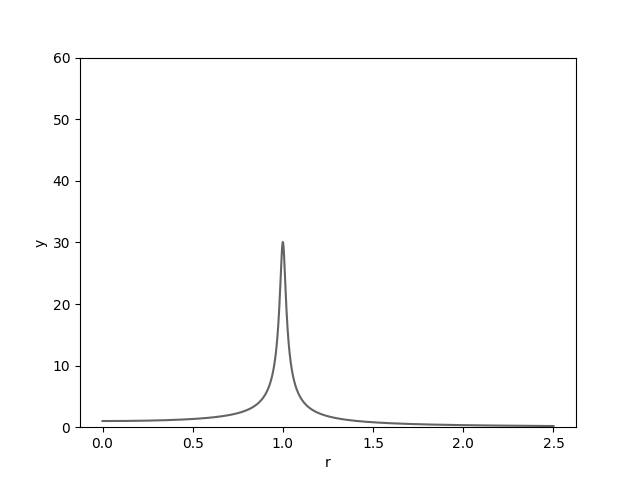

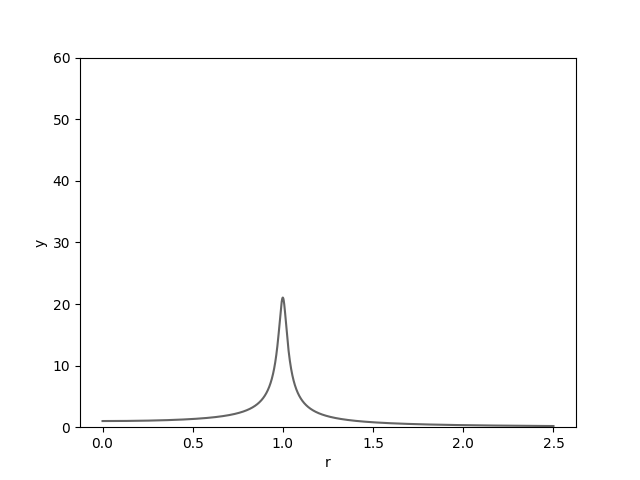

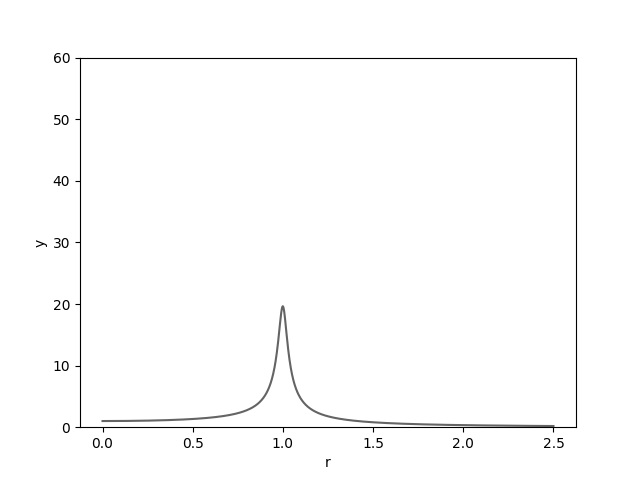

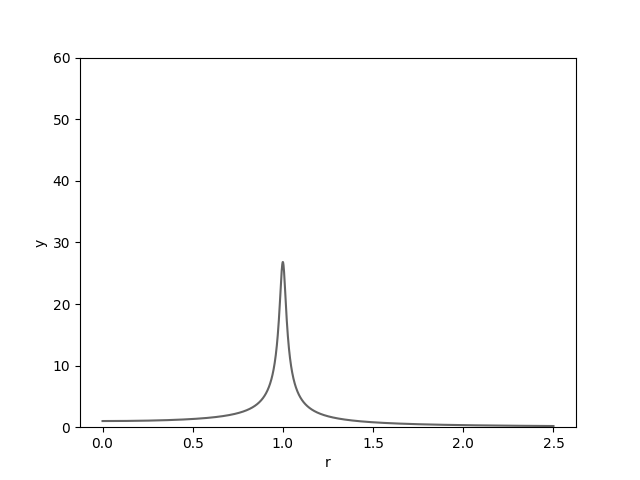

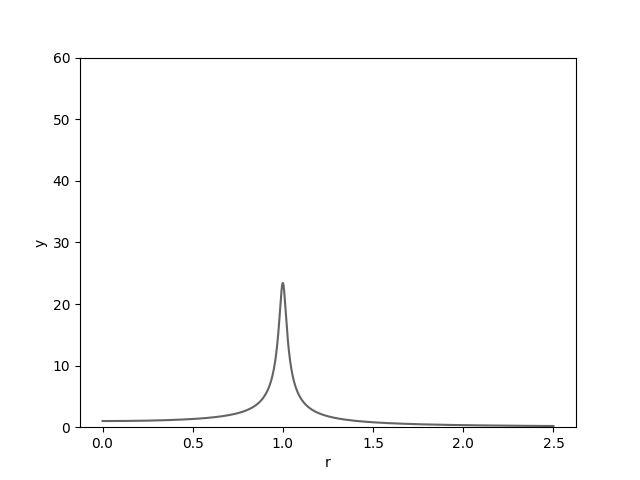

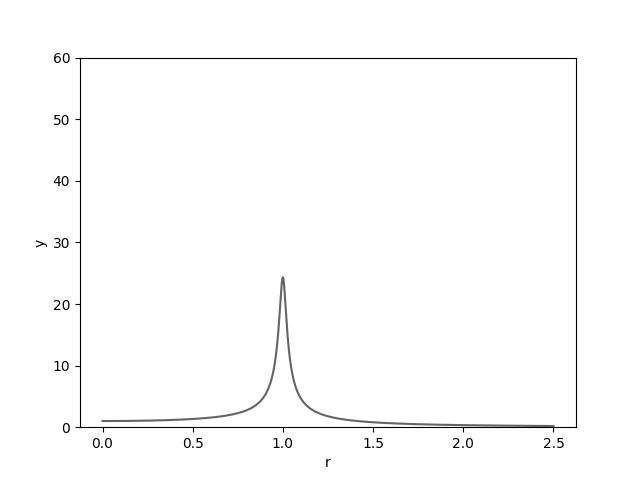

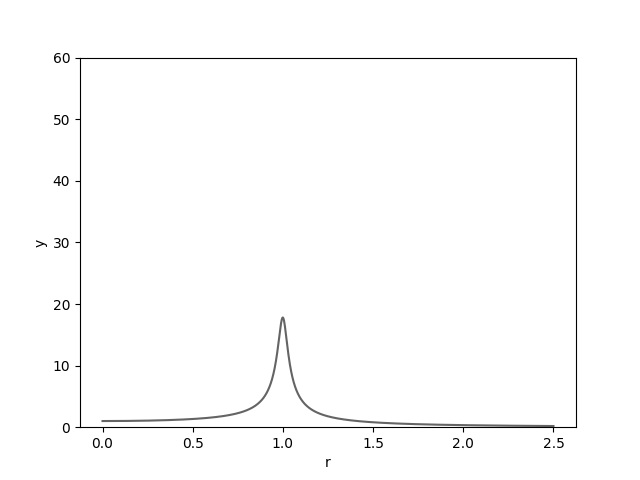

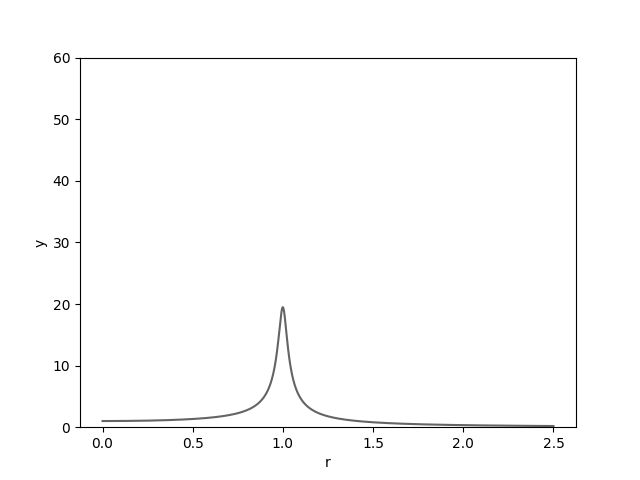

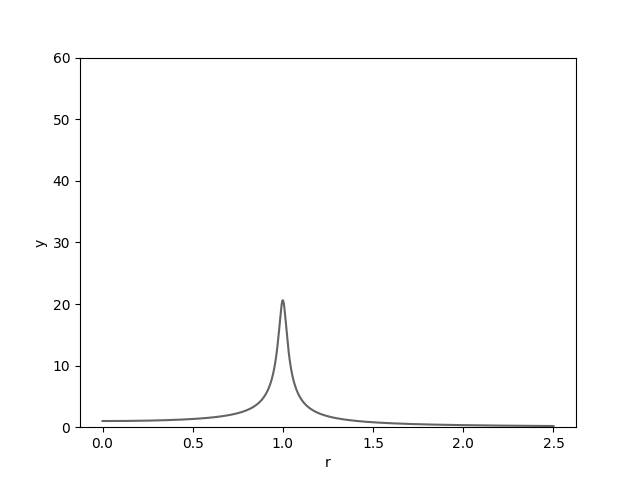

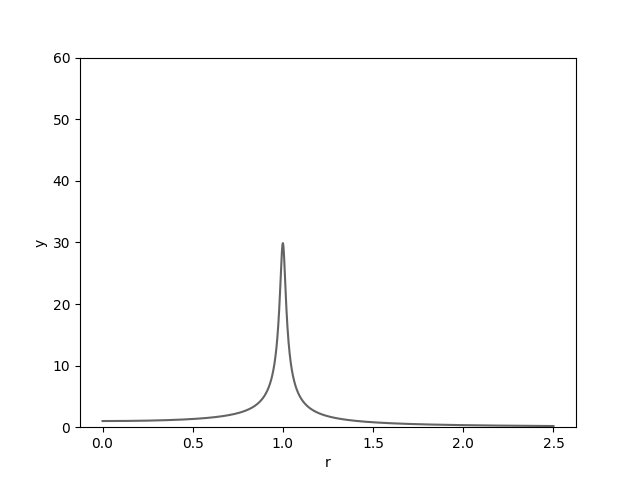

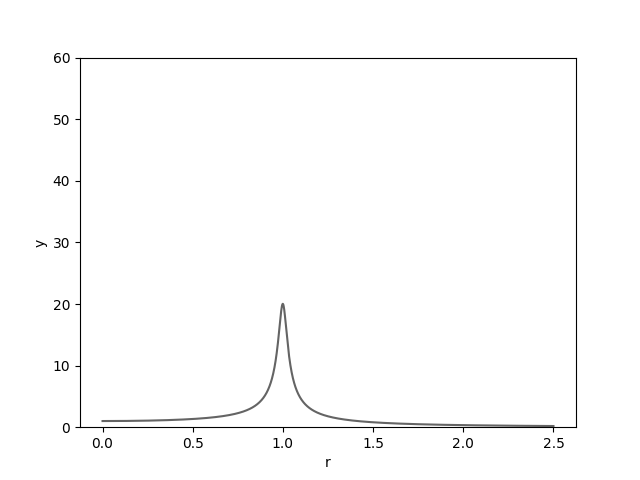

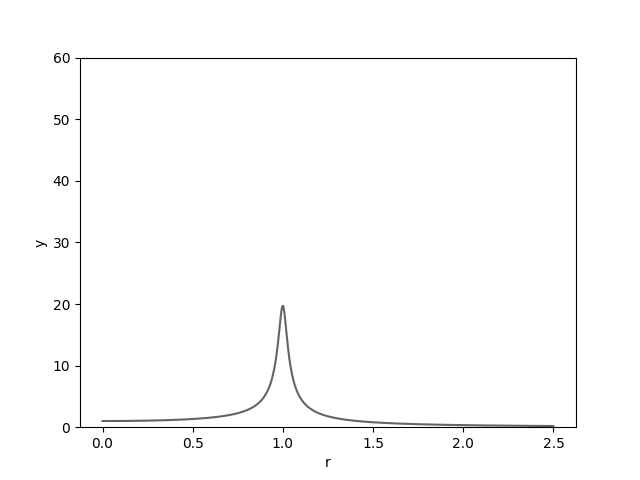

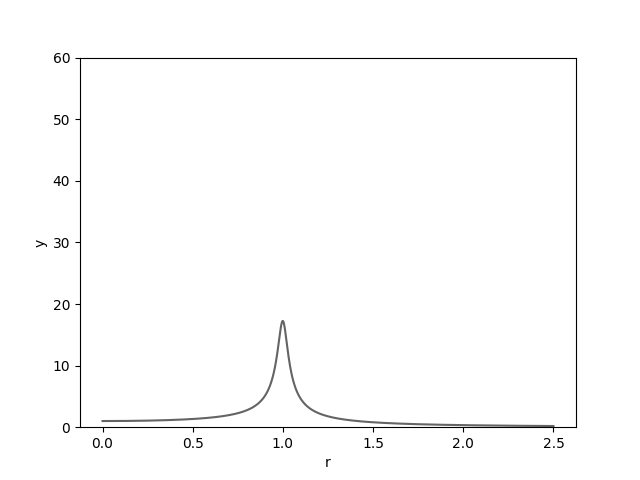

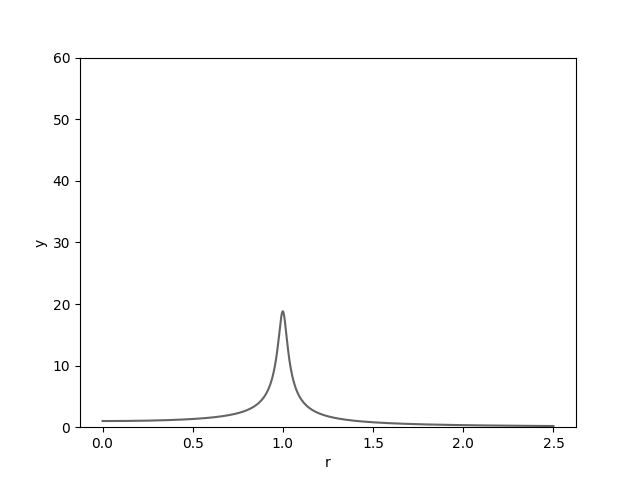

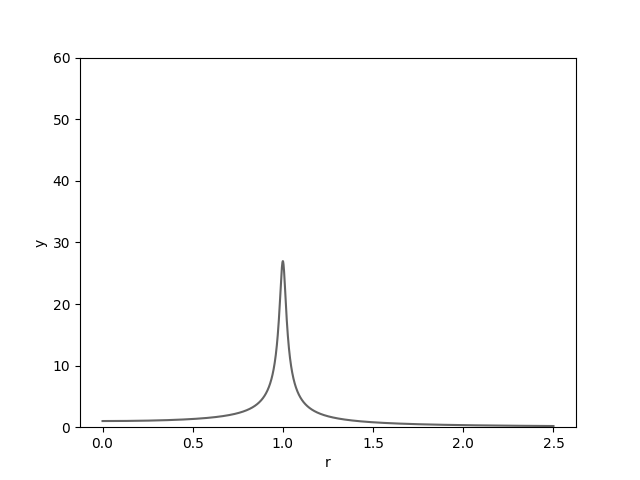

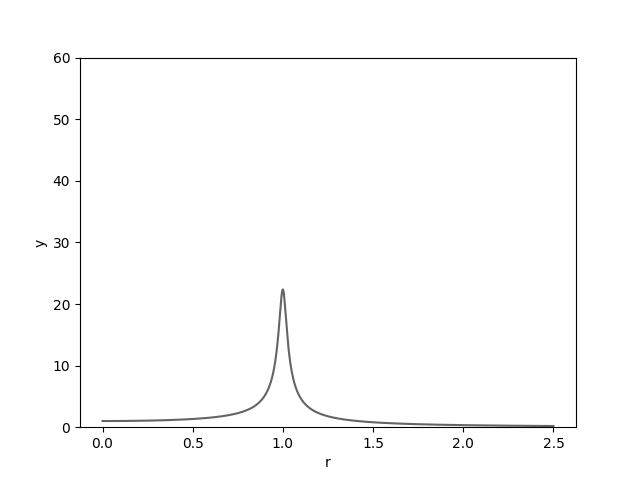

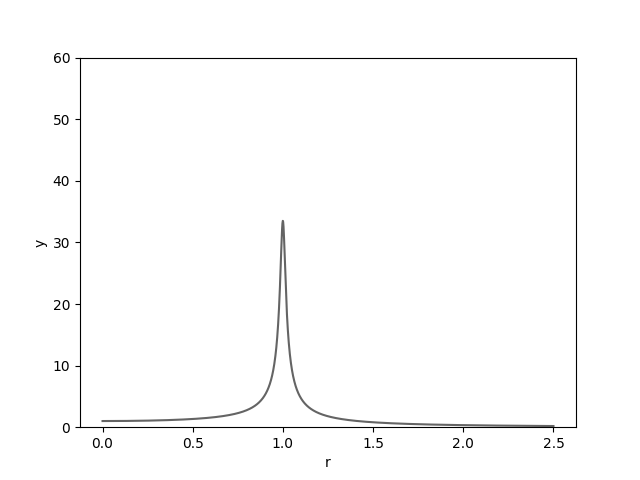

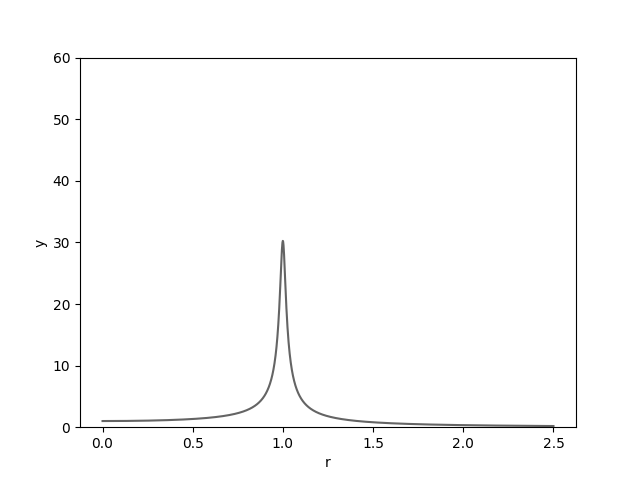

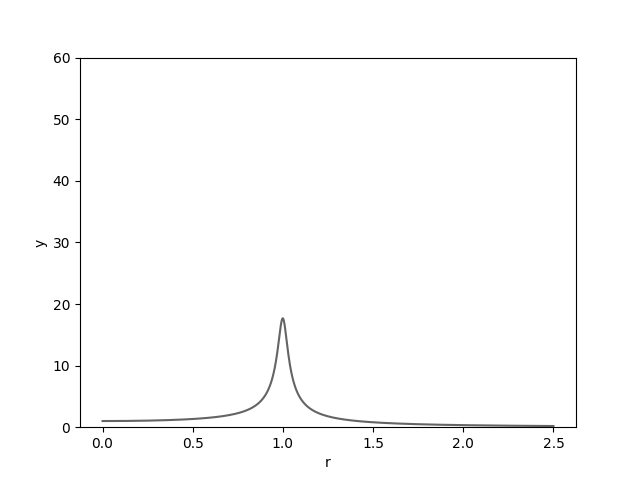

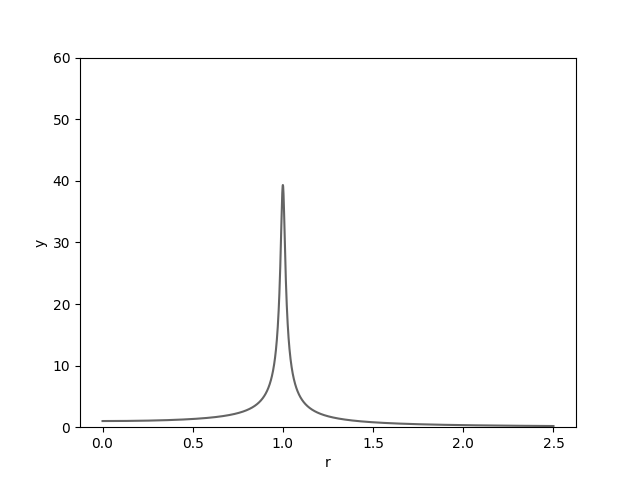

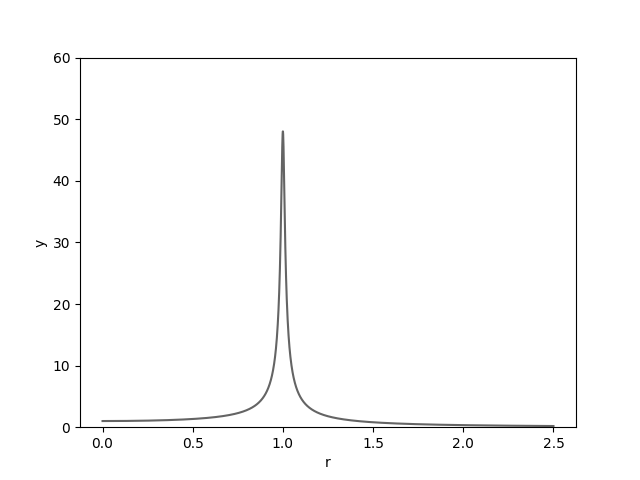

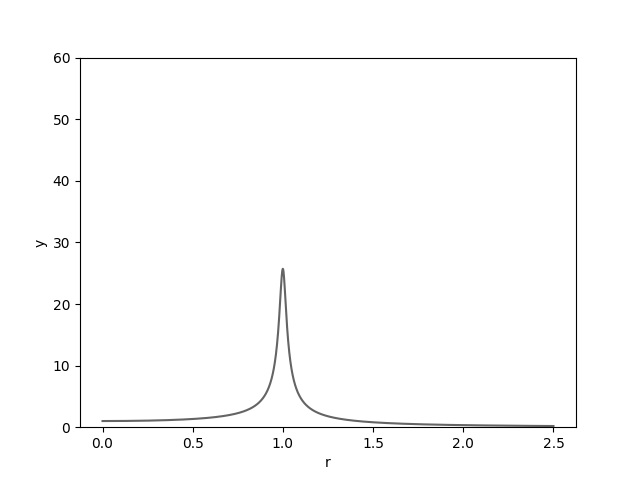

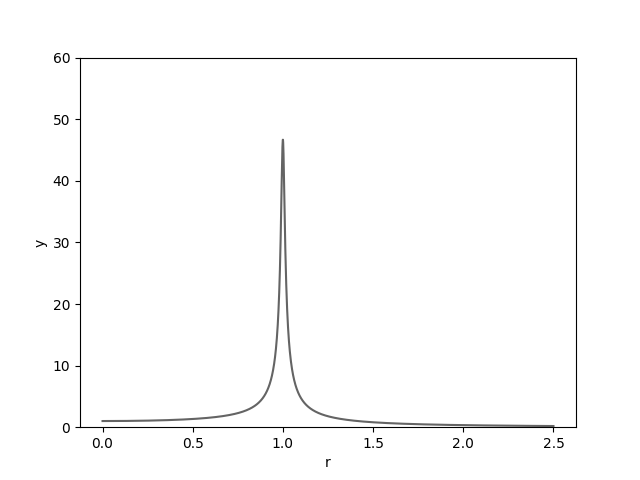

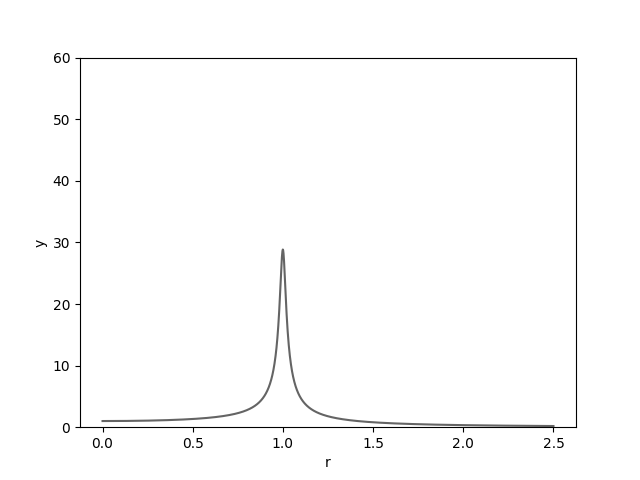

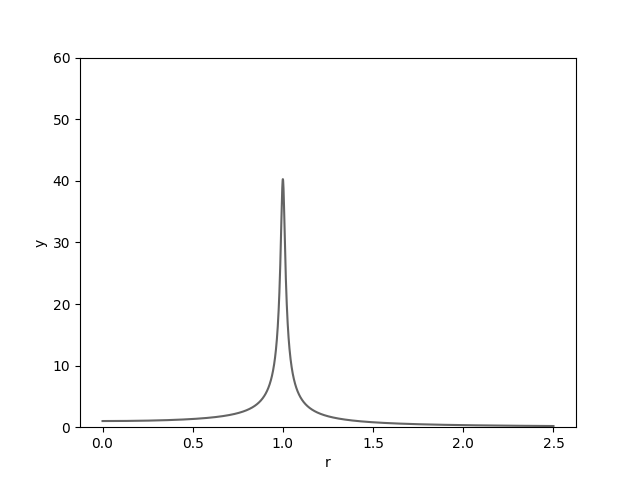

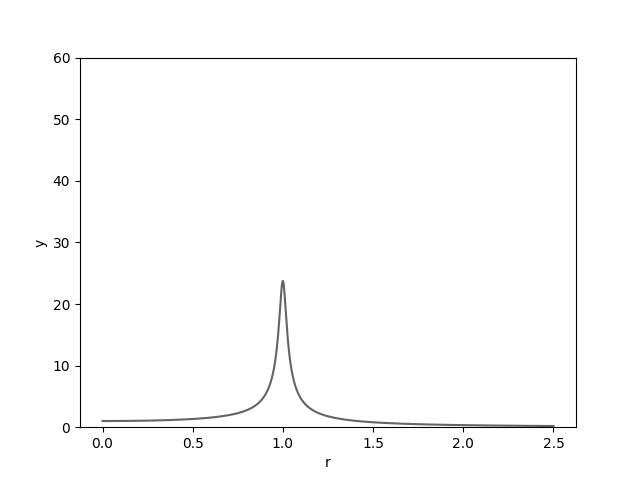

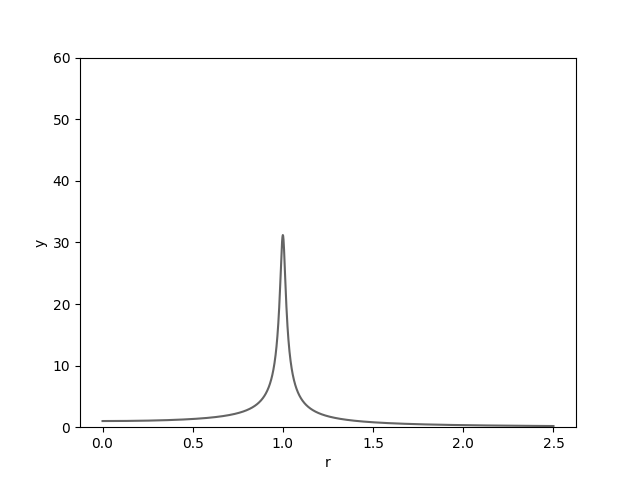

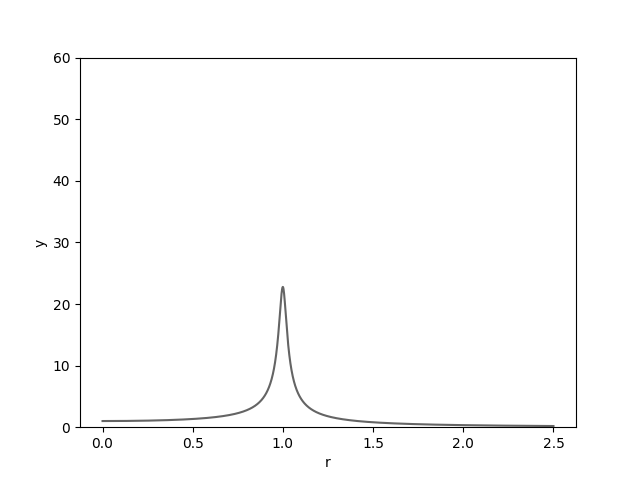

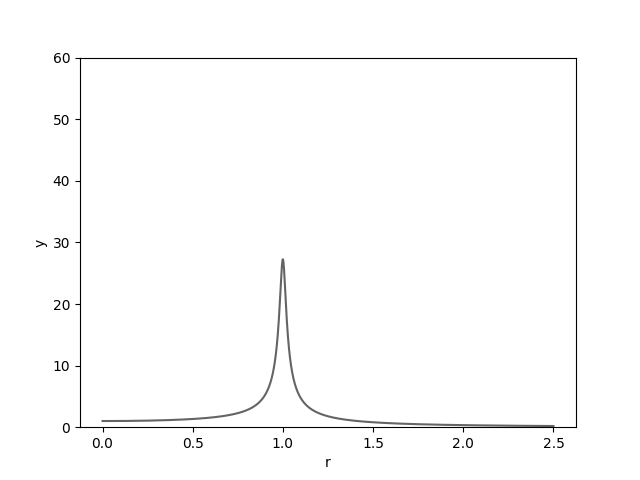

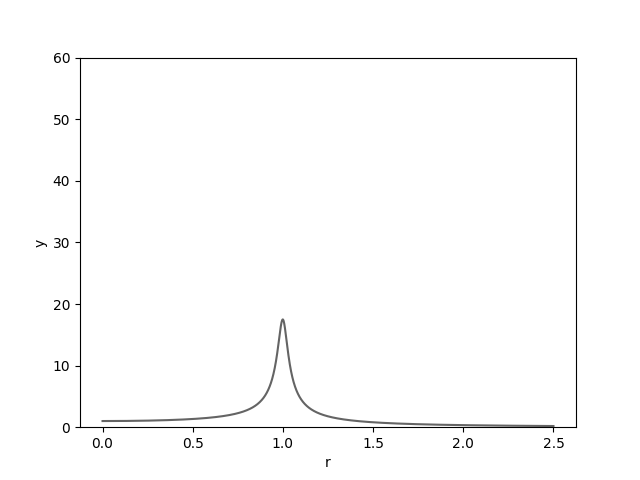

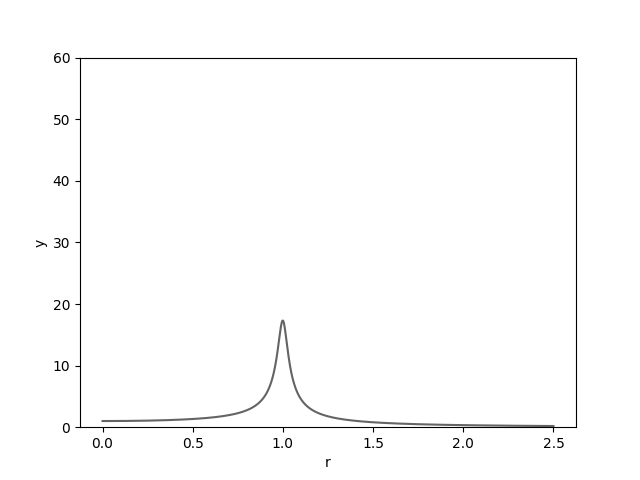

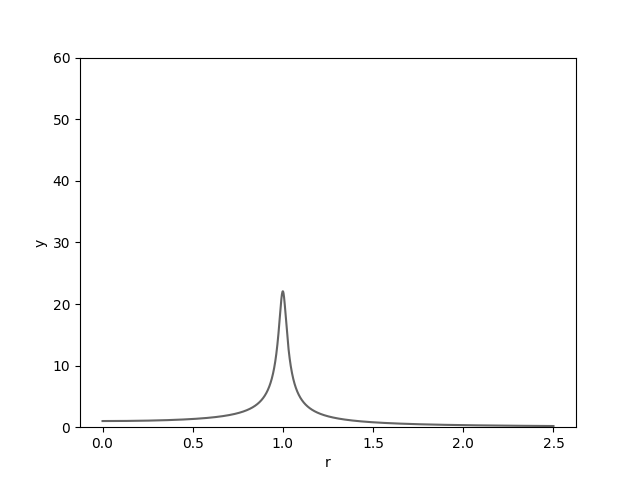

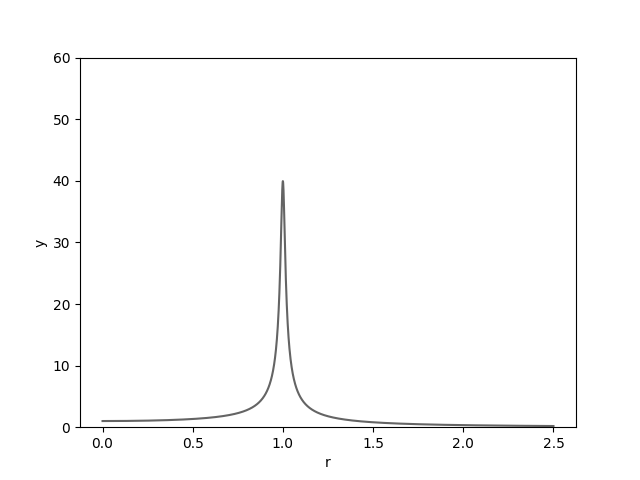

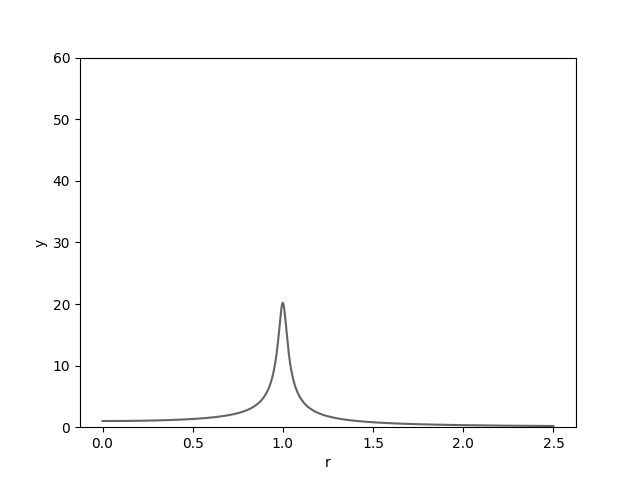

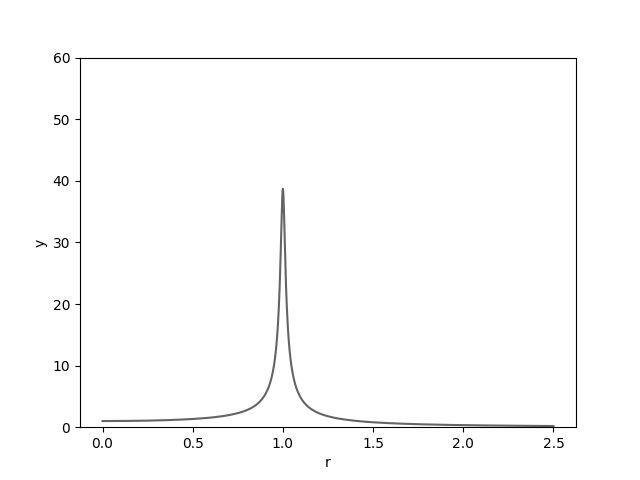

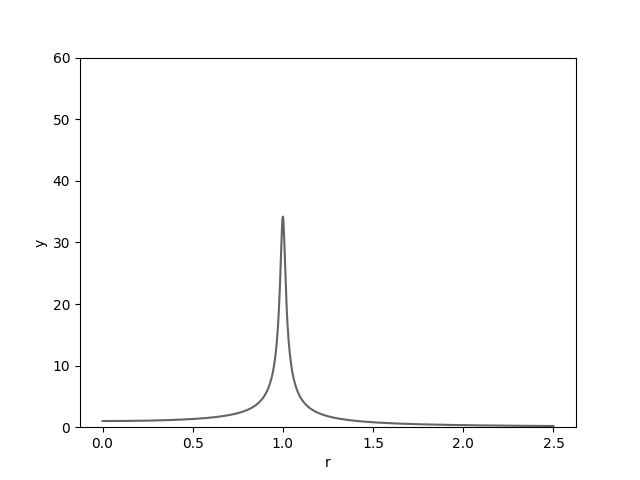

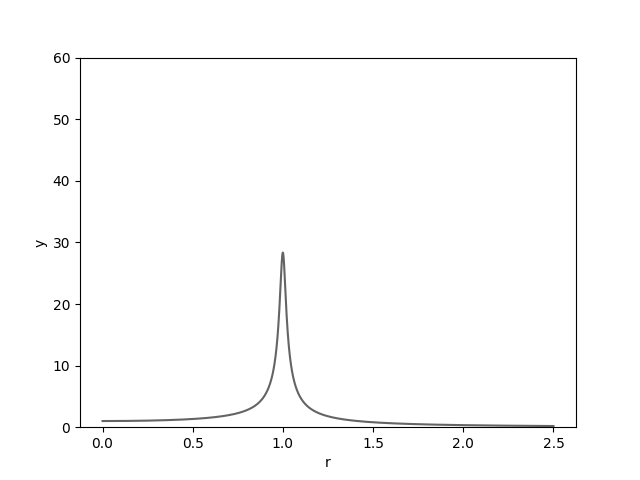

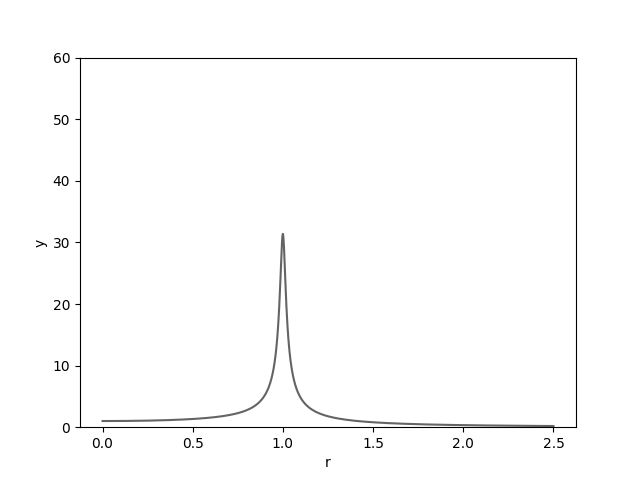

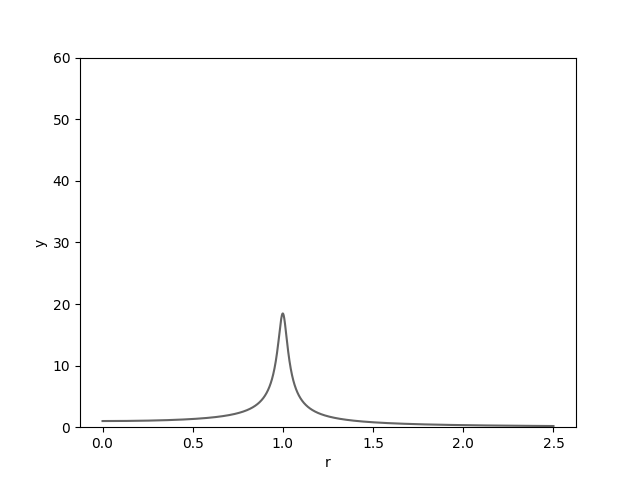

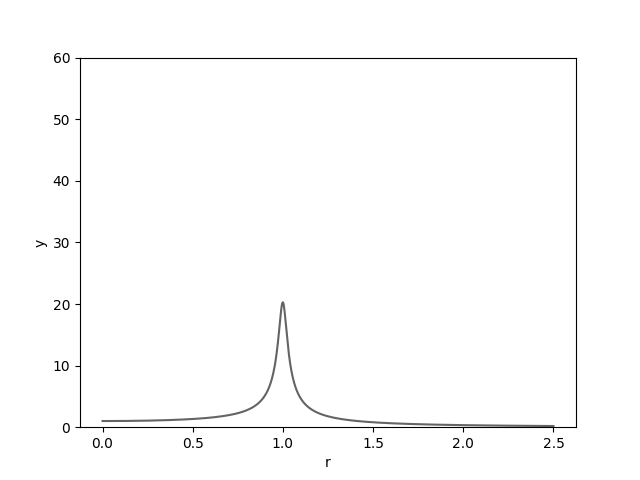

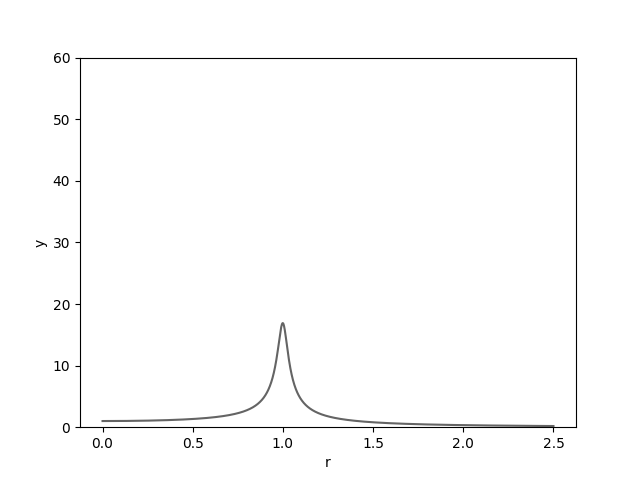

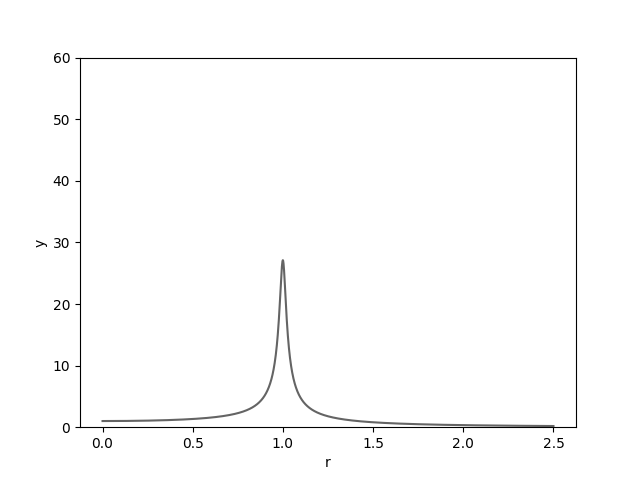

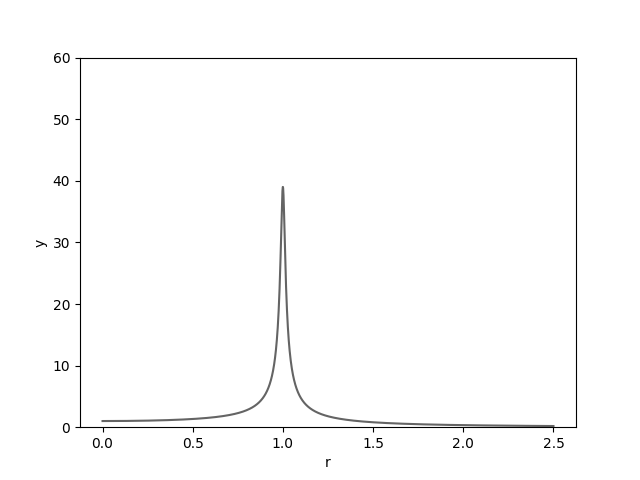

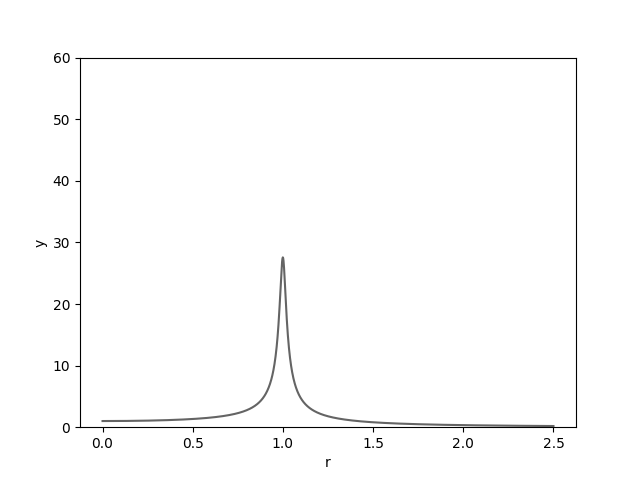

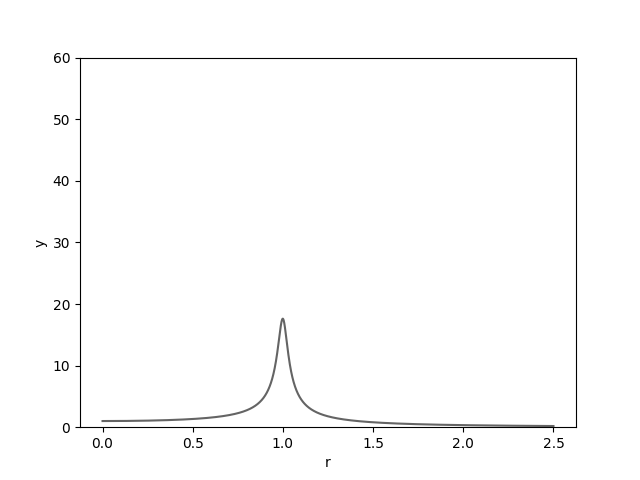

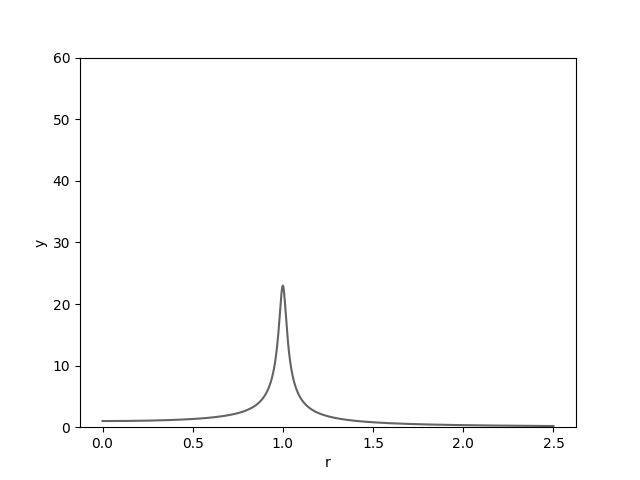

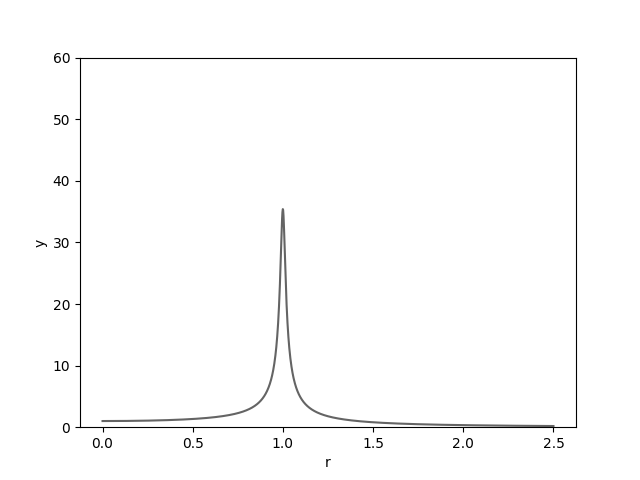

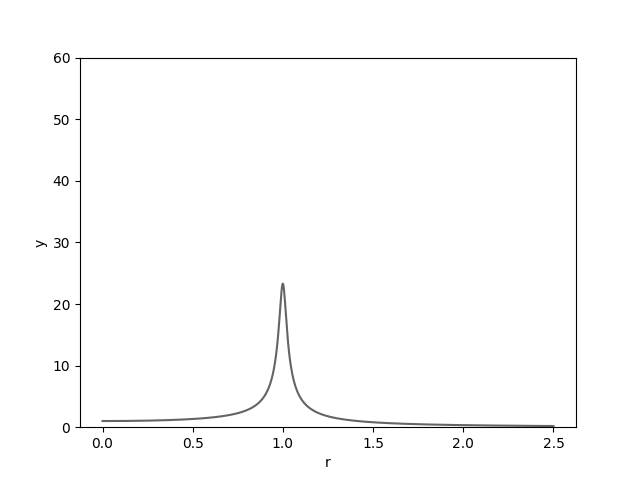

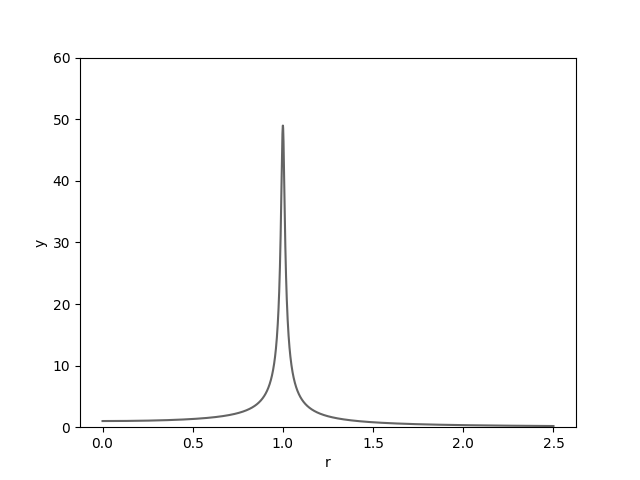

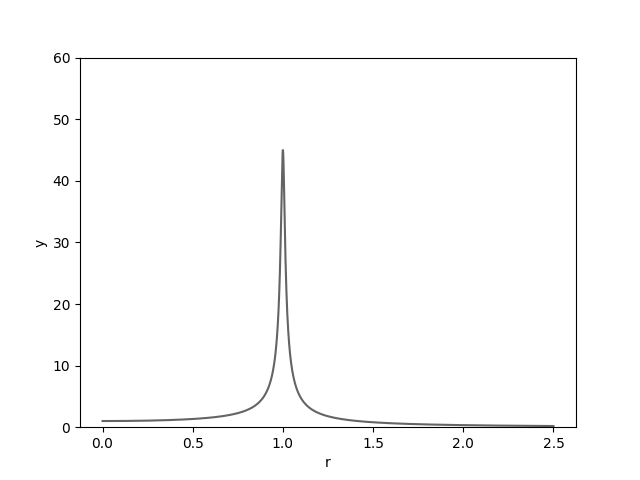

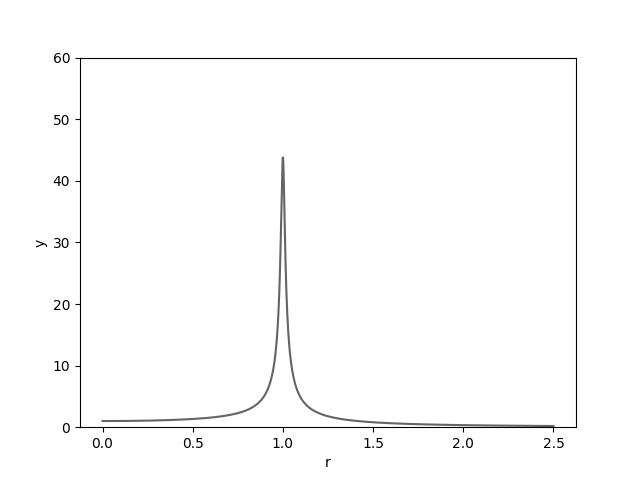

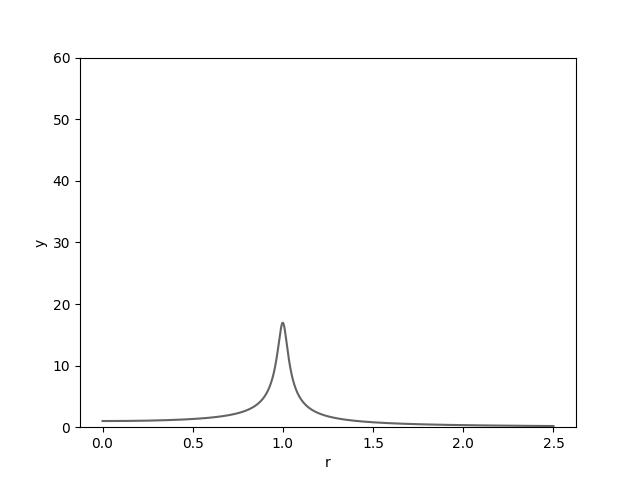

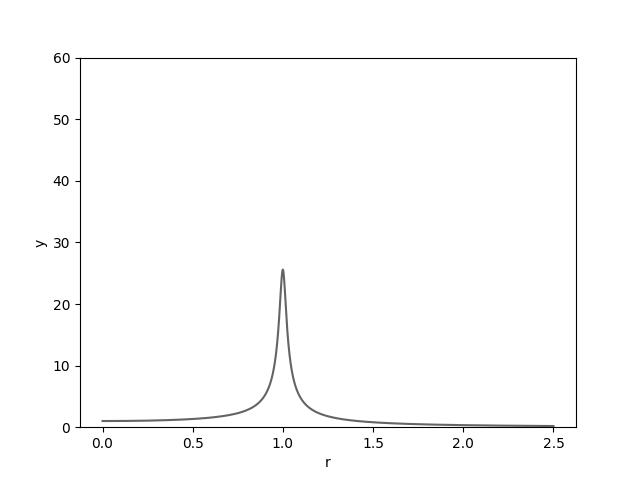

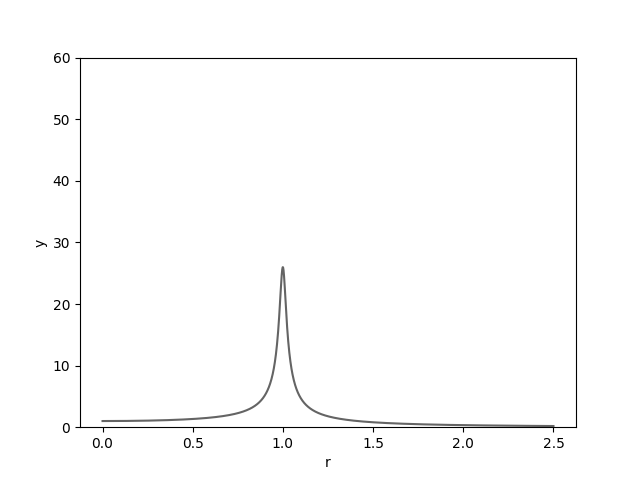

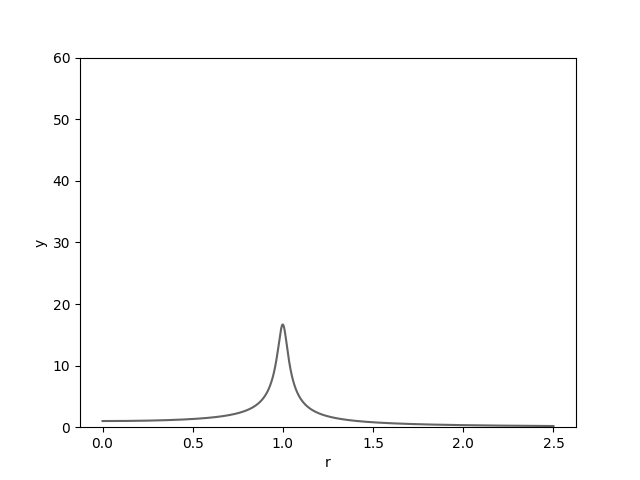

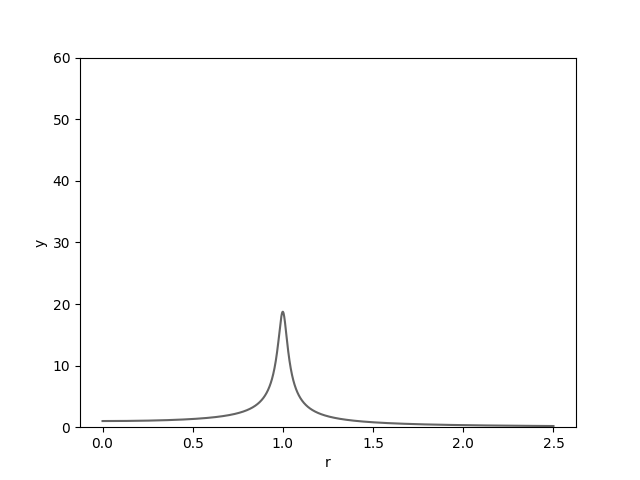

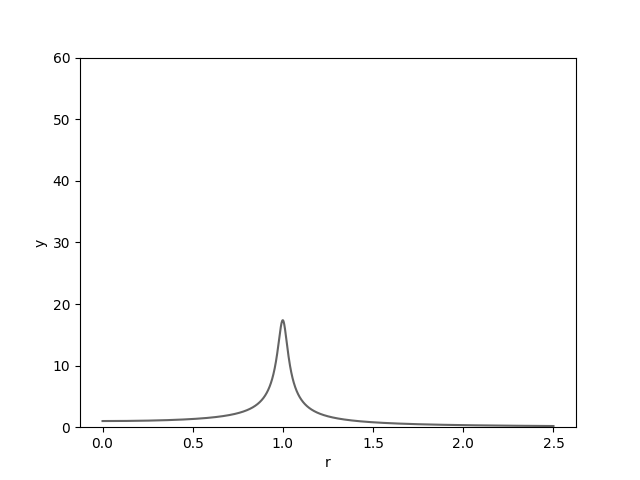

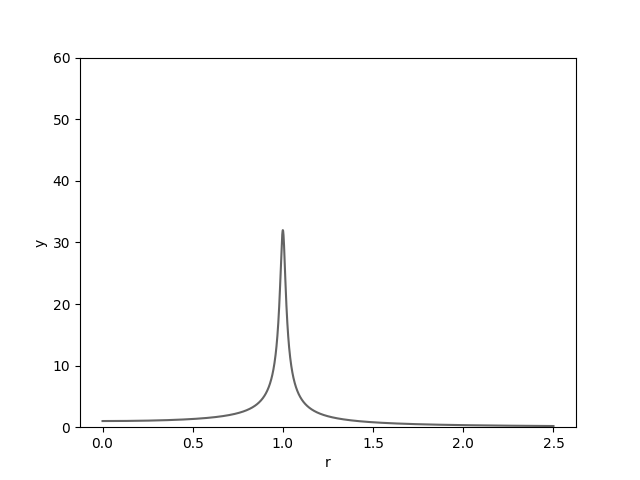

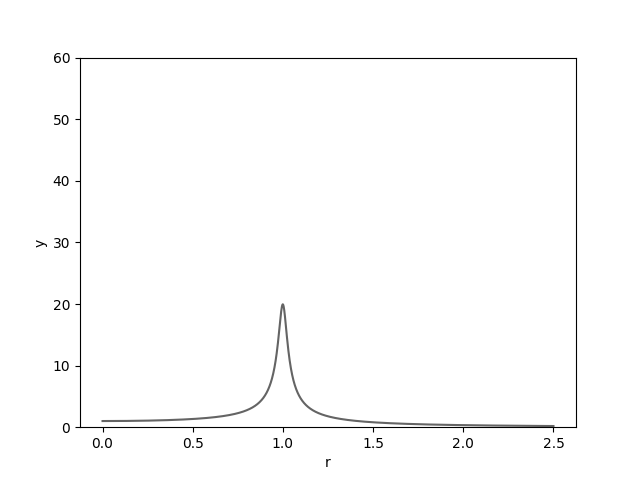

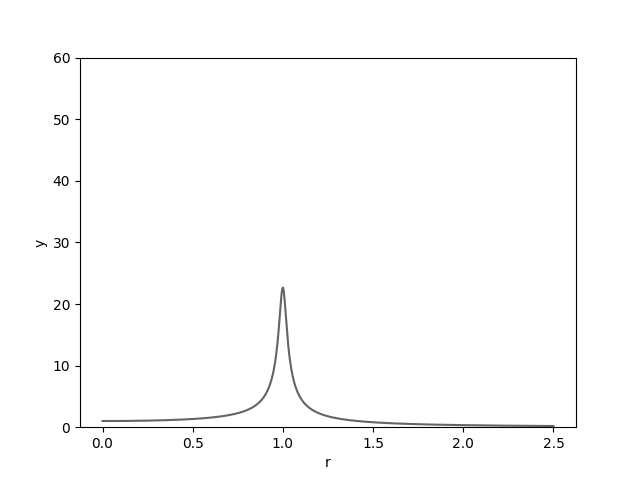

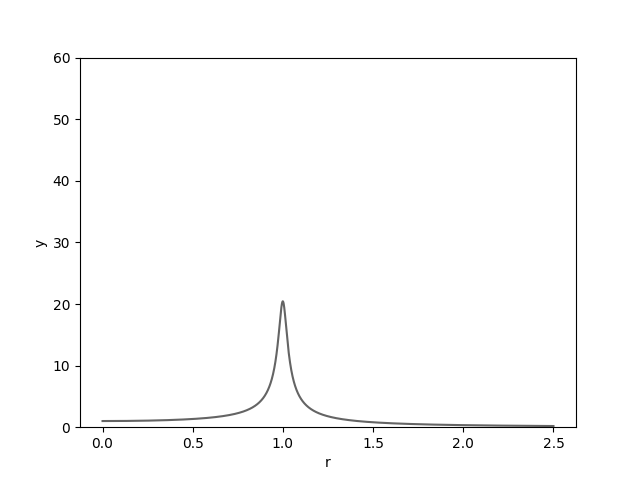

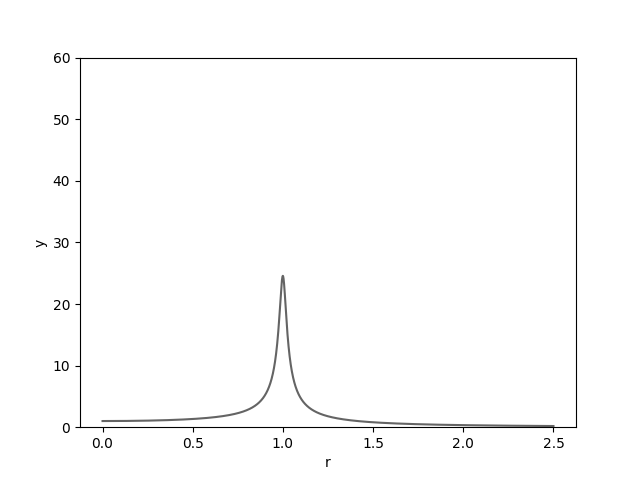

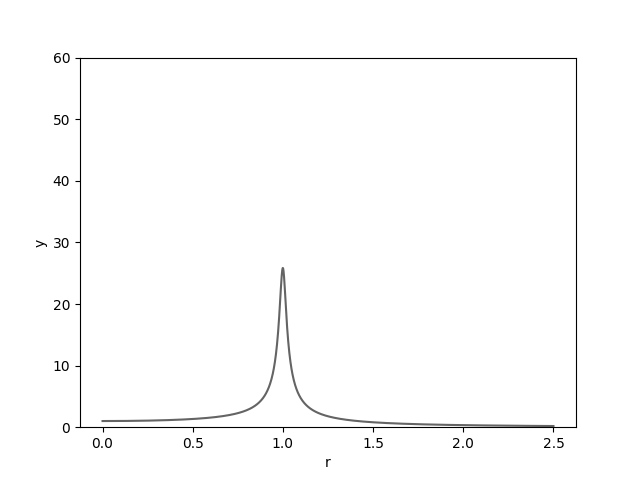

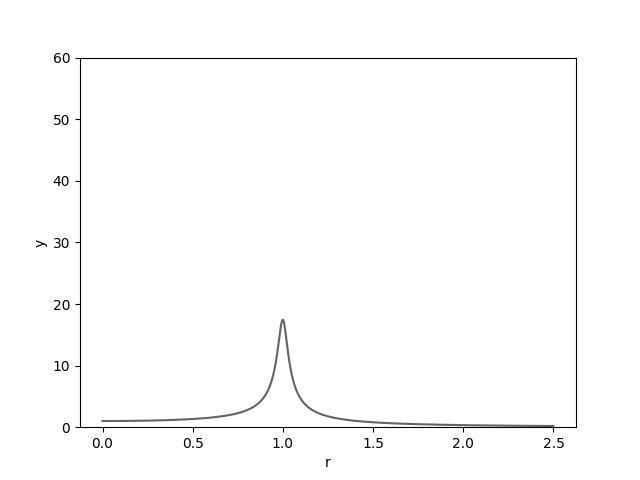

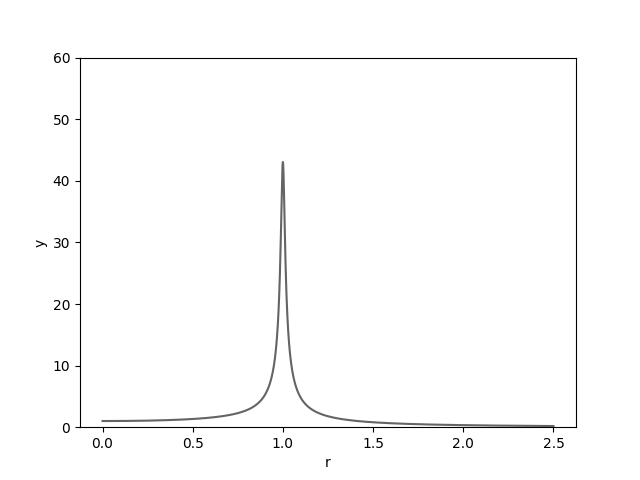

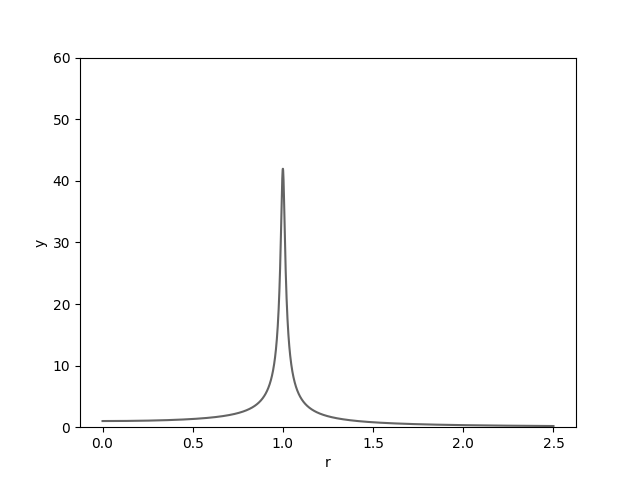

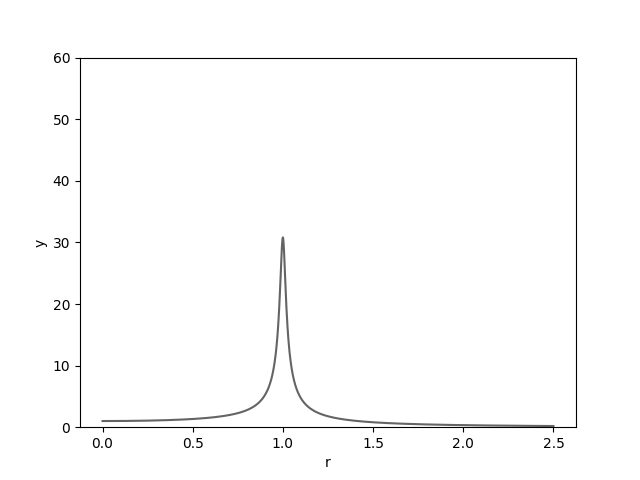

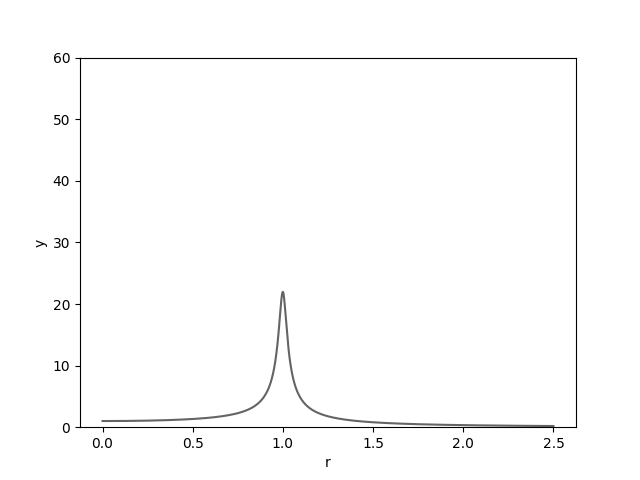

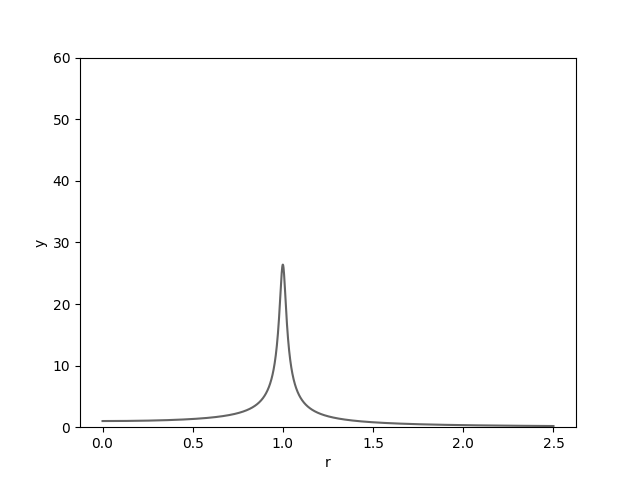

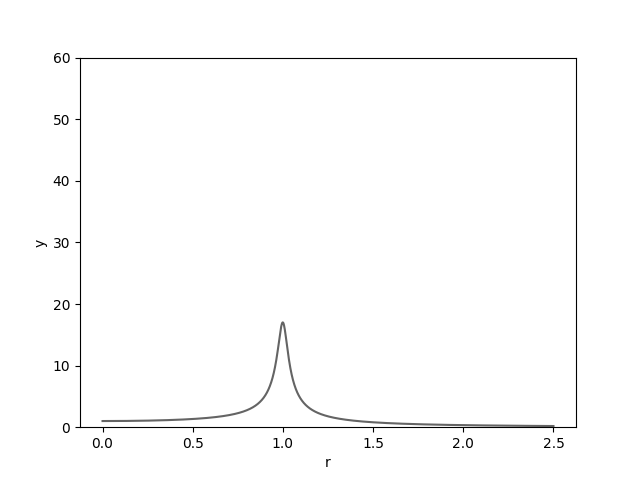

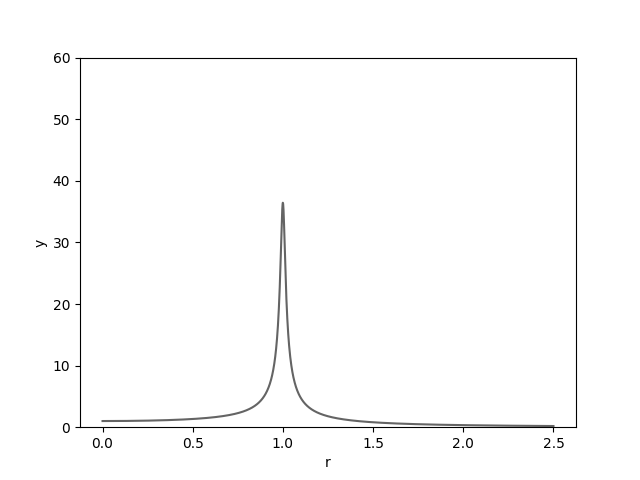

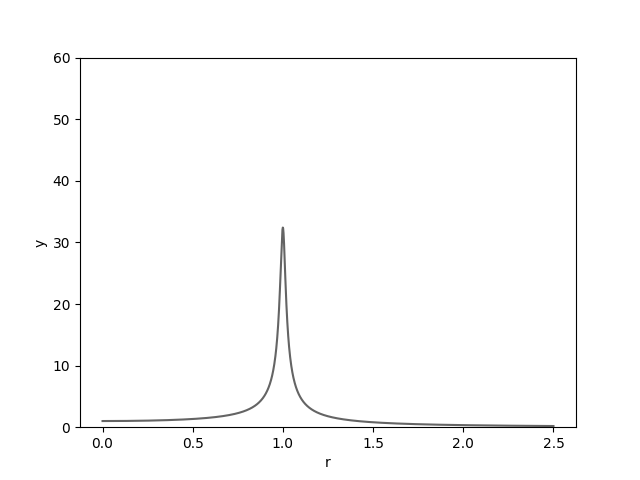

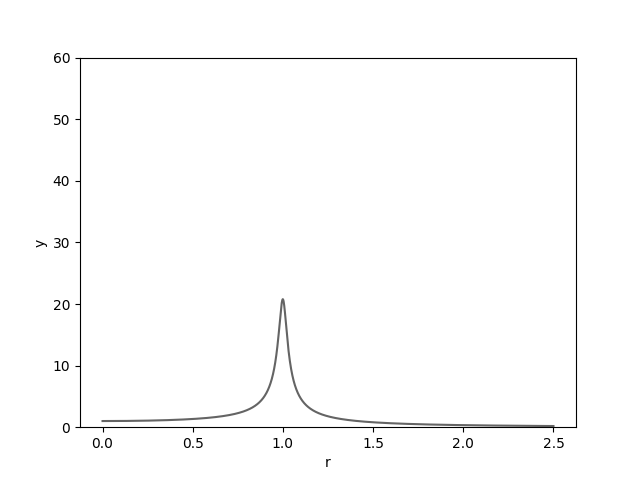

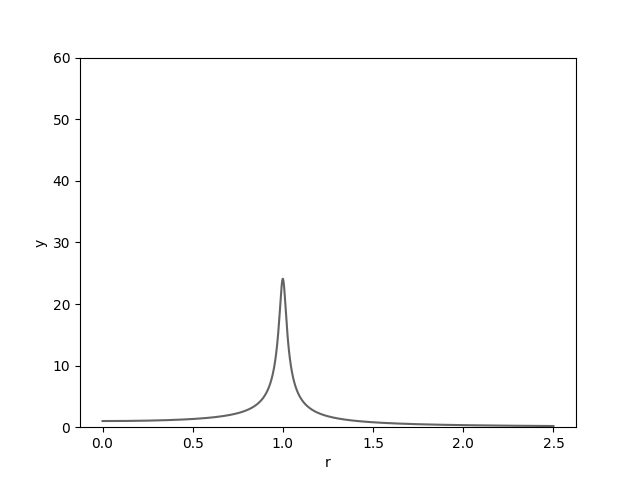

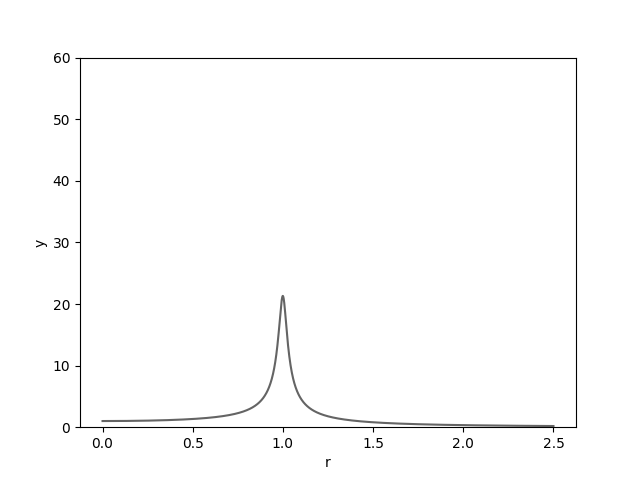

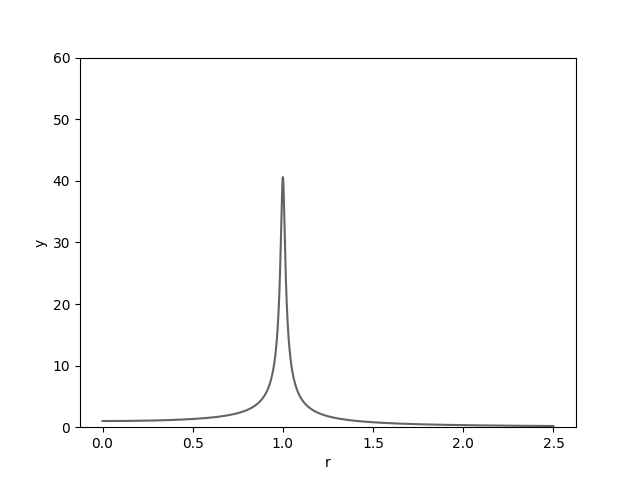

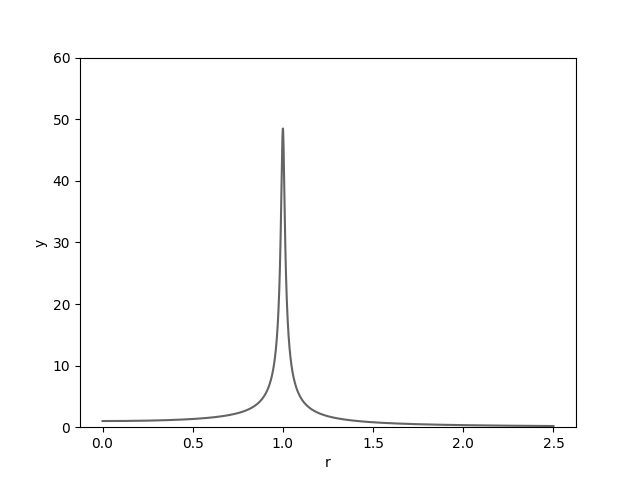

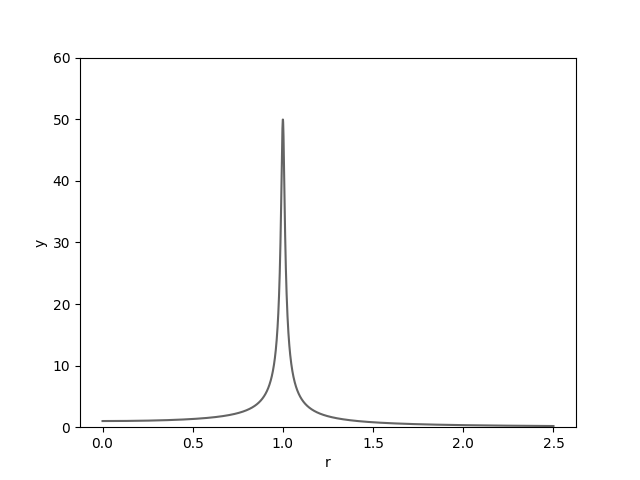

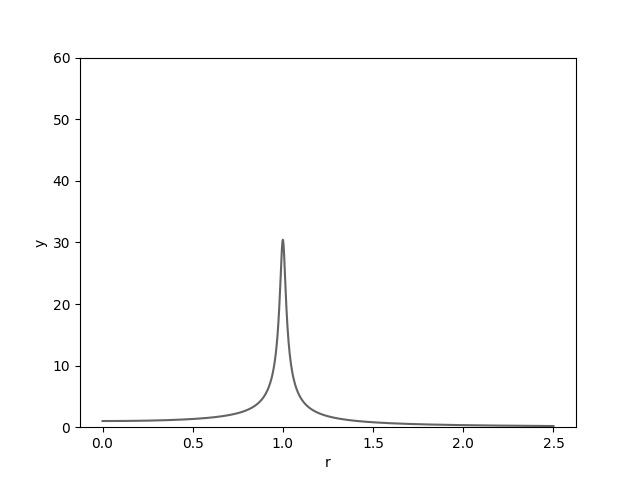

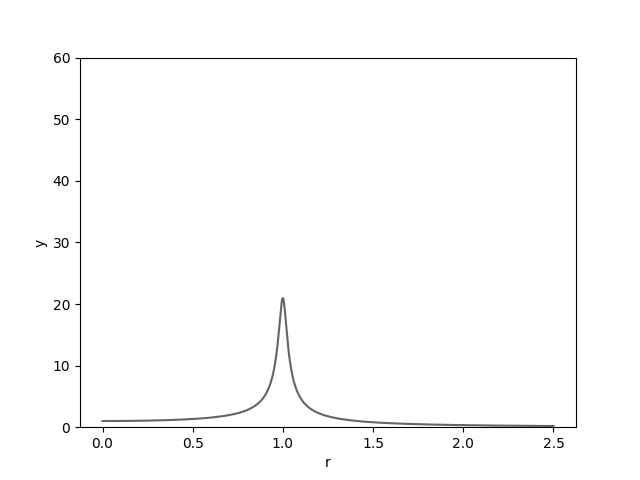

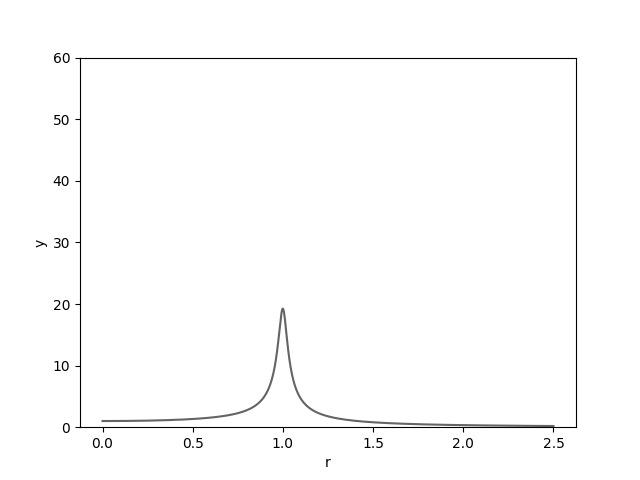

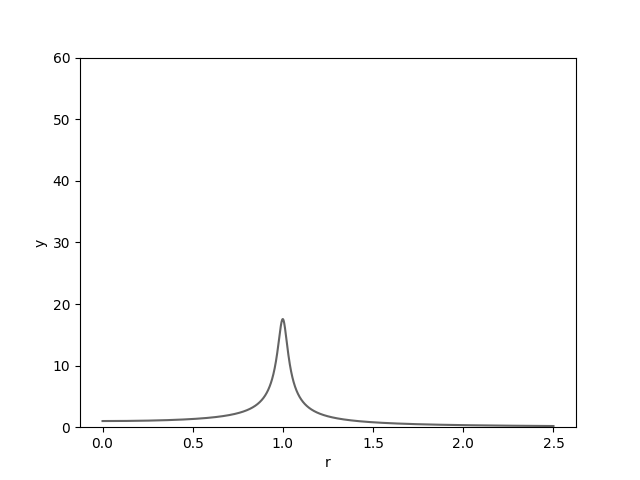

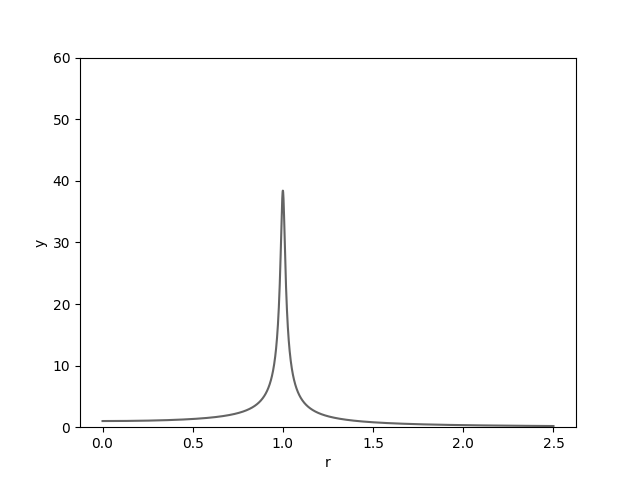

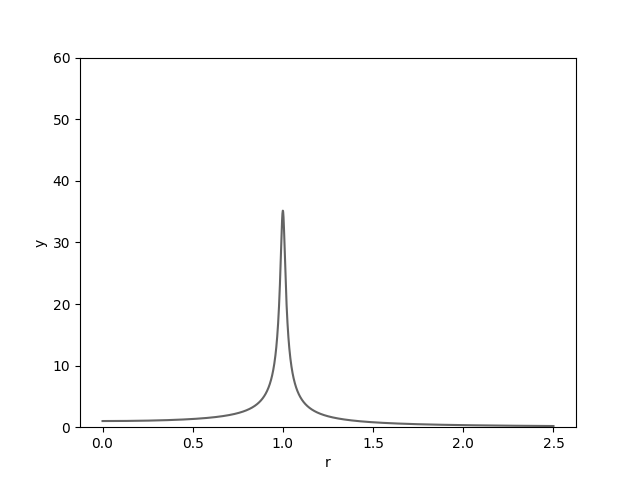

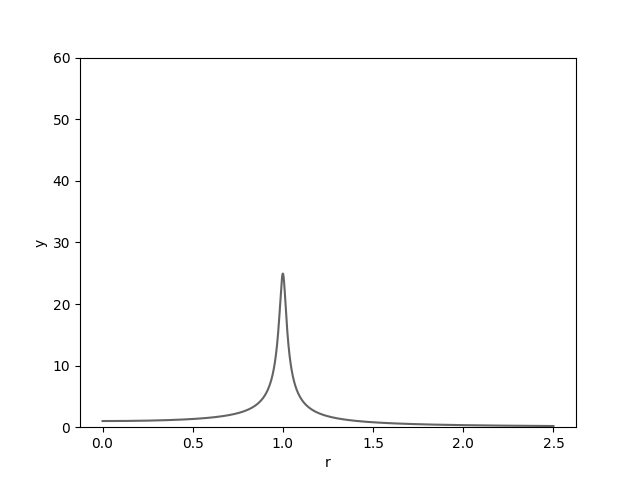

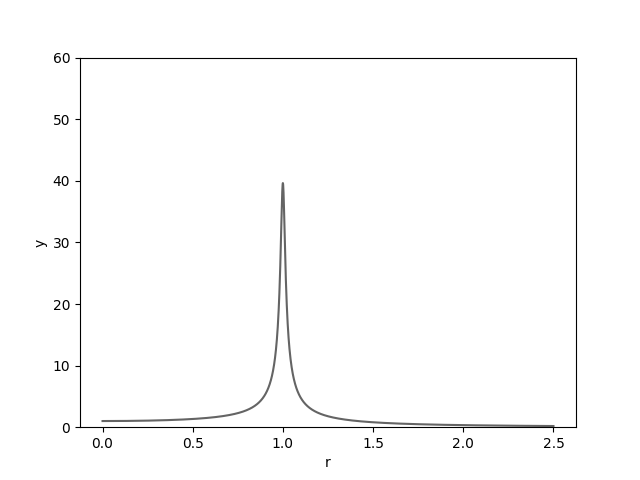

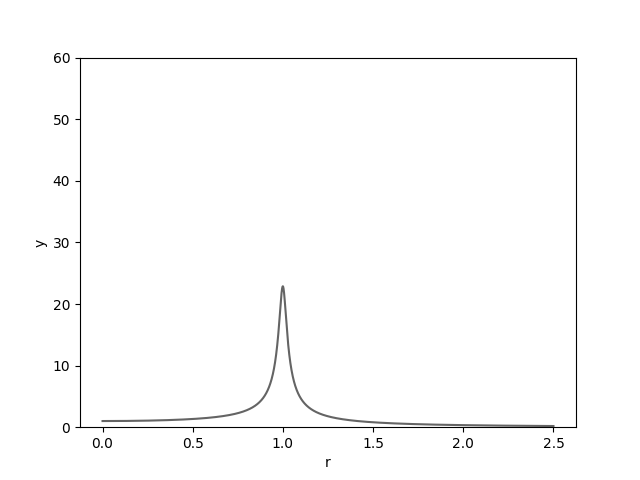

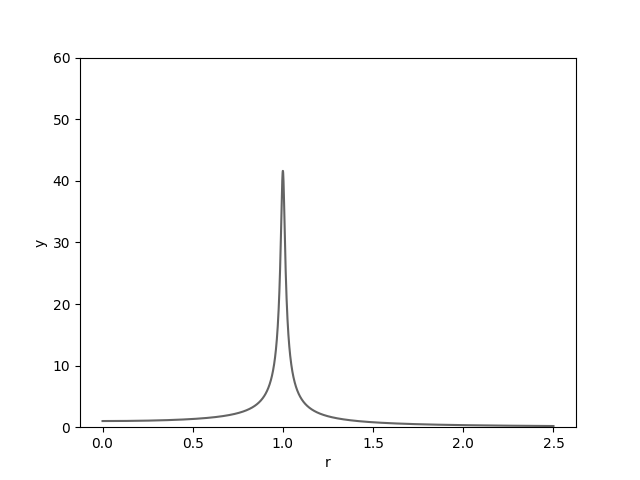

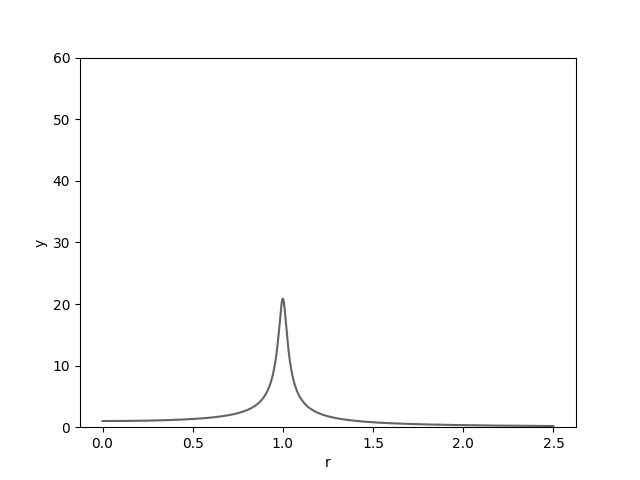

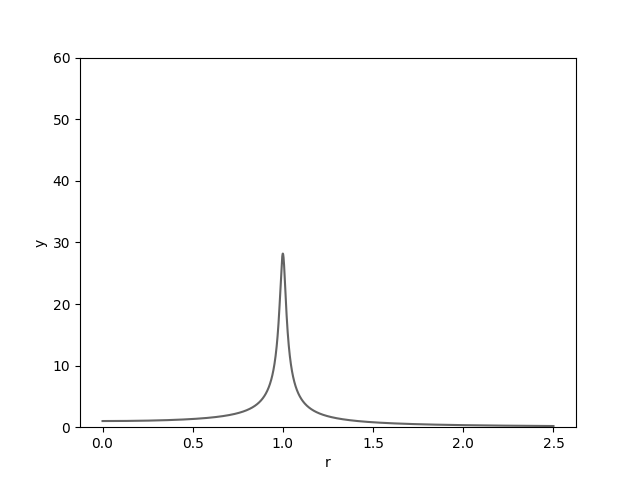

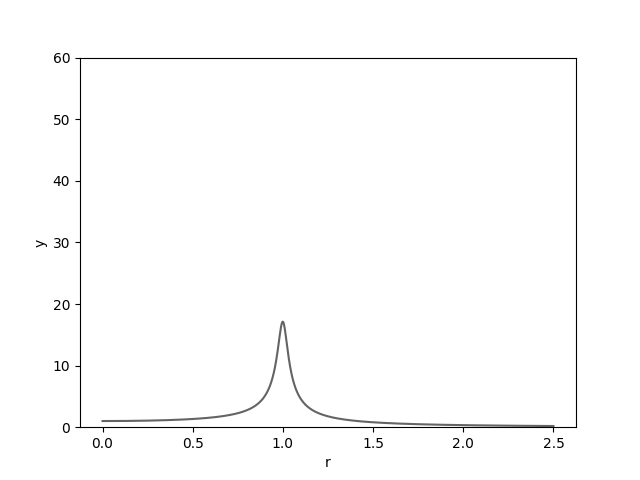

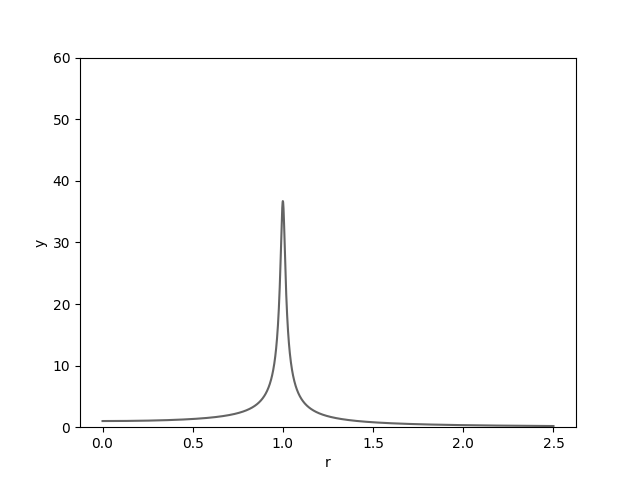

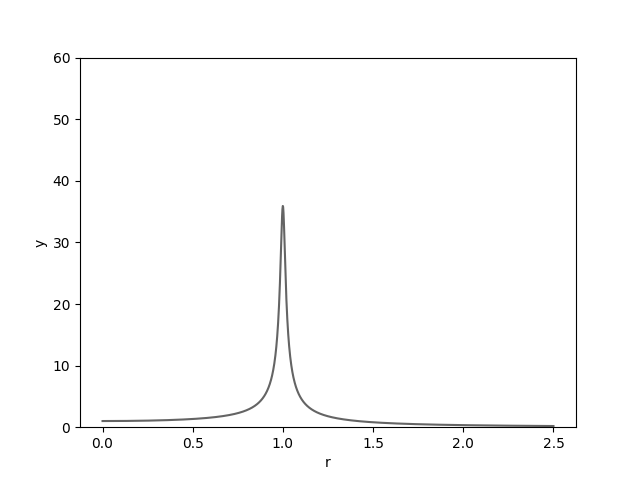

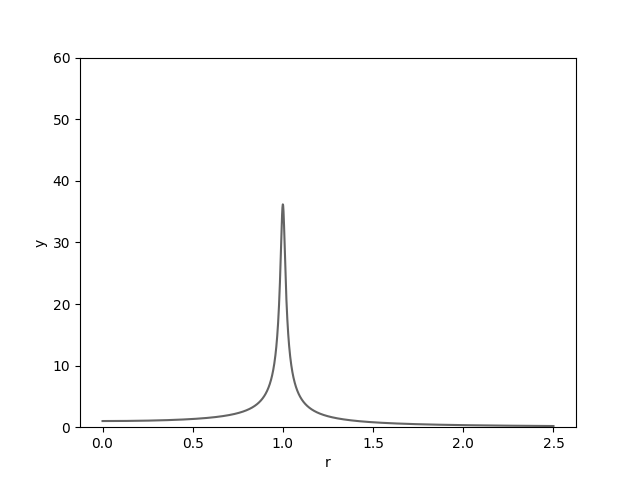

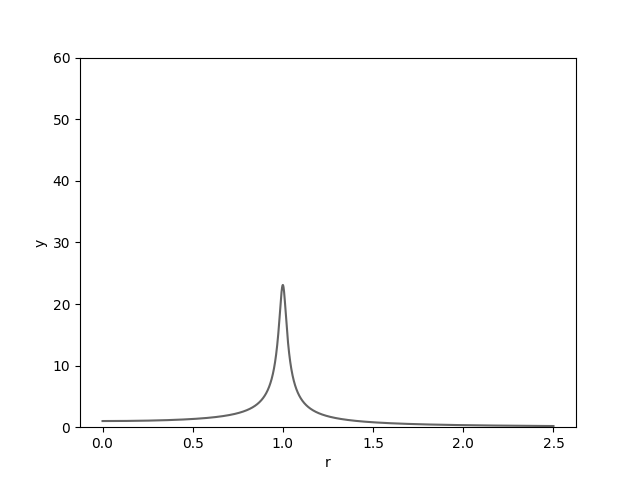

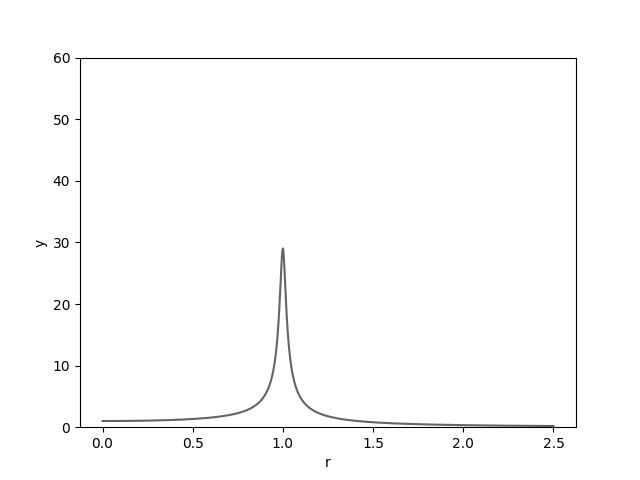

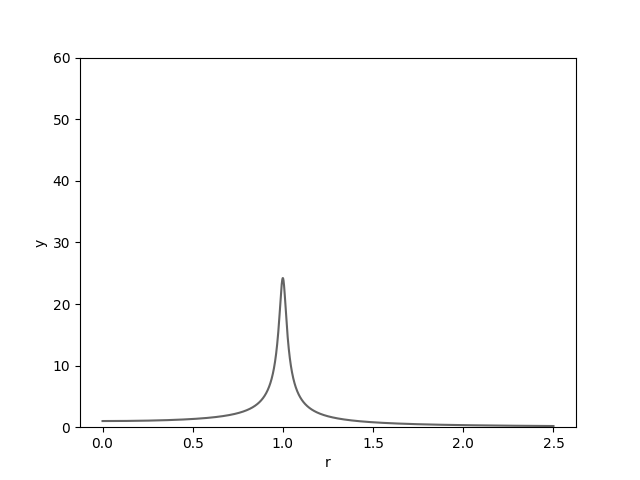

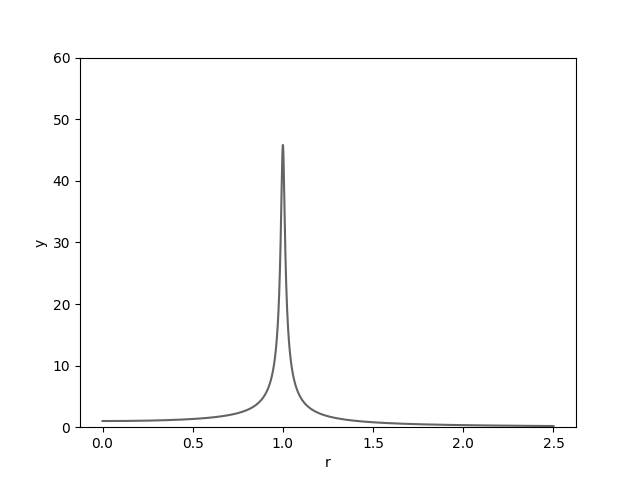

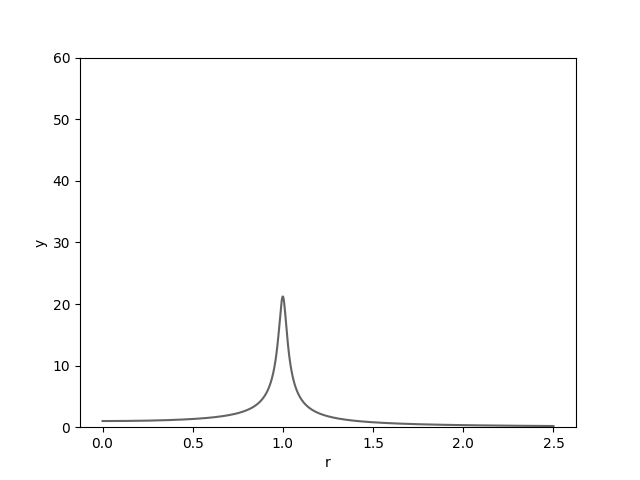

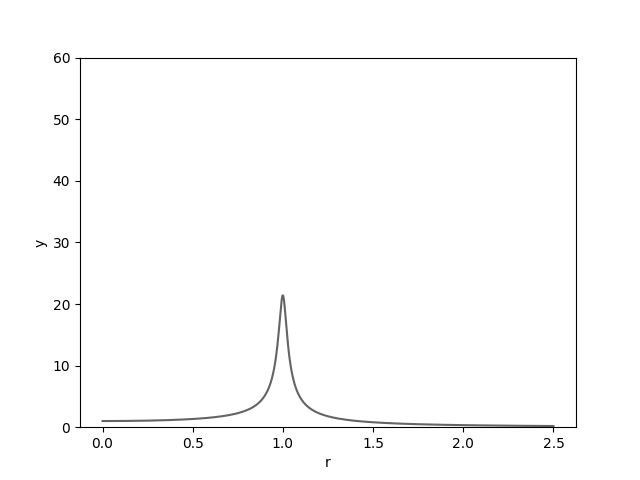

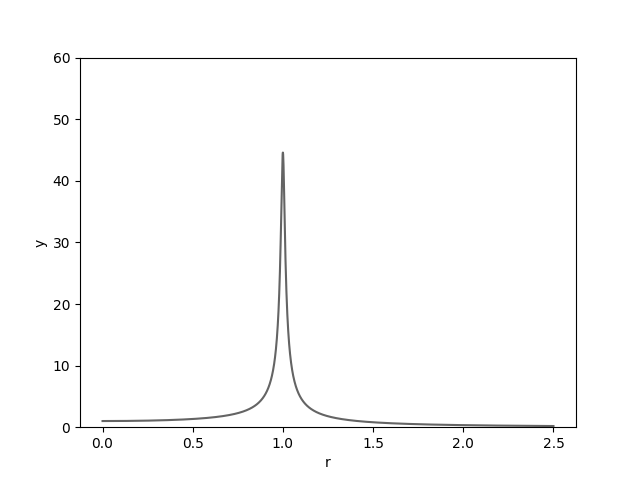

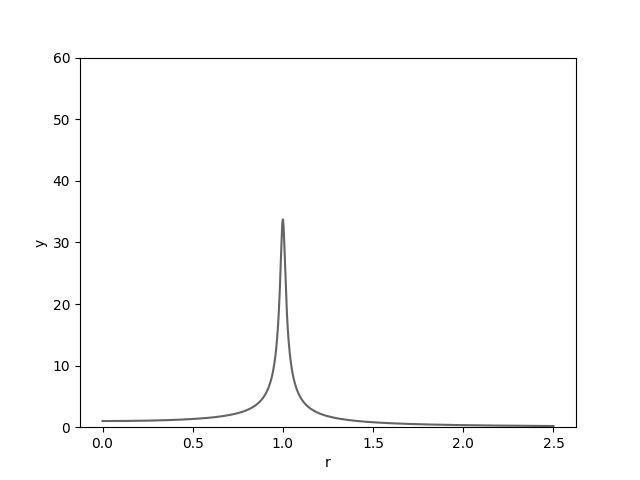

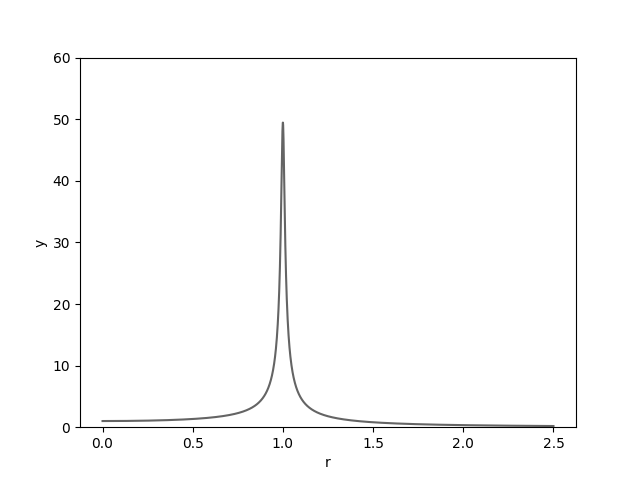

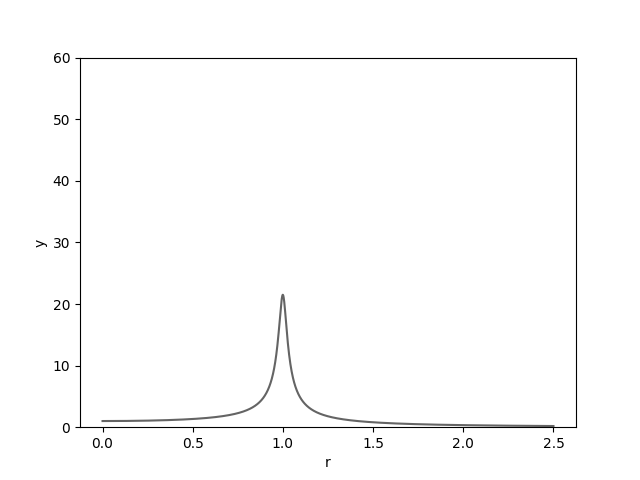

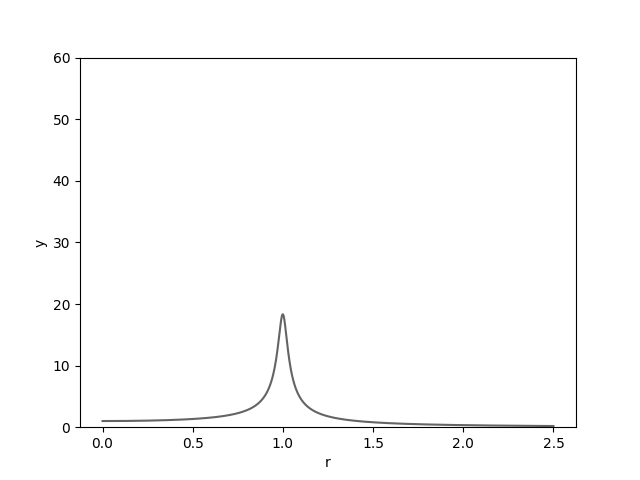

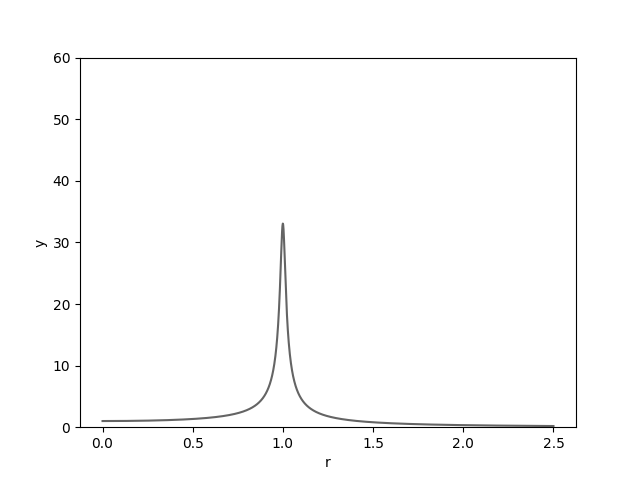

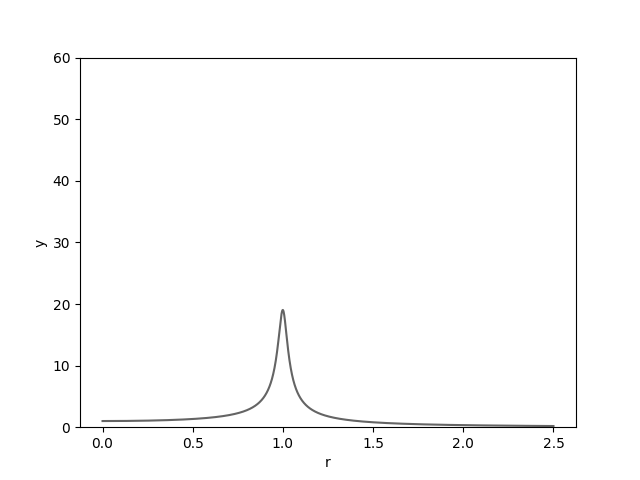

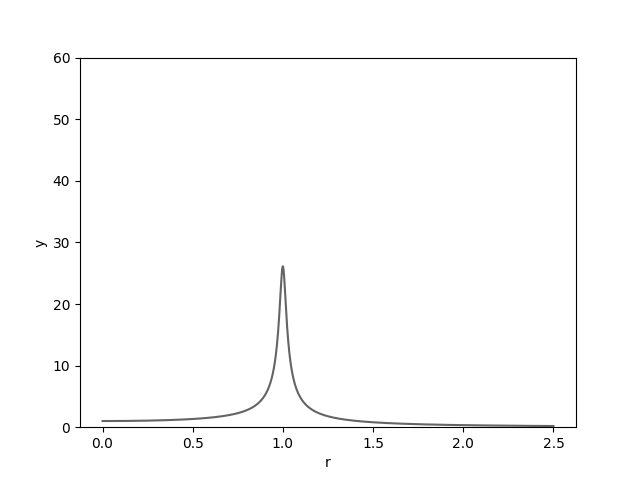

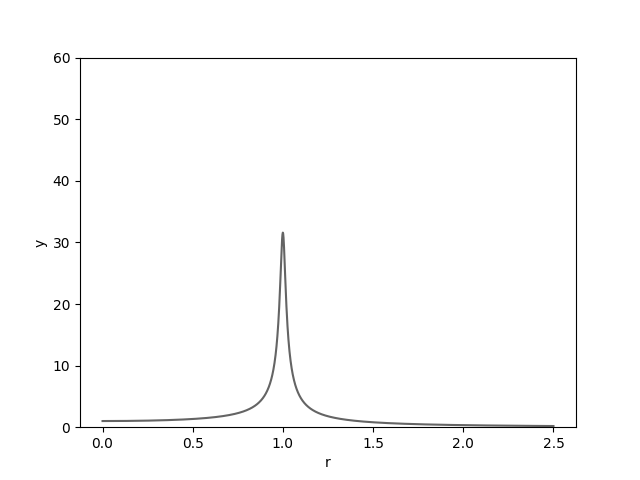

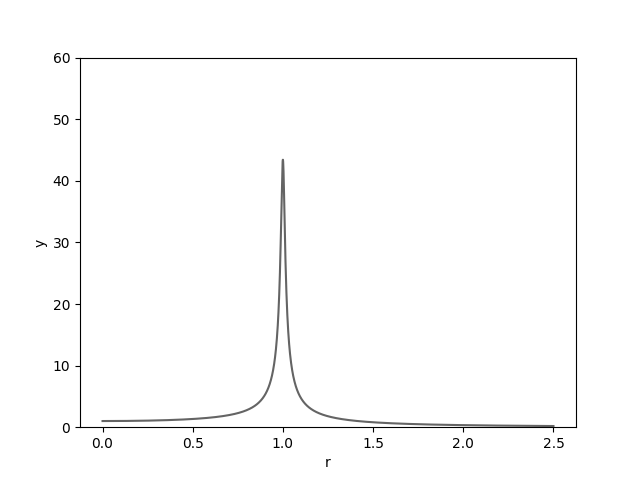

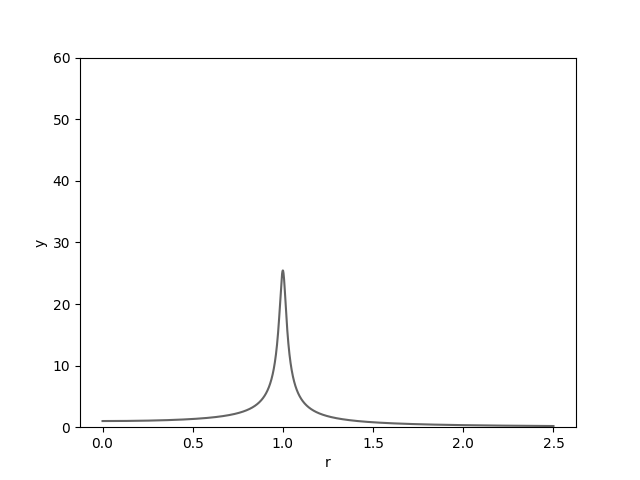

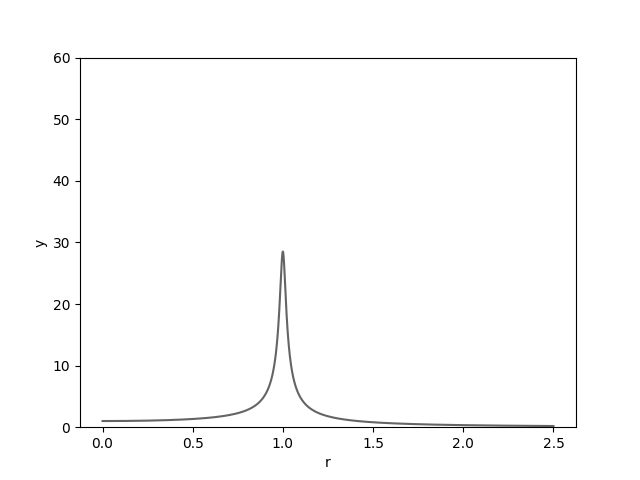

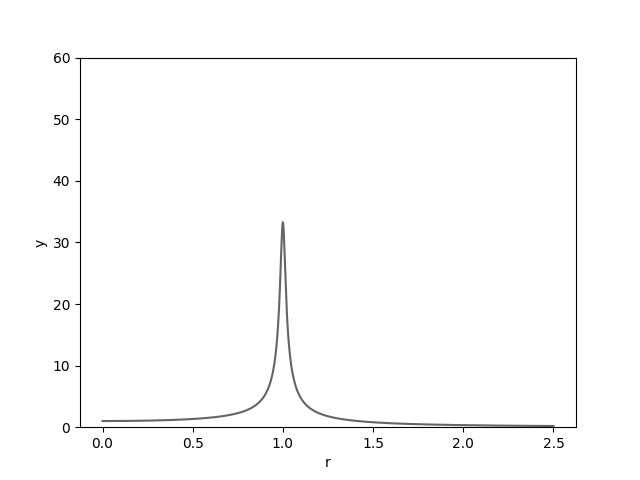

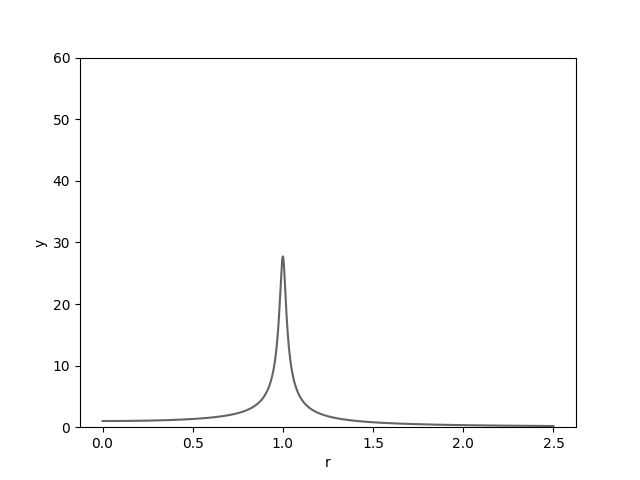

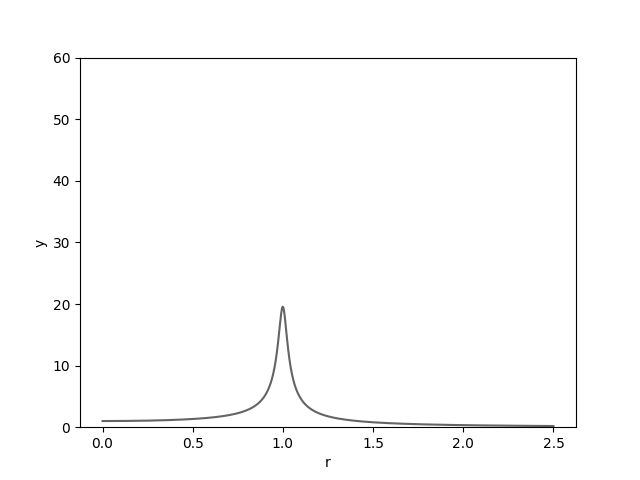

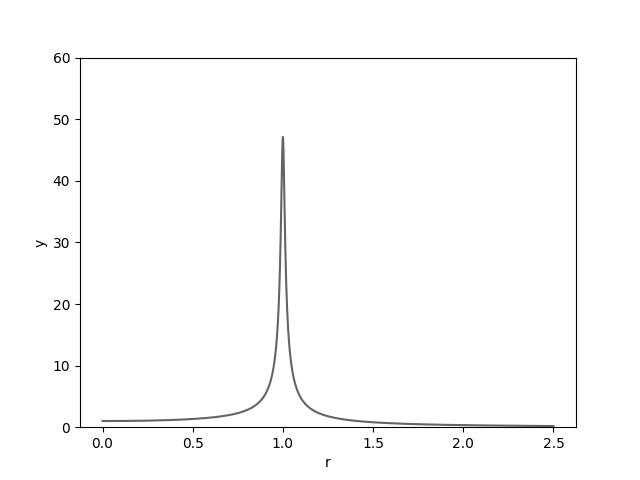

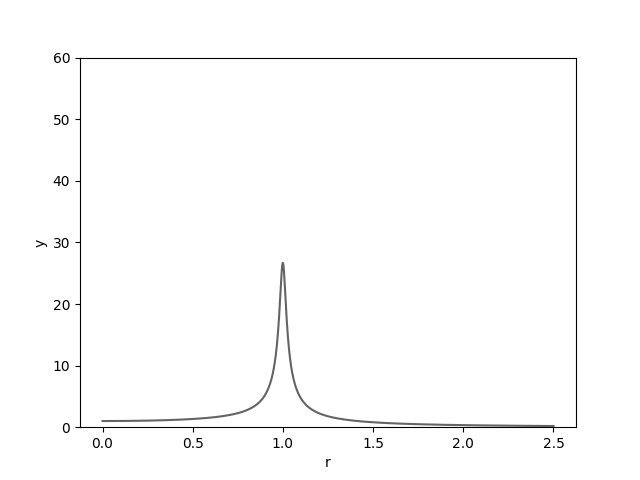

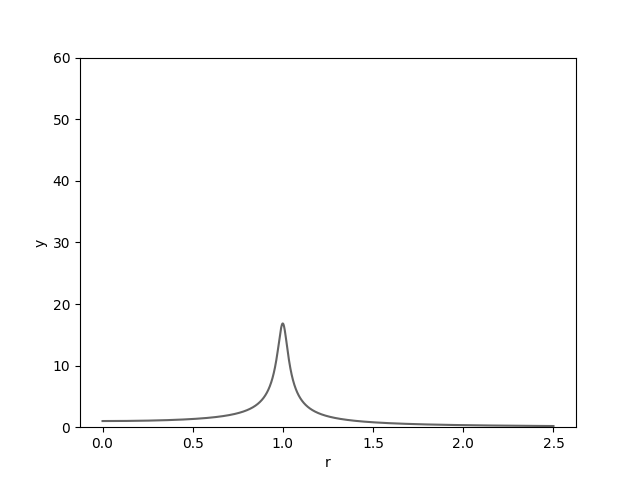

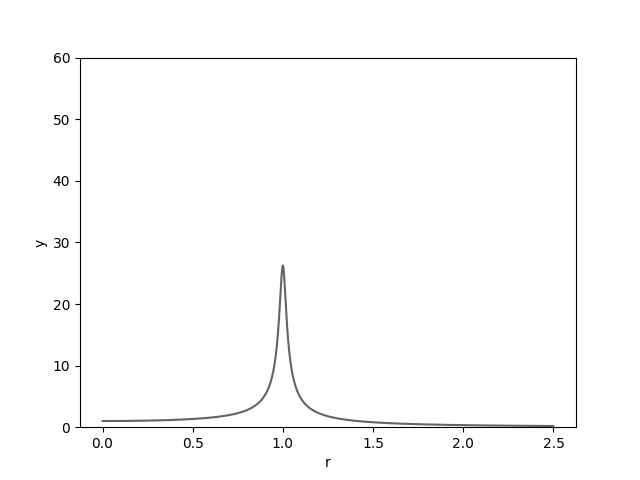

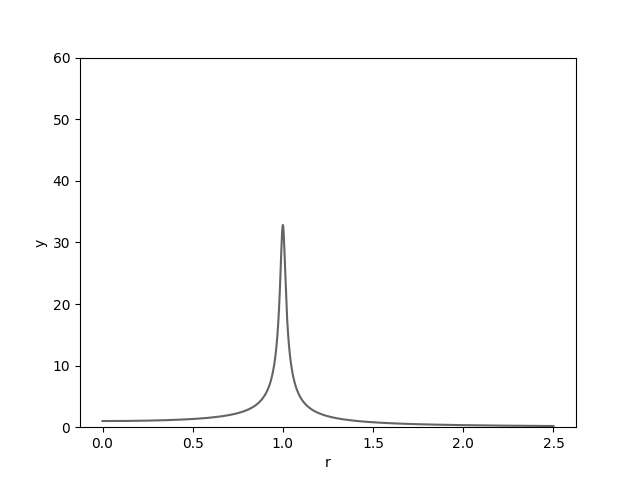

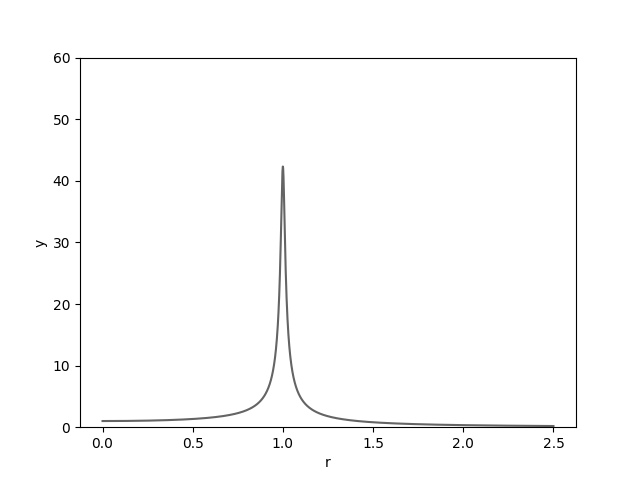

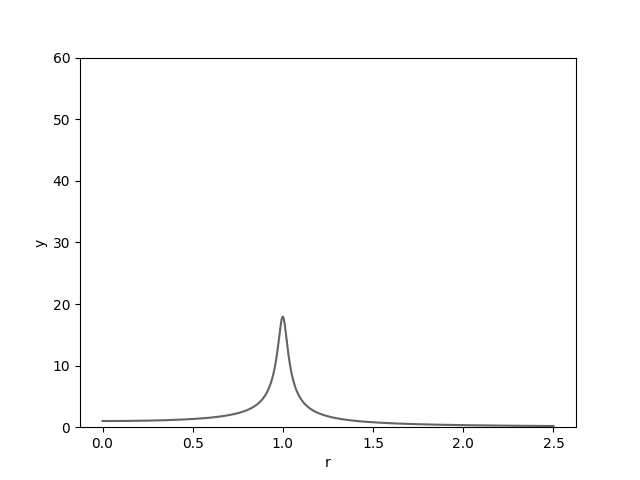

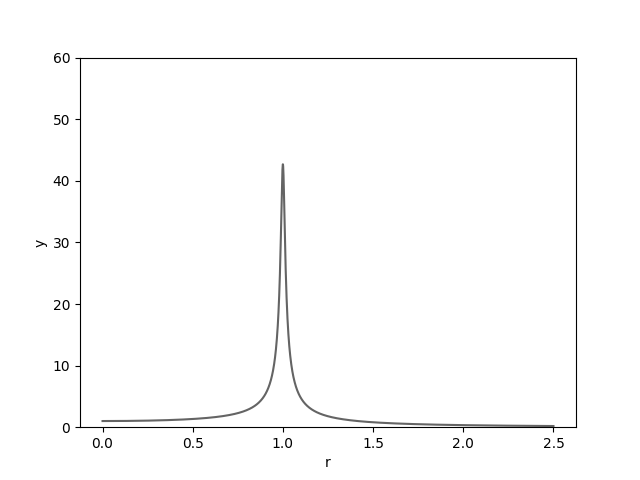

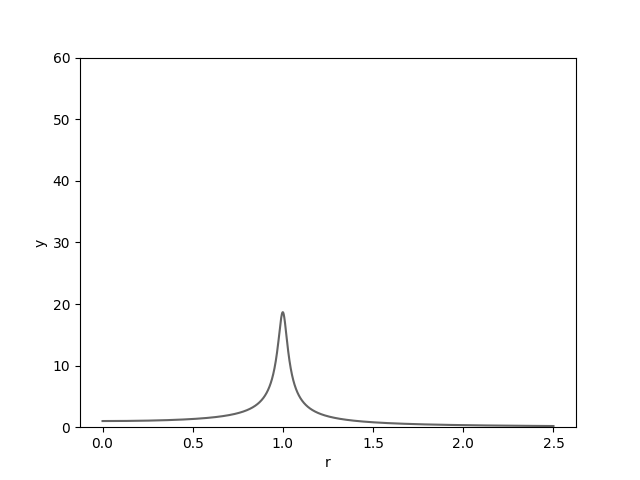

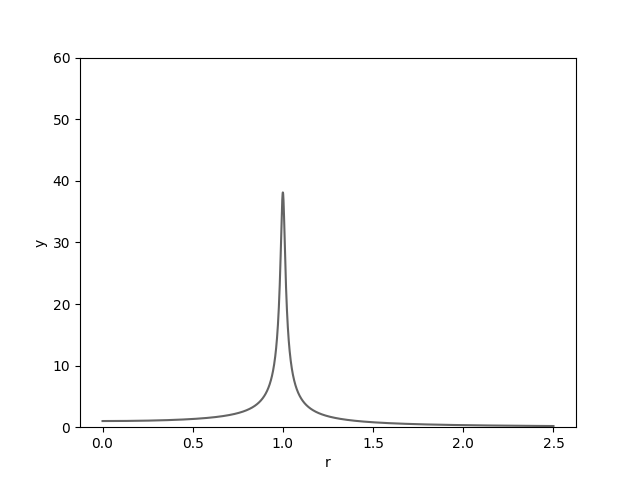

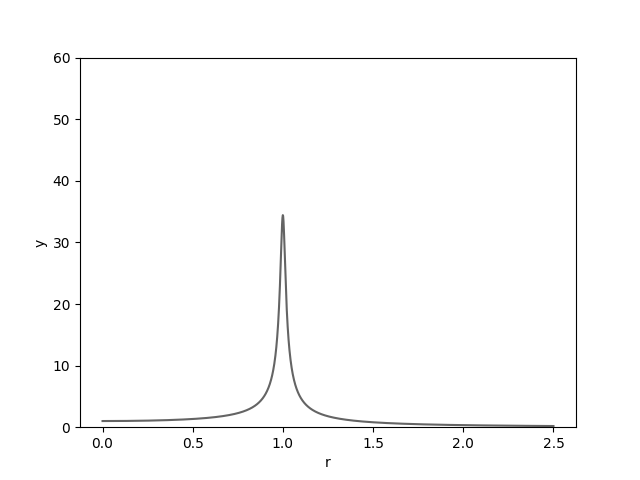

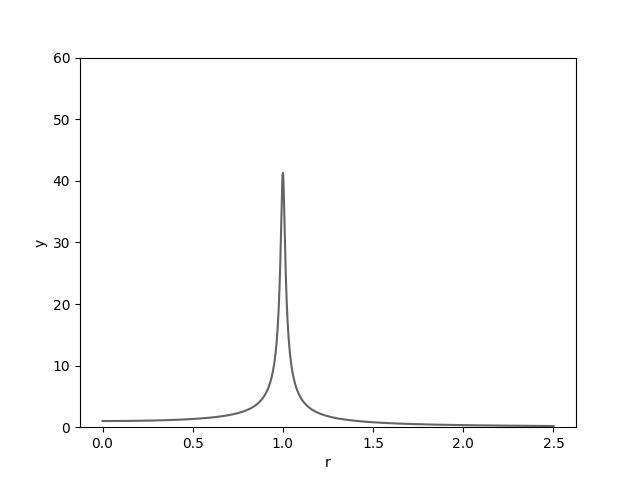

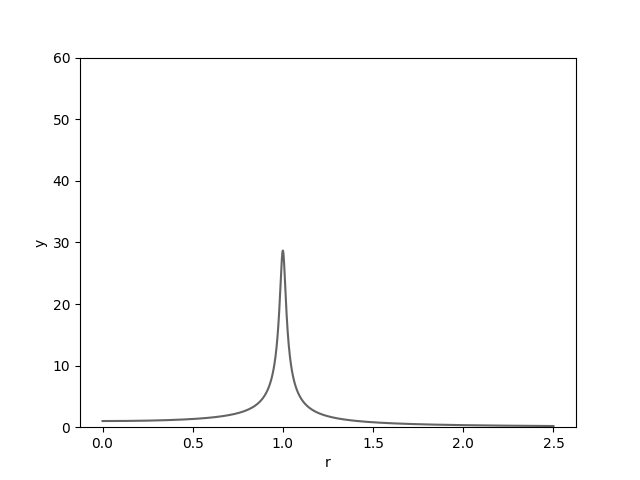

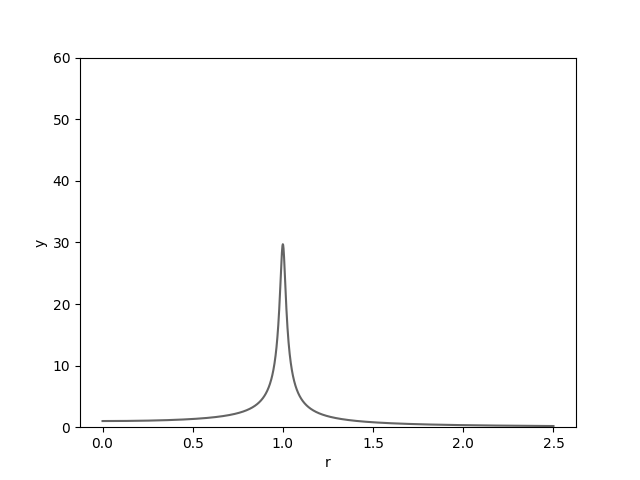

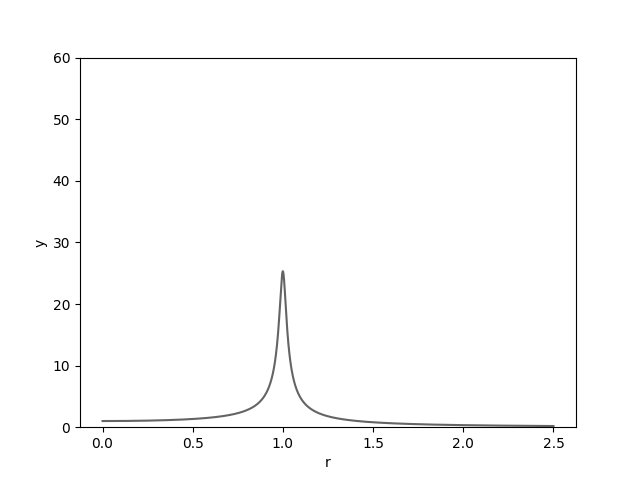

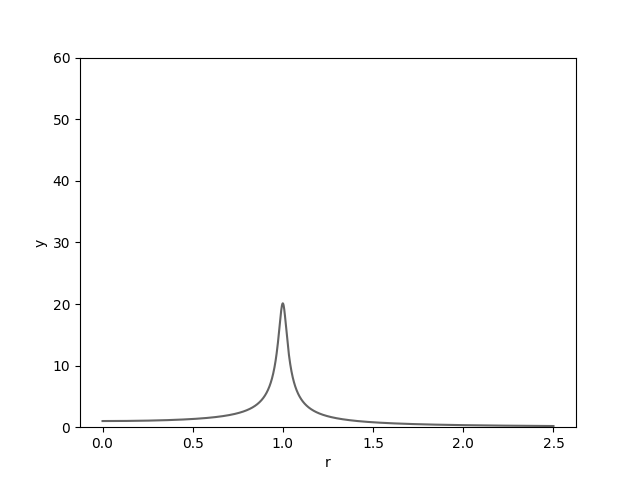

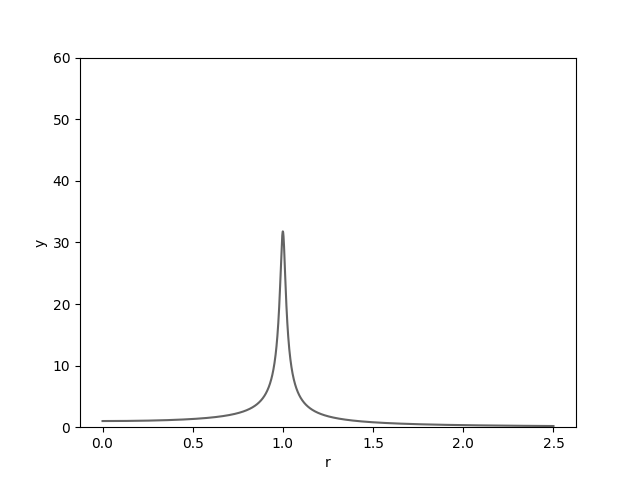

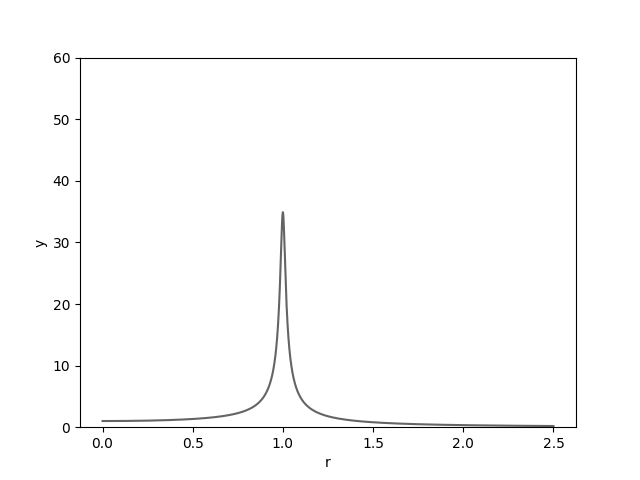

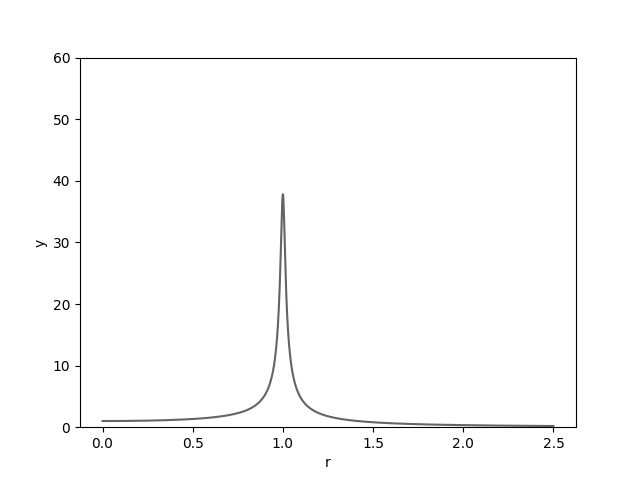

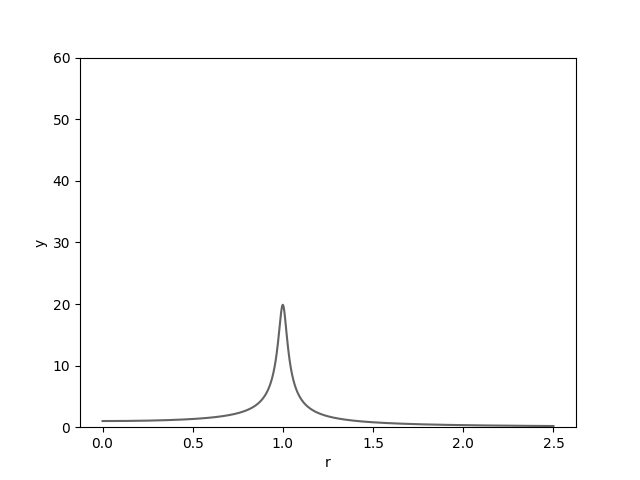

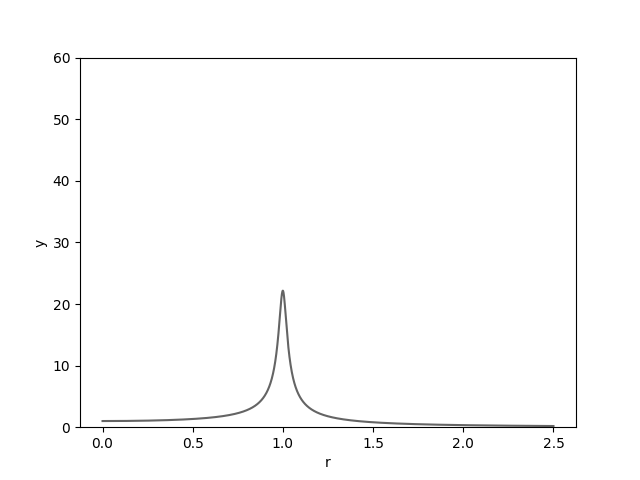

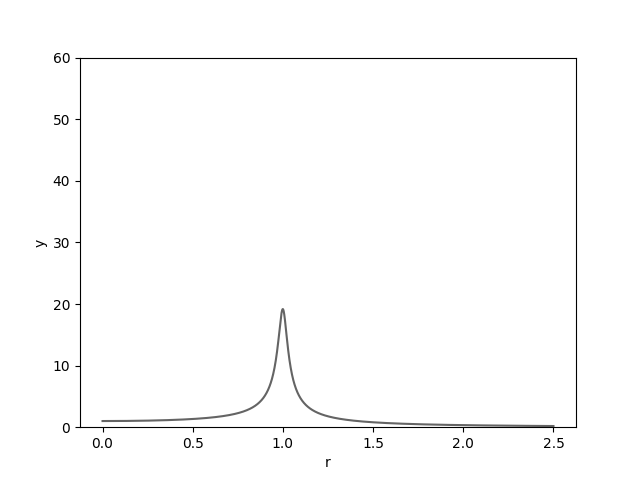

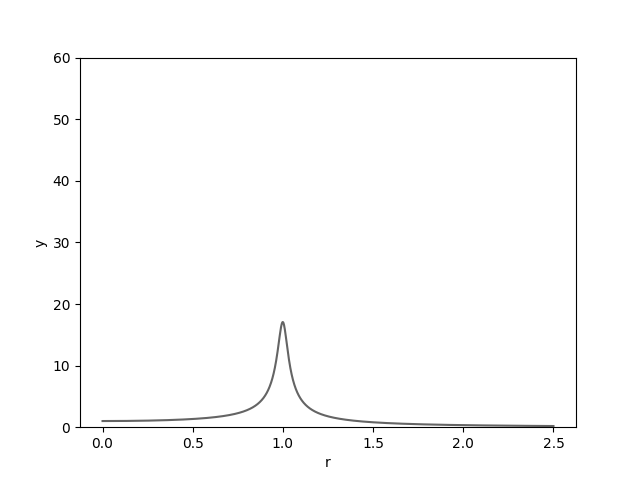

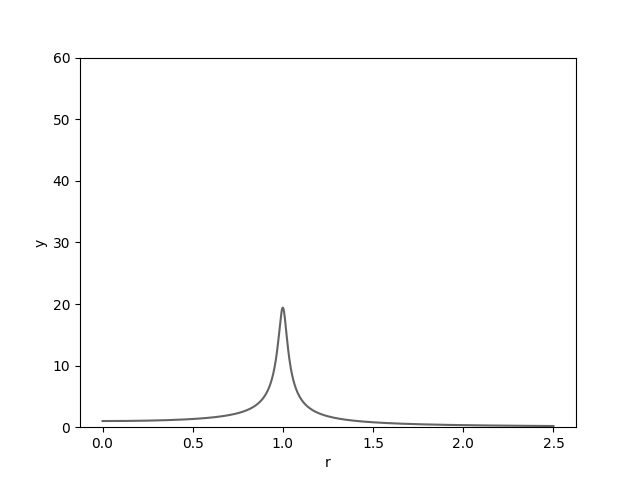

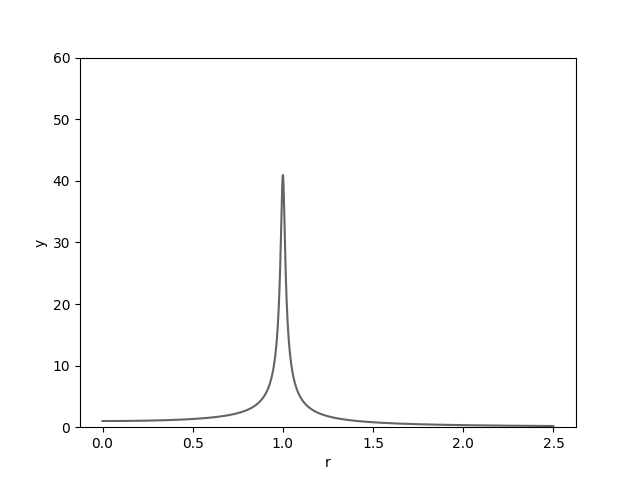

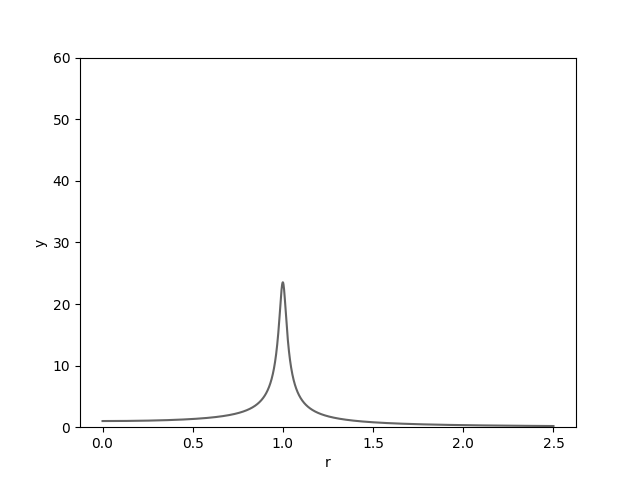

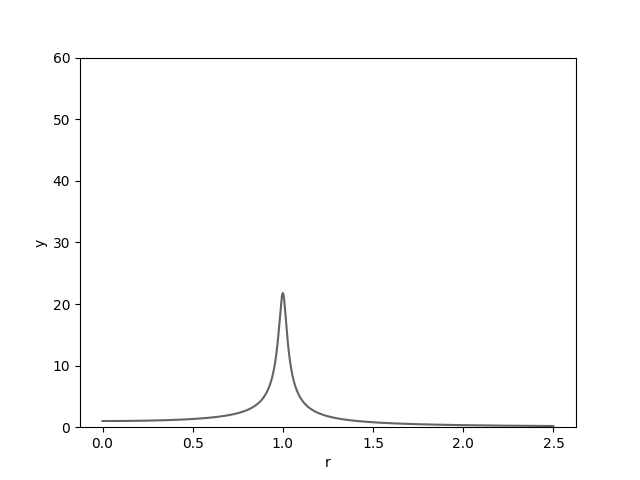

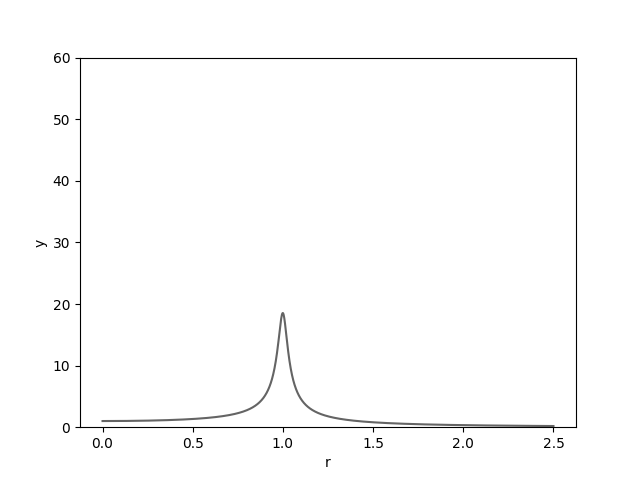

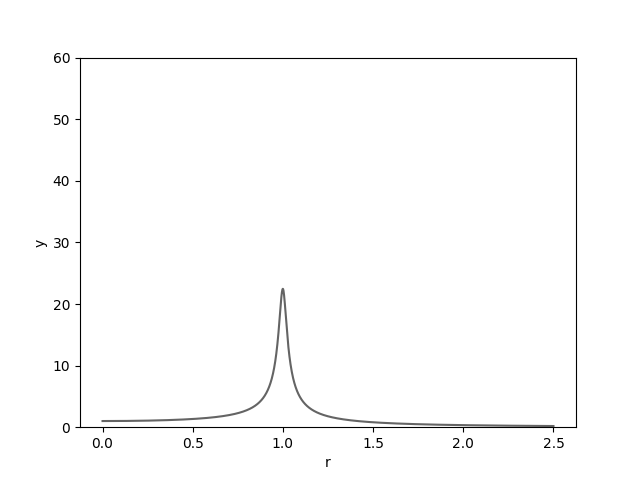

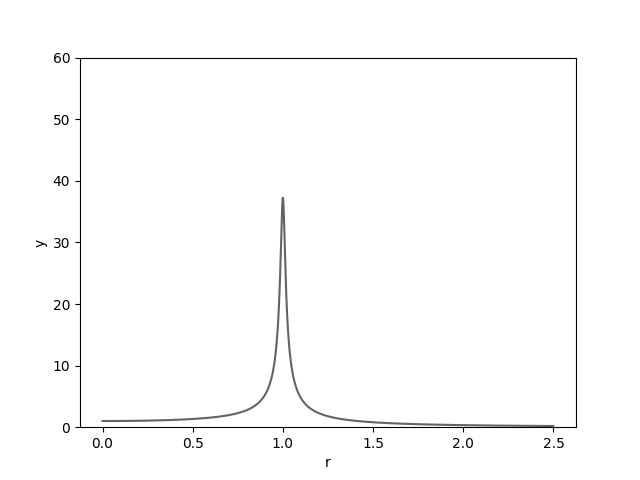

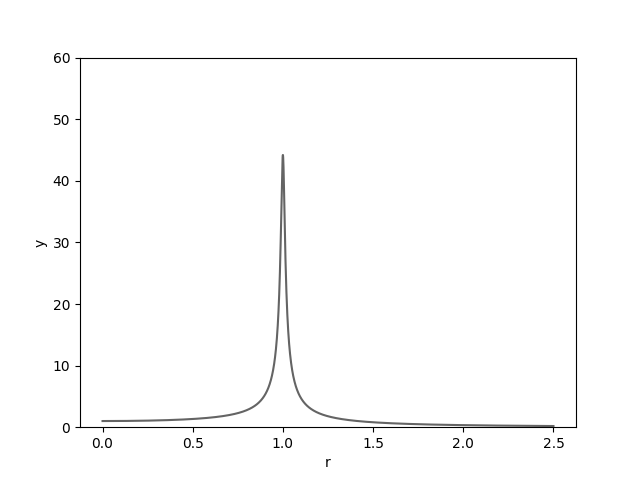

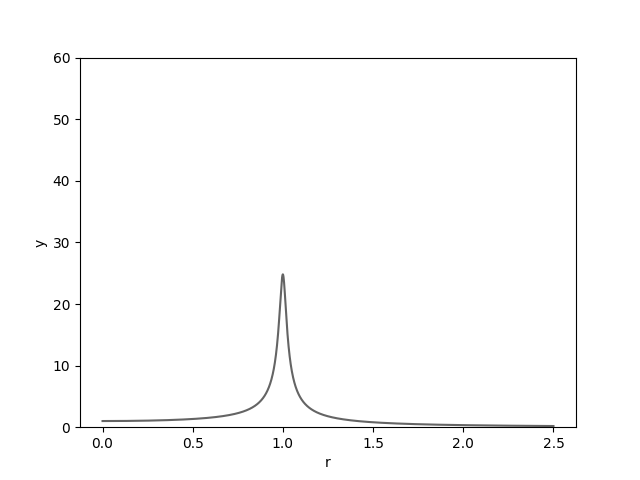

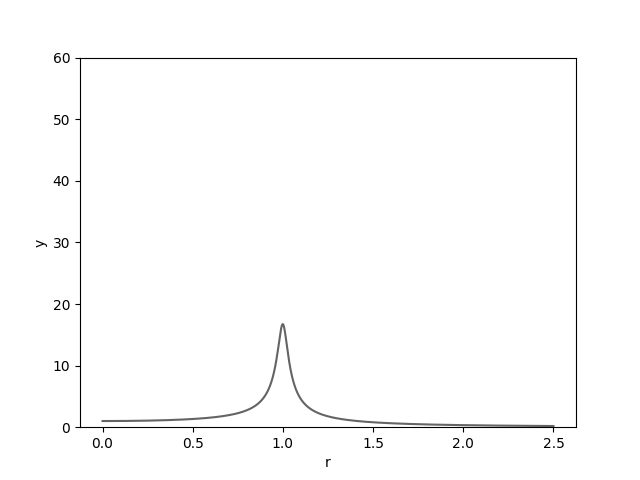

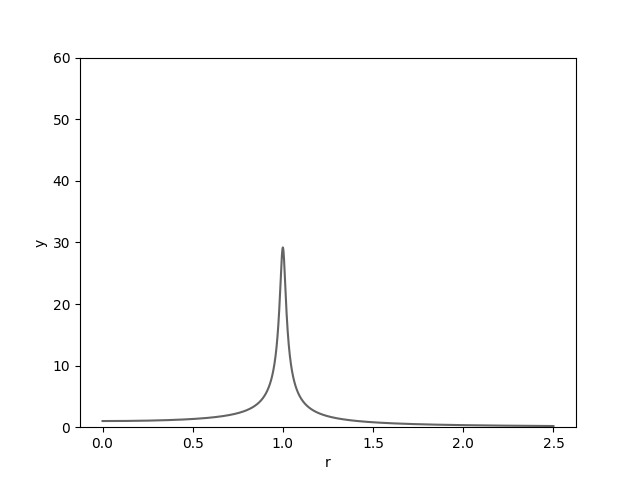

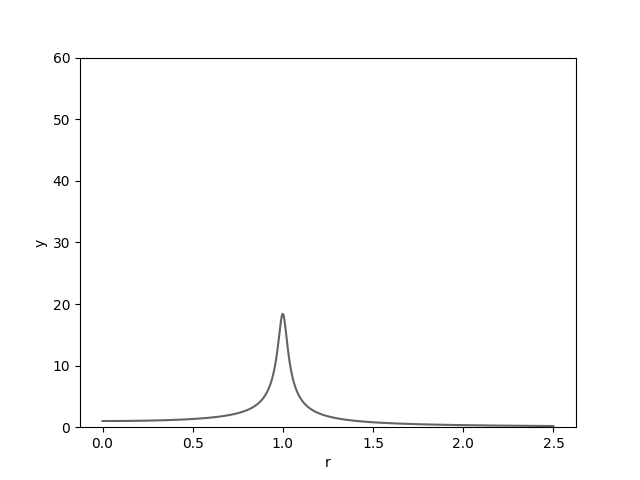

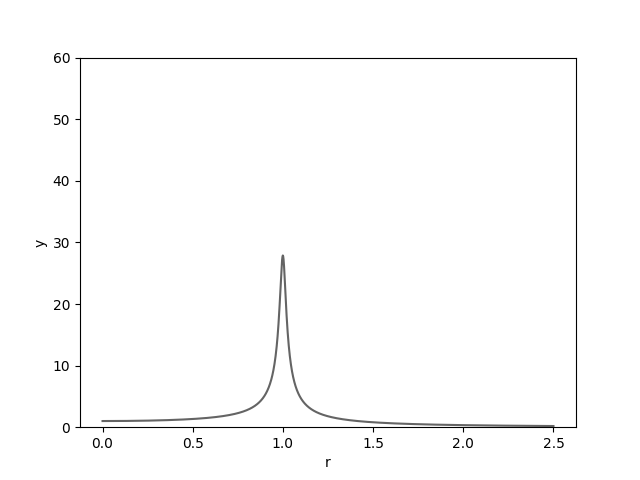

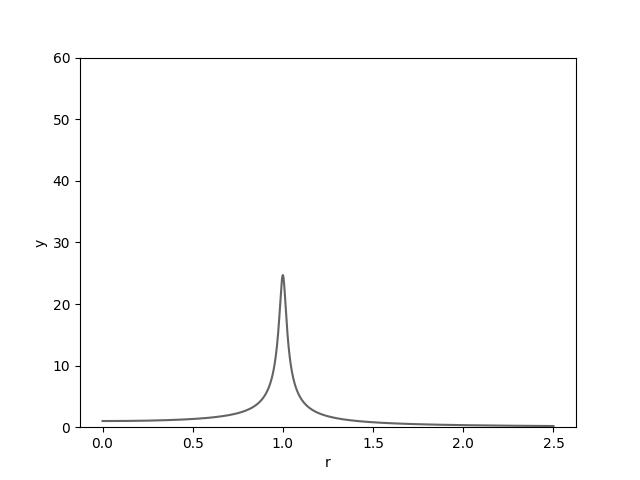

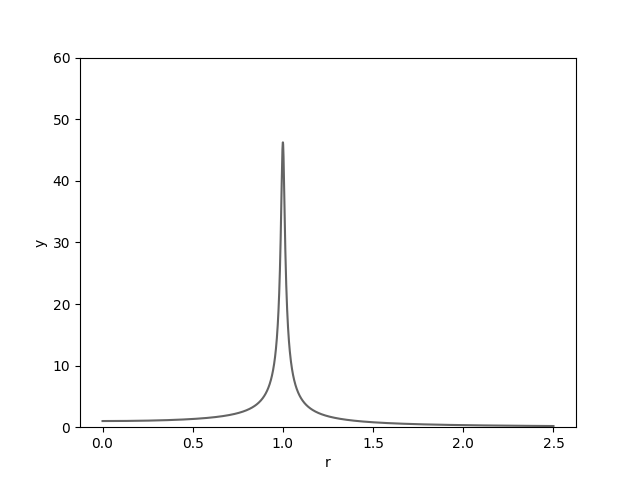

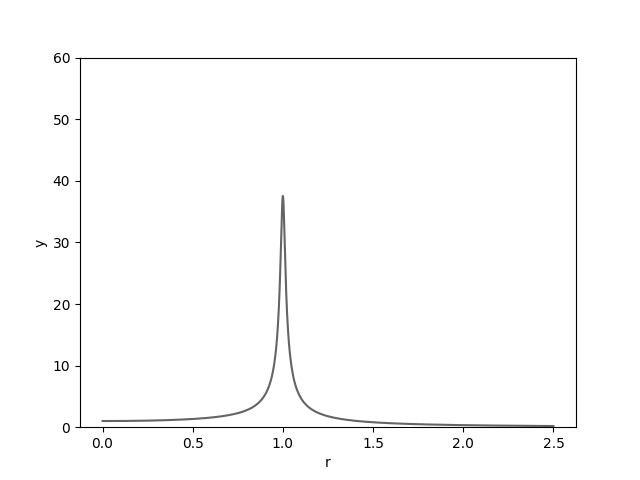

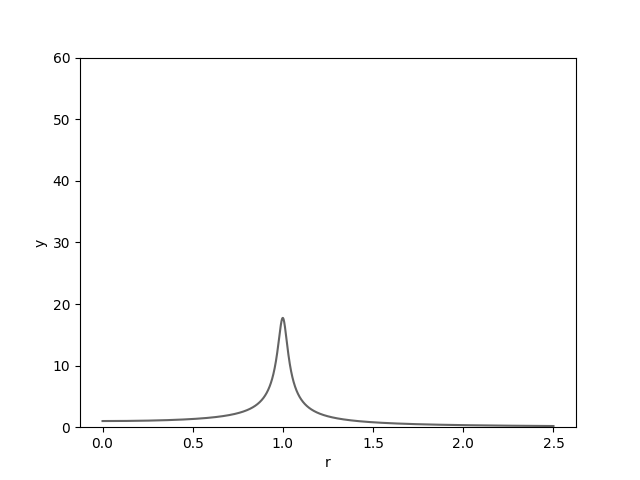

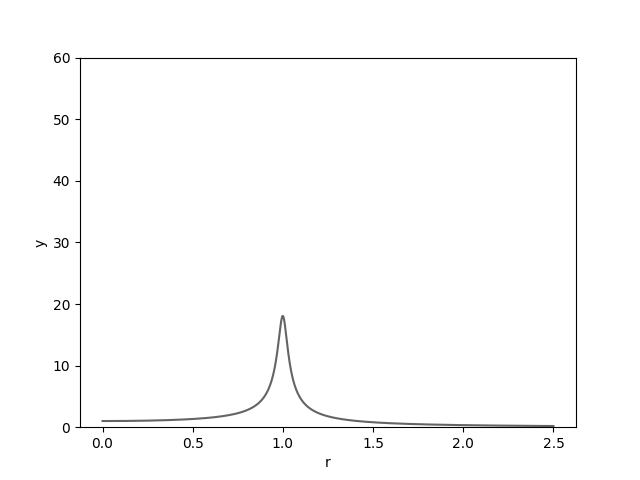

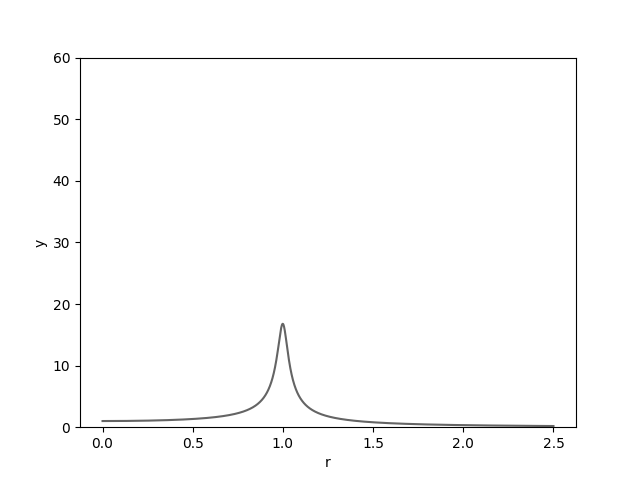

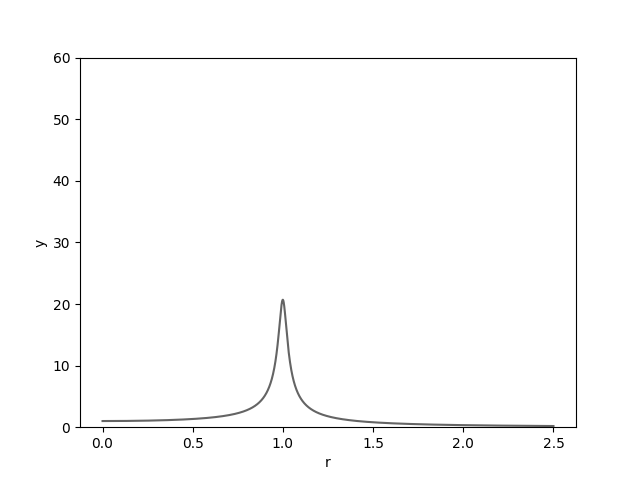

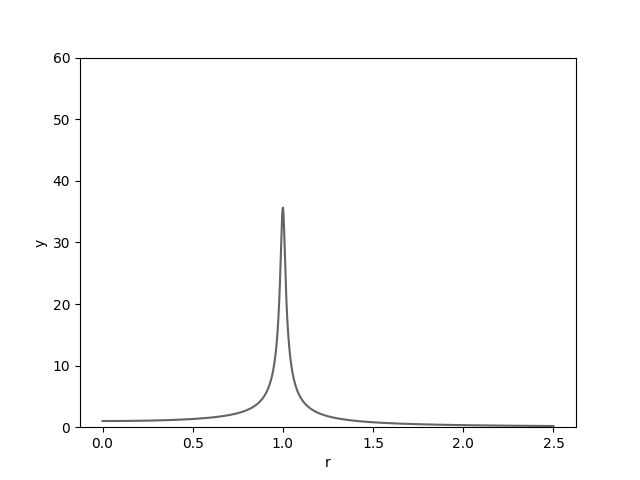

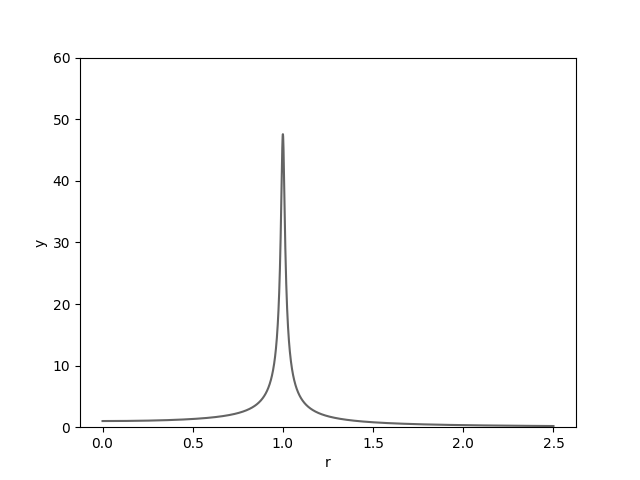

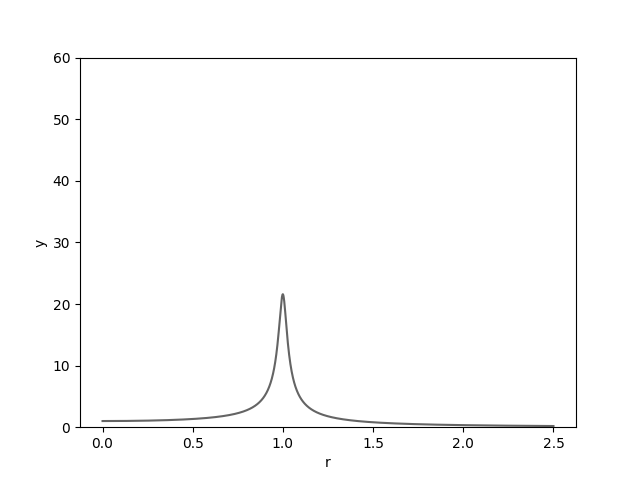

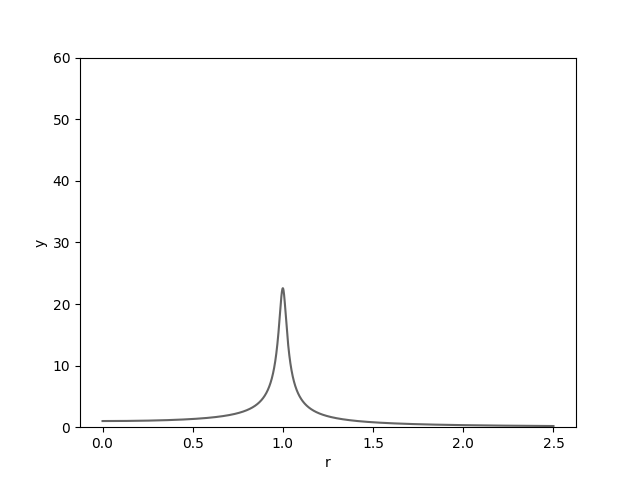

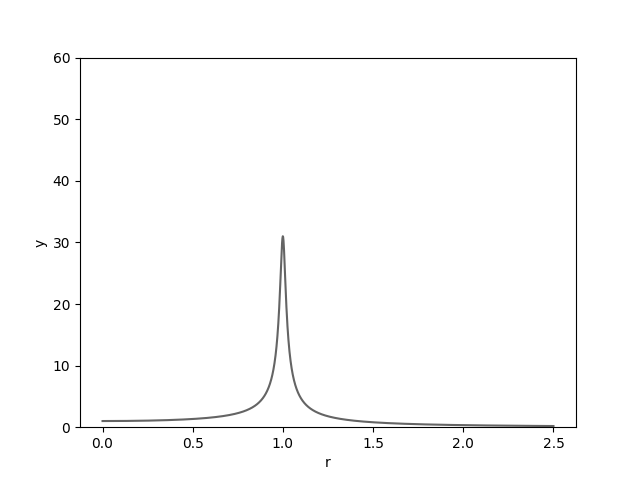

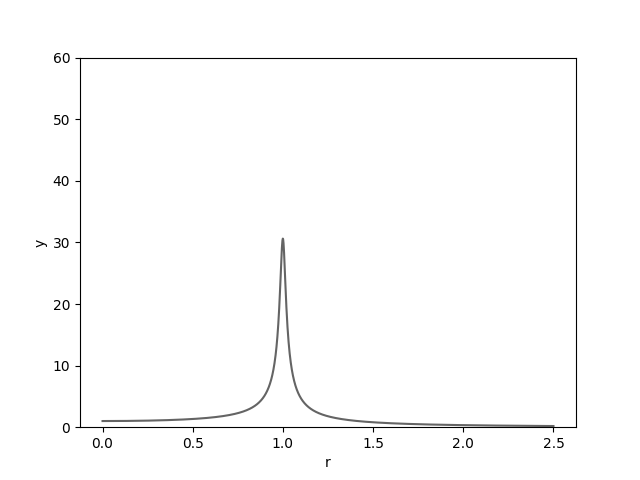

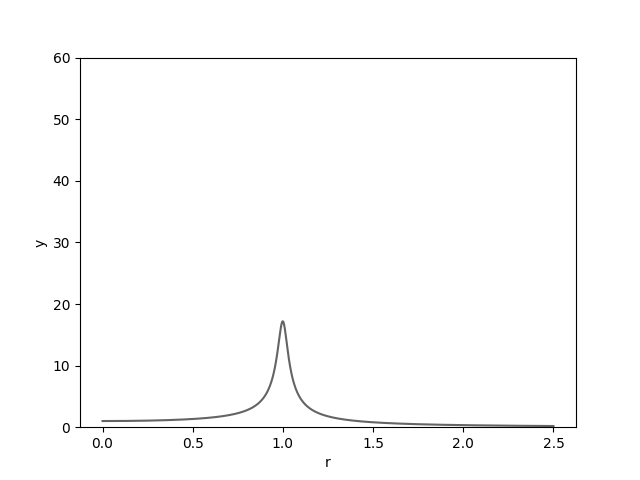

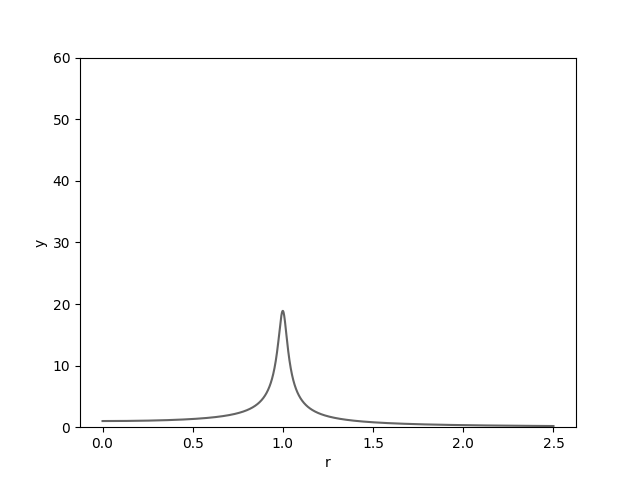

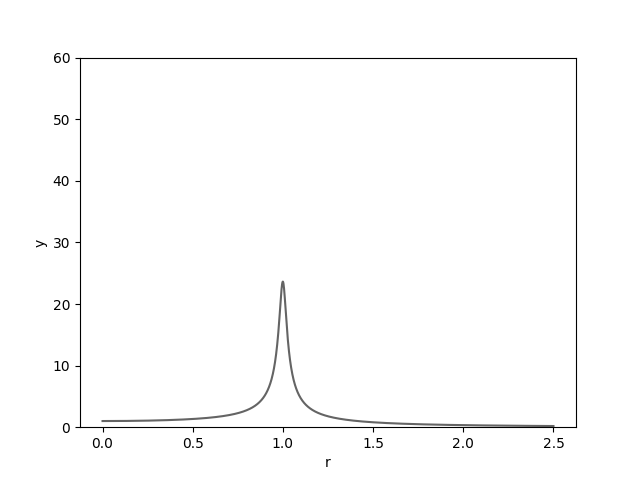

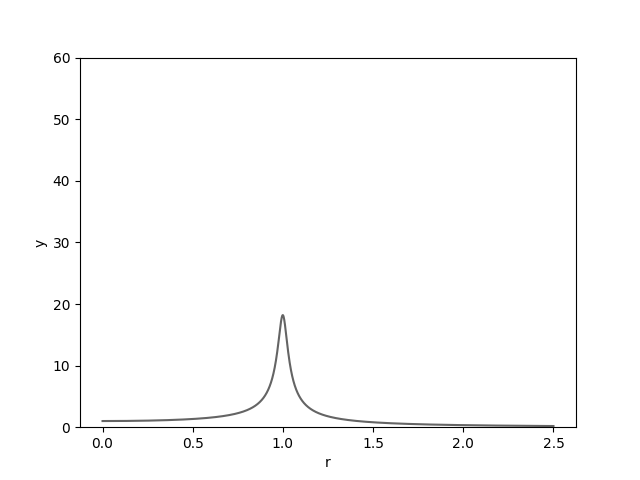

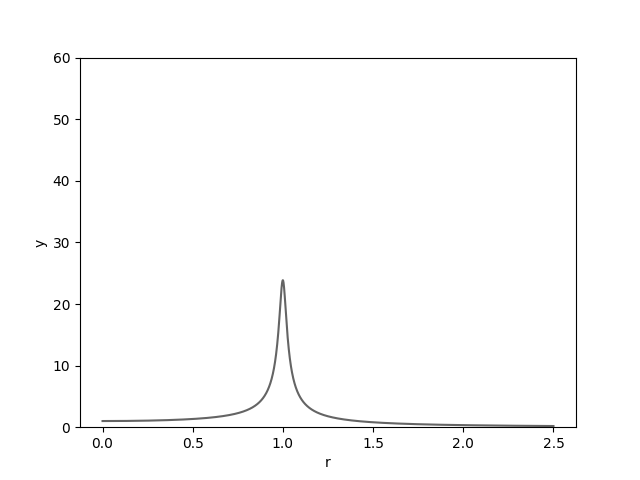

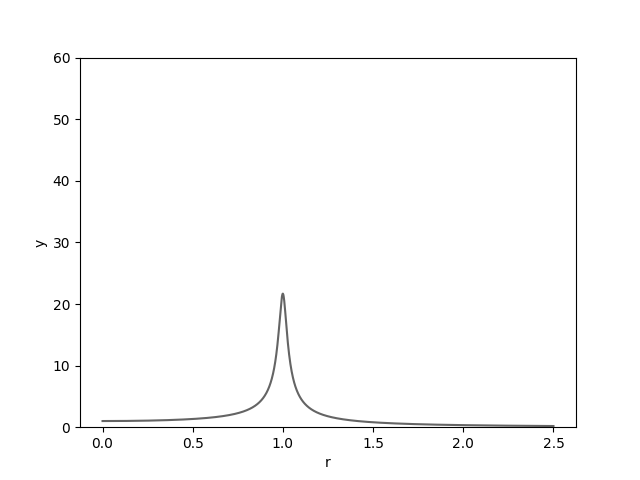

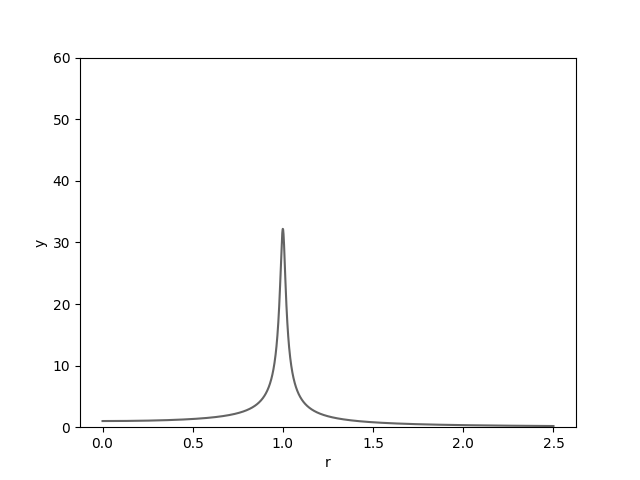

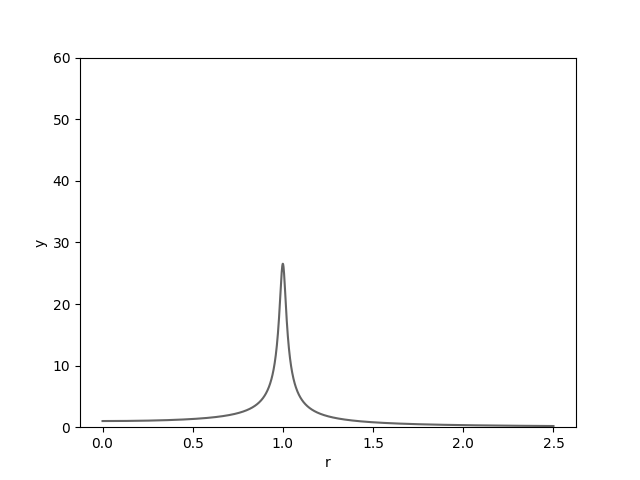

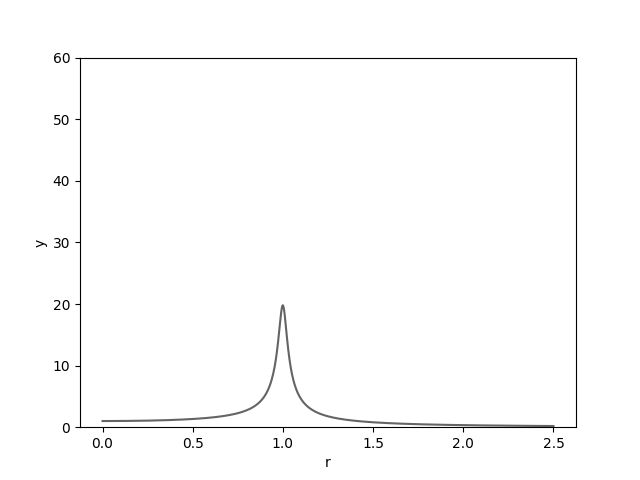

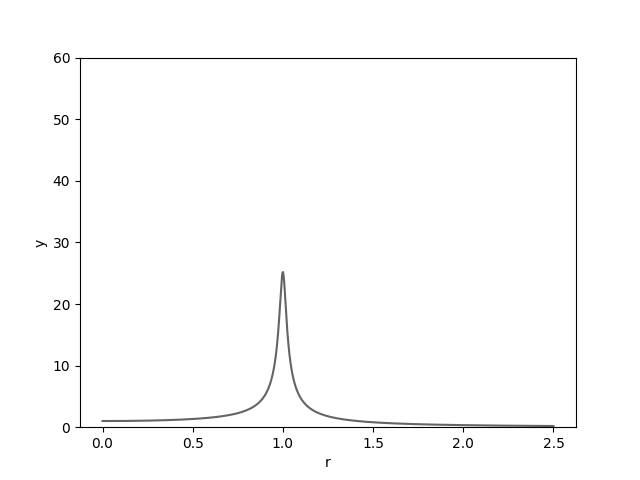

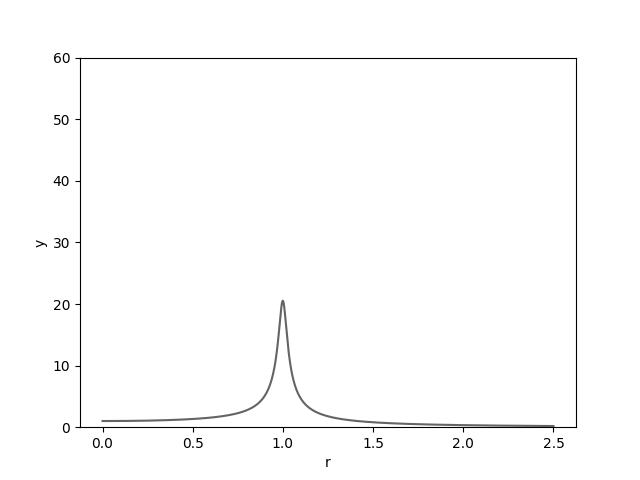

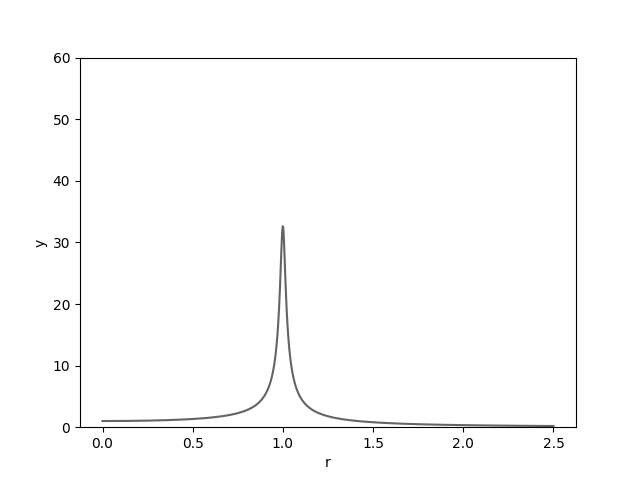

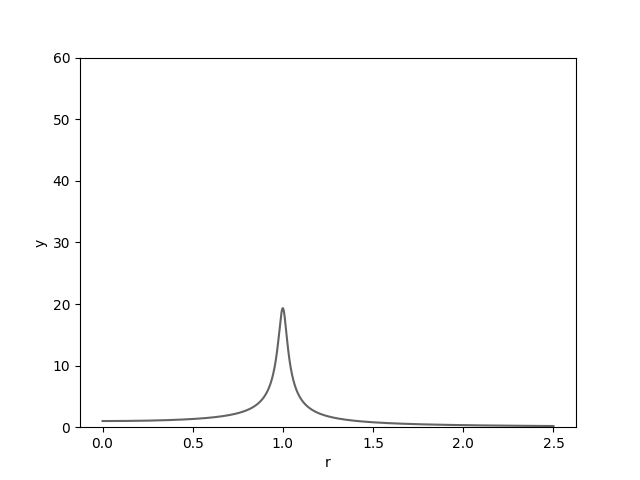

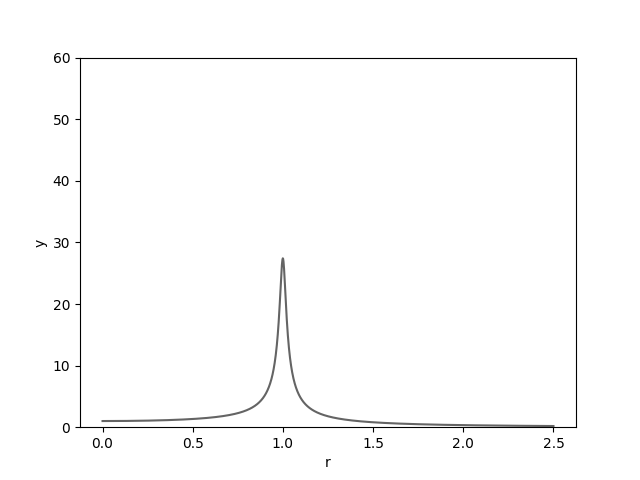

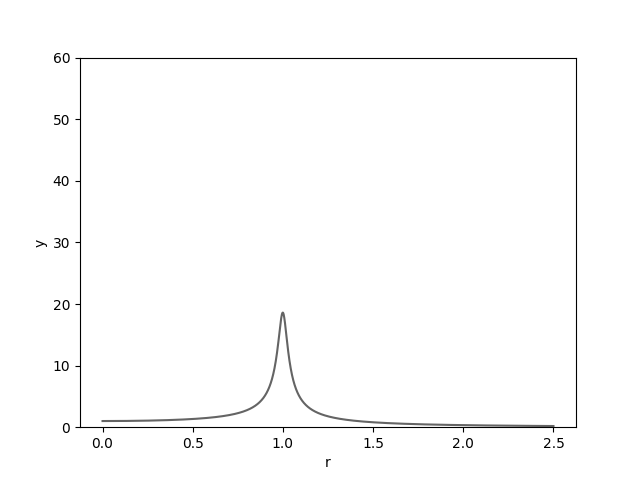

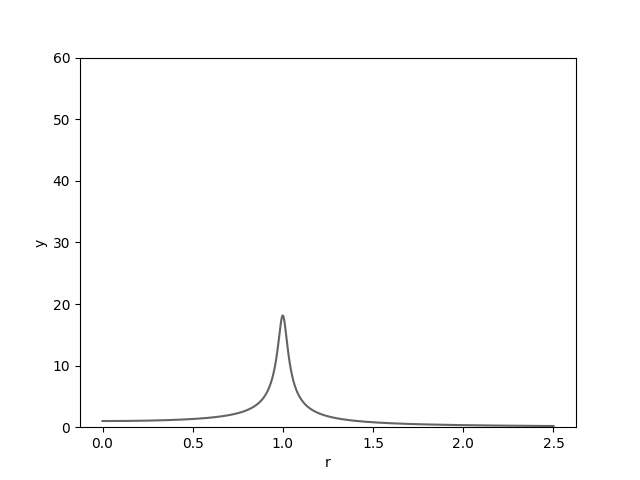

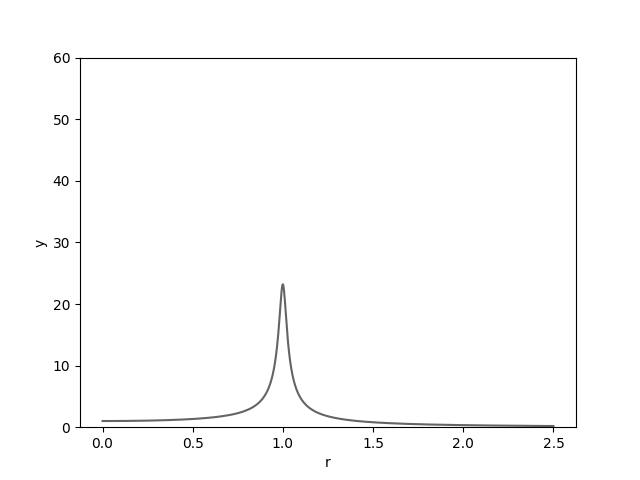

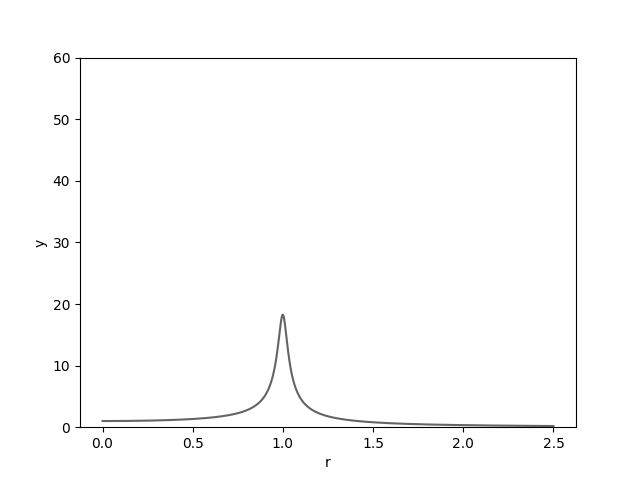

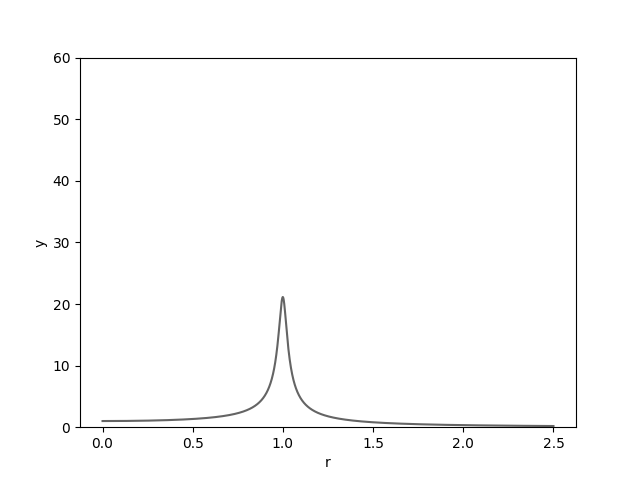

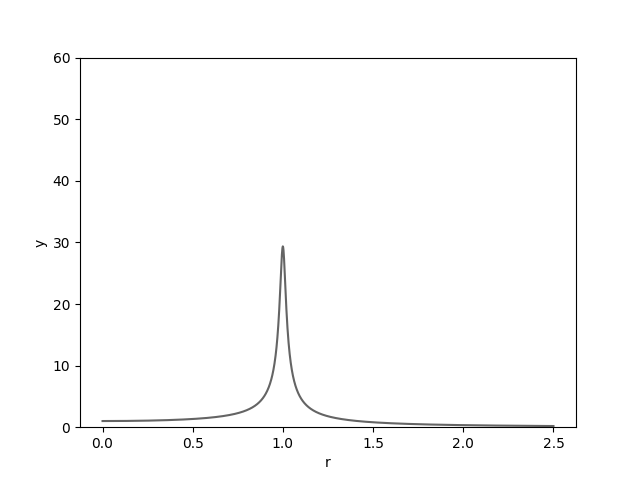

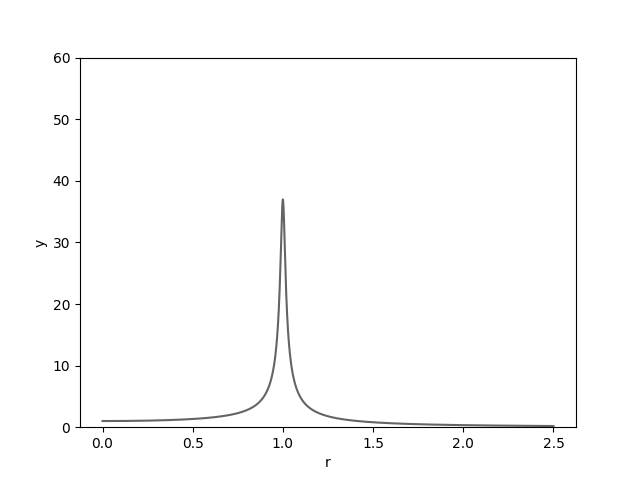

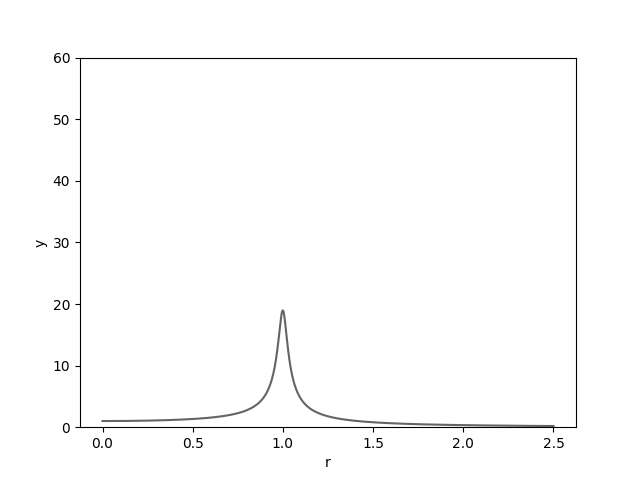

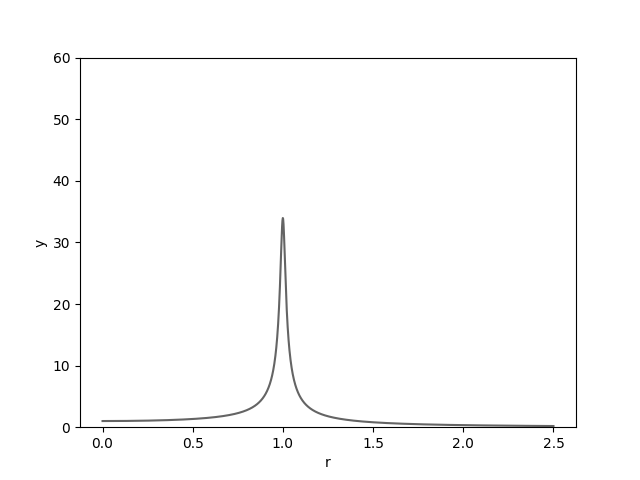

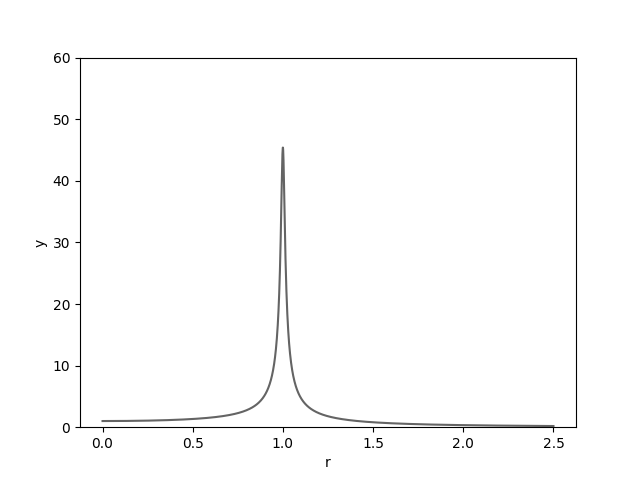

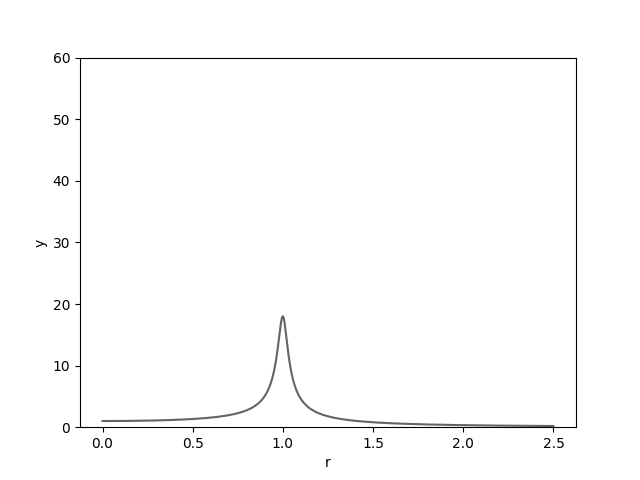

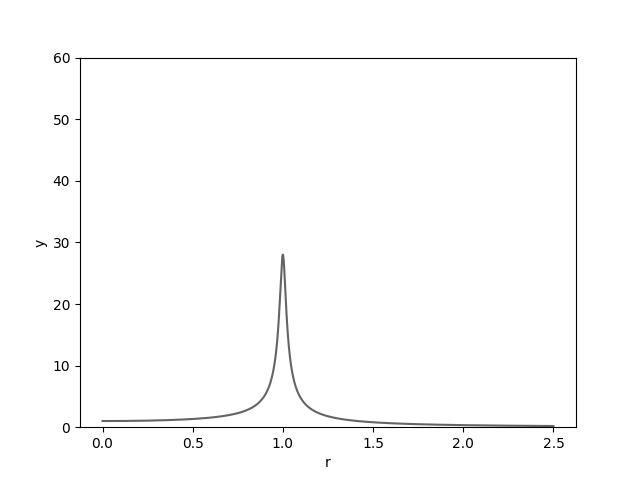

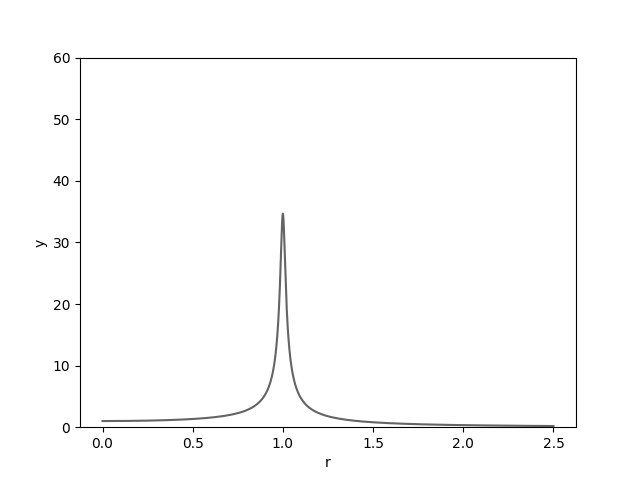

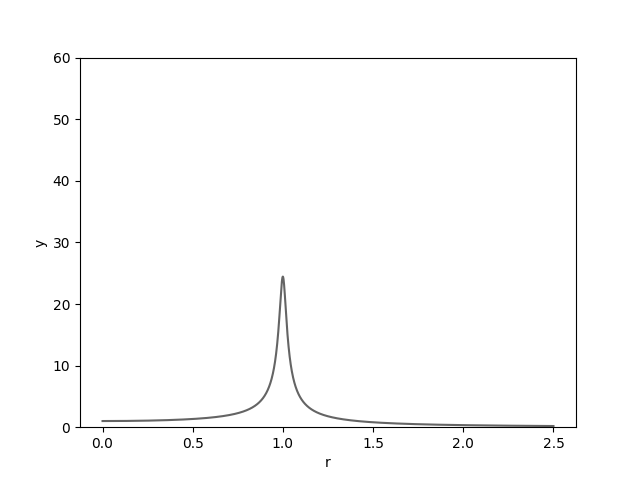

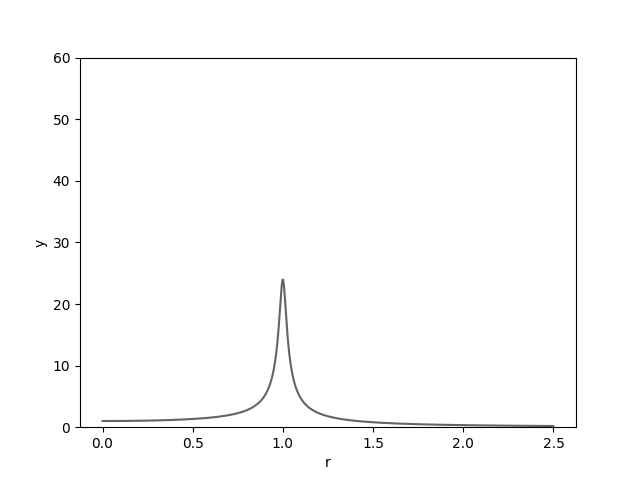

In [ ]:
graph_dir = "my_grayscale_graphs"
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

existing_graphs="my_graphs"
labels = ["zeta = {:.4f}".format(z) for z in zeta]
files = os.listdir(existing_graphs)

for file in files:
    file_path = os.path.join(existing_graphs, file)
    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_image)
    grayscale_image_path = os.path.join(graph_dir, "grayscale_" + file)
    cv2.imwrite(grayscale_image_path, gray_image)



In [ ]:
from PIL import Image

graph_dir = "my_resized_grayscale_graphs"
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

existing_graphs="my_grayscale_graphs"
files = os.listdir(existing_graphs)
for file in files:
    file_path = os.path.join(existing_graphs, file)
    image = Image.open(file_path)
    resized_image = image.resize((256, 256))
    image_path = os.path.join(graph_dir, "RESIZED_" + file)
    resized_image.save(image_path)


In [ ]:
#generating all image paths locations
import numpy as np
import pandas as pd

graph_dir = "my_resized_grayscale_graphs"
files = os.listdir(existing_graphs)
file_locations=[]
for filename in files:
    file_path = os.path.join(existing_graphs, filename)
    file_locations.append(file_path)

df=pd.DataFrame({'file_location':file_locations,'zeta':zeta})
print(df)


                                     file_location      zeta
0    my_grayscale_graphs/grayscale_zeta=0.0181.png  0.010000
1    my_grayscale_graphs/grayscale_zeta=0.0209.png  0.010101
2    my_grayscale_graphs/grayscale_zeta=0.0255.png  0.010201
3    my_grayscale_graphs/grayscale_zeta=0.0156.png  0.010302
4    my_grayscale_graphs/grayscale_zeta=0.0247.png  0.010402
..                                             ...       ...
195  my_grayscale_graphs/grayscale_zeta=0.0277.png  0.029598
196  my_grayscale_graphs/grayscale_zeta=0.0142.png  0.029698
197  my_grayscale_graphs/grayscale_zeta=0.0210.png  0.029799
198  my_grayscale_graphs/grayscale_zeta=0.0192.png  0.029899
199  my_grayscale_graphs/grayscale_zeta=0.0259.png  0.030000

[200 rows x 2 columns]


In [ ]:
import tensorflow as tf
import keras

In [ ]:
#doing using built_in code
#this is not required as of now


train_generator=tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

train_images=train_generator.flow_from_dataframe(
    dataframe=df,
    x_col='file_location',
    y_col='zeta',
    target_size=(256,256),
    color_mode='grayscale',
    class_mode='raw',#used for regression
    batch_size=2,
    shuffle=True,
    seed=42,
    subset='training'

)
#this is not required as of now
val_images = train_generator.flow_from_dataframe(
    dataframe=df,
    x_col='file_location',
    y_col='zeta',
    target_size=(256,256),
    color_mode='grayscale',
    class_mode='raw',#used for regression
    batch_size=2,
    shuffle=True,
    seed=42,
    subset='validation'
)



Found 8 validated image filenames.


In [ ]:
img = cv2.imread("/content/my_resized_grayscale_graphs/RESIZED_grayscale_zeta=0.0100.png",0)
# type(img)
print(img/255)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


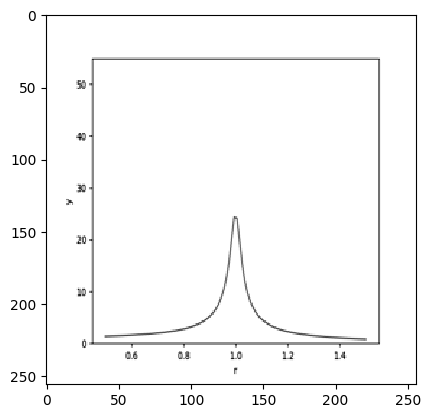

In [ ]:
plt.imshow(img, interpolation='nearest', cmap='gray')

In [ ]:
#building architecture copy paste https://www.kaggle.com/code/gcdatkin/age-prediction-from-images-cnn-regression?scriptVersionId=55328788&cellId=14
# import keras

# inputs=tf.keras.Input(shape=(256,256,3))
# x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
# # x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.MaxPool2D()(x)
# # flatten
# # x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
# # x = tf.keras.layers.MaxPool2D()(x)
# # x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dense(32, activation='relu')(x)
# outputs = tf.keras.layers.Dense(1, activation='linear')(x)

# model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))


In [ ]:
from keras.optimizers import SGD
model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='mse',
    metrics=['accuracy']
)



In [ ]:
#copy paste from https://machinelearningmastery.com/using-cnn-for-financial-time-series-prediction/
import os
import random


import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error

model = Sequential([
        Input(shape=(256, 256, 1)),
        Conv2D(8, kernel_size=(1, 82), activation="relu"),
        Conv2D(8, kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Conv2D(8, kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Flatten(),
        Dropout(0.1),
        Dense(1, activation="sigmoid")
    ])

from keras.optimizers import SGD
model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='mse',
    metrics=['accuracy']
)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

from keras.optimizers import SGD
model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='mse',
    metrics=['accuracy']
)

In [ ]:
import numpy as np
import os

# Get the list of image files
image_files = os.listdir('/content/my_resized_grayscale_graphs')
x_train = []

for image_file in image_files:
    image = cv2.imread(f'/content/my_resized_grayscale_graphs/{image_file}',0)
    image_array = np.array(image)
    x_train.append(image_array)

x_train = np.array(x_train)
x_train=x_train/255

print(x_train)
# print(zeta)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]


In [ ]:
history=model.fit(x_train,zeta,epochs=20,batch_size=50,verbose=1)
# print(zeta)

Epoch 1/20


ValueError: ignored

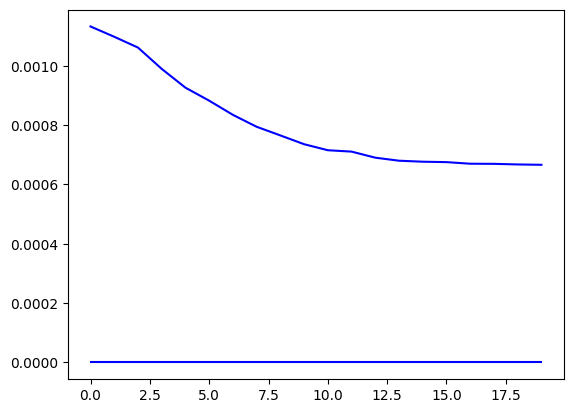

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
